<b><font size=4 color='green'>################################################################################################</b></font>

<b><font size=6 color='red'>BANK TRANSACTION ANALYSIS AND FRAUD DETECTION </b></font>

<b><font size=4 color='green'>################################################################################################</b></font>

<b><font size=6 color='green'>AIM :</b></font>

<b><font size=4 color='blue'> Our aim is to train machine learning model to predict the probability that an online transaction is fraudulent . </b></font>

**The data is broken into two files identity and transaction, which are joined by TransactionID.**


# Categorical Features - Transaction

**ProductCD**

**card1 - card6**

**addr1, addr2**

**P_emaildomain**

**R_emaildomain**

**M1 - M9**


TransactionDT: Timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: Transaction payment amount in USD

ProductCD: Product code, the product for each transaction

card1 - card6: Payment card information, such as card type, card category, issue bank, country, etc.

addr: Address

dist: Distance

P_ and R_emaildomain: Purchaser and recipient email domain

C1-C14: Counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: Timedelta, such as days between previous transaction, etc.

M1-M9: mMatch, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.





<b><font size=6 color='green'>AGENDA :</b></font>



# 1. Importing Necessary Libraries

# 2. Data Loading, Understanding, and Cleaning

# 3. Data Preprocessing

# 4. ML Modeling

# 5. Prediction 


<b><font size=6 color='red'>Importing Necessary Libraries:</b></font>


In [8]:
# Data Analysis

import pandas as pd
import numpy as np





In [9]:
# Data Visualization

from matplotlib import pyplot as plt
import seaborn as sns




In [7]:
pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Machine Learning


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report




In [11]:
# Warnings

import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

#suppressing all warning messages and
#importing a specific warning class, ConvergenceWarning, from the sklearn library




<b><font size=6 color='red'>Data Loading, Understanding, and Cleaning :</b></font>

**Since the data is big in size, we will use function to reduce its memory for fast processing and consuming less storage.**




In [12]:
# Adjustments have been made for the columns and columns to be displayed.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [14]:
%%time
# loading train_transaction data

train_transaction = pd.read_csv(r'C:\Users\Admin\Documents\IACSD DBDA PROJECT\Bank Fraud Analysis project\Fraud Detection Dataset\train_transaction.csv')


Wall time: 1min 1s


<b><font size=6 color='red'>Exploratory Data Analysis(EDA):</b></font>

A method for **summarizing data, identifying patterns and relationships, and detecting outliers** is exploratory data analysis. This type of data analysis is most often used when the **data set is large or complex**, and it can help with data comprehension.


In [7]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(362), int64(18), object(14)
memory usage: 1.7+ GB


In [8]:
# describe() is used to view  details like percentile, mean, std etc. of a data frame or a series of numeric values.
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.00

In [53]:
train_transaction['TransactionAmt'].unique()

array([  68.5 ,   29.  ,   59.  , ...,  557.54, 1659.95,  400.78])

In [9]:

def check_df(dataframe, head=5):
# To Print DataFrame Shape
  print(train_transaction.shape)           # (590540, 394)

# To Print DataFrame DataTypes
  print(train_transaction.dtypes)

# To Print DataFrame Head
  print(train_transaction.head(head))

# To Print DataFrame Tail
  print(train_transaction.tail(head))

# To Print DataFrame isnull values and there sum 
  print(train_transaction.isnull().sum())

In [55]:
%%time
check_df(train_transaction)

(590540, 394)
TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                  int64
C2                  int64
C3                  int64
C4                  int64
C5                  int64
C6                  int64
C7                  int64
C8                  int64
C9                  int64
C10                 int64
C11                 int64
C12                 int64
C13                 int64
C14                 int64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float6

**1. TransactionID  is in  int64 , So there is no need to further operations .**

**2. train_transaction.dtypes : object**

**3. There is no Null value in TransactionID and dtype: int64.**


<b><font size=6 color='green'>MEMORY OPTIMIZATION :</b></font>

**Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.**

In [7]:
# Reduce Size function

def reduce_mem_usage(df):
   
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
%%time

# Here we use Reduce size function to check weather our data set size is reduce or not 

train_transaction = reduce_mem_usage(train_transaction)
train_transaction.head()

Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%
Wall time: 4min 24s


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [12]:
# after size reduce 
train_transaction.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: category(14), float16(318), float32(44), int16(14), int32(2), int8(2)
memory usage: 486.6 MB



<b><font size=4 color='green'>After Use of Memory Optimization : </b></font>

**Original Memory Usage**

<b><font size=3 color='red'>dtypes: float64(362), int64(18), object(14)</b></font>

Memory usage of dataframe is **1775.15 MB**

**After Use of Reducer Function** 

<b><font size=3 color='red'>dtypes: category(14), float16(318), float32(44), int16(14), int32(2), int8(2)</b></font>

Memory usage after optimization is: **486.60 MB**

**Compress the Size by** 

Decreased by **72.6%**


<b><font size=5 color='blue'>Conversion of TransactionDT "sec" to Year , Month , Week , Day , Hour for Fraud :</b></font>

<AxesSubplot:xlabel='New_Date_YearMonth'>

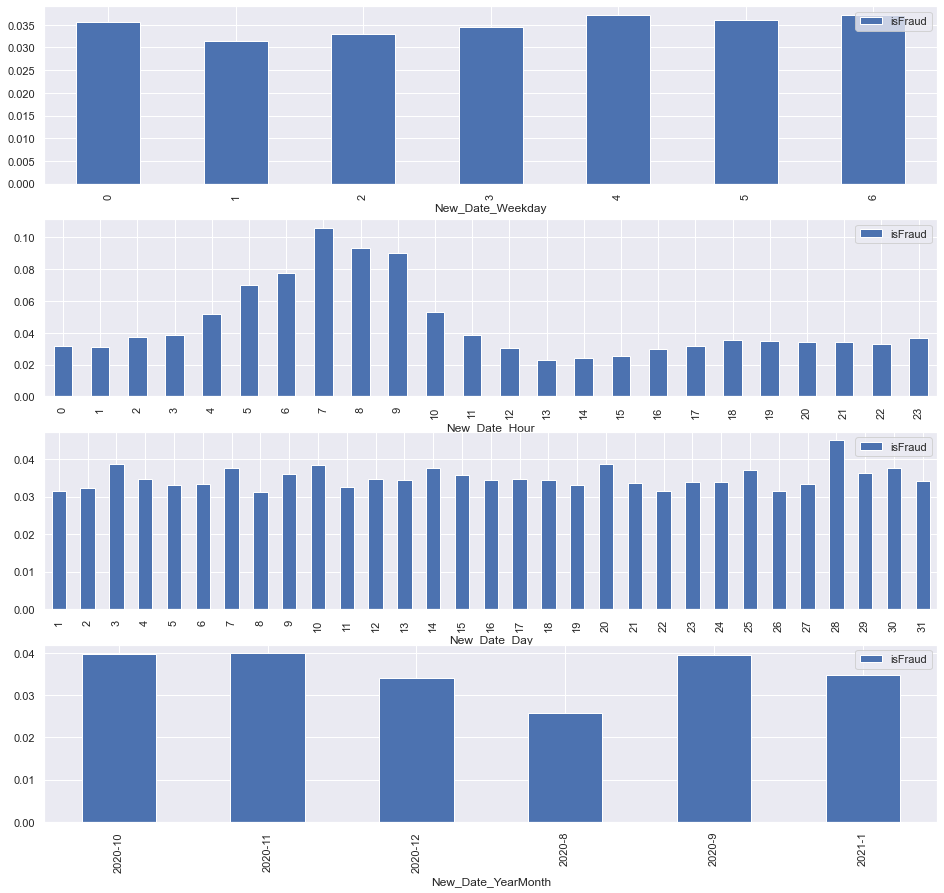

In [171]:
# pip insatll datetime 

import datetime

# Conversion of TransactionDT "sec" to Year , Month , Week , Day , Hour : 

train_transaction_DT = train_transaction


# Any Random Date we had take to explore the graph :




START_DATE = '2020-07-31'

datetime  # imported 

startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")


# use lambda for using countdoun after selected satrt date to datetime 
train_transaction_DT['New_Date'] = train_transaction_DT['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))


# For Year Month and Day(YMD) converting transactionDT " sec "   

train_transaction_DT['New_Date_YMD'] = train_transaction_DT['New_Date'].dt.year.astype(str) + '-' + train_transaction_DT['New_Date'].dt.month.astype(str) + '-' + train_transaction_DT['New_Date'].dt.day.astype(str)


# For Hour 
train_transaction_DT['New_Date_Hour'] =train_transaction_DT['New_Date'].dt.hour

# For Day
train_transaction_DT['New_Date_Day'] = train_transaction_DT['New_Date'].dt.day

# For Week
train_transaction_DT['New_Date_Weekday'] = train_transaction_DT['New_Date'].dt.dayofweek

# For Month
train_transaction_DT['New_Date_YearMonth'] = train_transaction_DT['New_Date'].dt.year.astype(str) + '-' + train_transaction_DT['New_Date'].dt.month.astype(str)


# 4 sub plots 
fig,ax = plt.subplots(4, 1, figsize=(16,15))

# use group_by for joining faurd and date columns

train_transaction_DT.groupby('New_Date_Hour')['isFraud'].mean().to_frame().plot.bar(ax=ax[1])
train_transaction_DT.groupby('New_Date_Day')['isFraud'].mean().to_frame().plot.bar(ax=ax[2])
train_transaction_DT.groupby('New_Date_Weekday')['isFraud'].mean().to_frame().plot.bar(ax=ax[0])
train_transaction_DT.groupby('New_Date_YearMonth')['isFraud'].mean().to_frame().plot.bar(ax=ax[3])




<b><font size=6 color='blue'>TransactionAmt:</b></font>

In [175]:
# to check train_fraud 
train_fraud = train_transaction.loc[train_transaction['isFraud'] == 1]
# to check train not_fraud 
train_non_fraud = train_transaction.loc[train_transaction['isFraud'] == 0]

train_transaction['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

In [176]:
# to check an comparision of transaction amount based on fraude 
# use concat to join all of them to compare 
# give quantile percentages range from 1% to 99% 

print(pd.concat([train_transaction['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index(),
                 train_fraud['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index(), 
                 train_non_fraud['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index()],
                   axis=1, keys=['Total','Fraud', "No Fraud"]))

  Total                Fraud                No Fraud               
  index TransactionAmt index TransactionAmt    index TransactionAmt
0  0.01       9.242188  0.01       6.739453     0.01       9.511875
1  0.10      25.953125  0.10      18.937500     0.10      26.312500
2  0.25      43.312500  0.25      35.031250     0.25      43.968750
3  0.50      68.750000  0.50      75.000000     0.50      68.500000
4  0.75     125.000000  0.75     161.000000     0.75     120.000000
5  0.90     275.250000  0.90     335.000000     0.90     267.100000
6  0.99    1104.000000  0.99     994.000000     0.99    1104.000000


# Above Analysis 

**TransactionAmt : The ammount of transaction.**
    
I apply log transform in order to better show the distribution of data.

Otherwise very large transactions skew the distribution.

And also , the lowest and highest transaction amounts seem to be more likely to be fraudulent transactions.


<b><font size=6 color='blue'>dist1 amd dist2:</b></font>

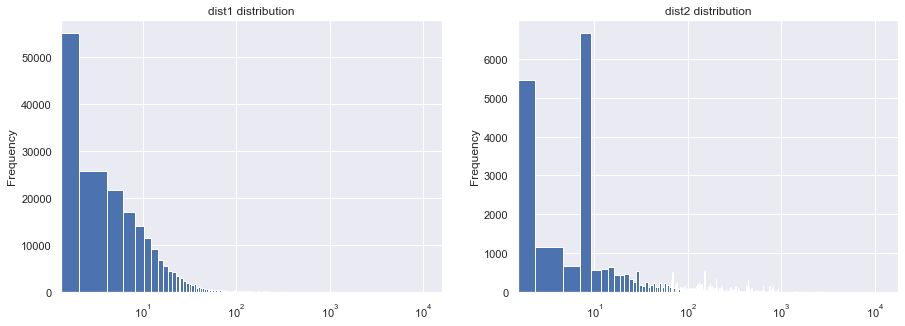

In [180]:
# Histogram for dist1 and dist2 distribution to compare 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
train_transaction['dist1'].plot(kind='hist',bins=5000,ax=ax1,title='dist1 distribution',logx=True)
train_transaction['dist2'].plot(kind='hist',bins=5000,ax=ax2,title='dist2 distribution',logx=True)
plt.show()

**This could be the distance of the transaction vs. the card owner's home/work address.**

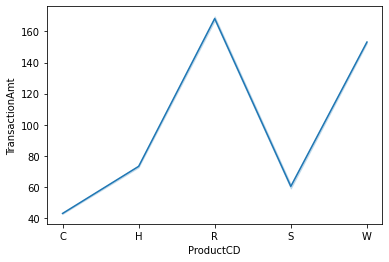

In [58]:
# lineplot between ProductCD and TransactionAmt
sns.lineplot(x="ProductCD", y="TransactionAmt", data=train_transaction)
plt.show()

**R ProductCD Percentage is Highest amongst all .**

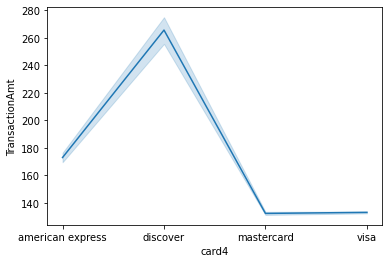

In [59]:
# lineplot between card4 and TransactionAmt
sns.lineplot(x="card4", y="TransactionAmt", data=train_transaction)
plt.show()

**Discover in Card4  Percentage is Highest amongst all for Transaction Amount .**

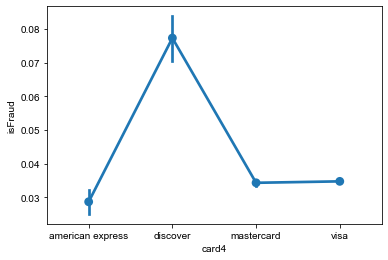

In [60]:
# lineplot between card4 and isFraud
sns.pointplot(x ='card4',
y = "isFraud",
data=train_transaction)
# show the plot
sns.set(rc = {'figure.figsize':(30,15)})
plt.show()

**Fraud is Lowest For American Express Card4 and Higest For Discover Card4 .**

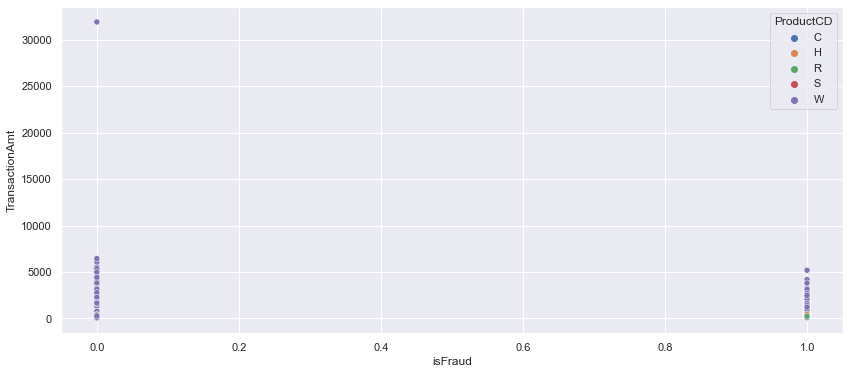

In [62]:
# Scatter Plot for fraud , Transaction amount and Product .
plt.figure(figsize=(14, 6))
sns.scatterplot(x='isFraud', y='TransactionAmt', hue='ProductCD', data=train_transaction);

**ProductCD W has the highest fraud on Transaction Amount.**

<b><font size=6 color='green'>Loading train_identity data :</b></font>

In [9]:
%%time

# Loading train_identity data
train_identity = pd.read_csv(r'C:\Users\KK\Desktop\PROJECT\IEEE-CIS Fraud Detection\train_identity.csv')
print(train_identity.shape)



(144233, 41)
Wall time: 1.34 s


In [10]:
%%time
# Use Reduce size function here also 
train_identity = reduce_mem_usage(train_identity)
train_identity.head()

Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.00 MB
Decreased by 77.8%
Wall time: 1.39 s


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS



<b><font size=6 color='green'>Merging transaction and identity train data:</b></font>

In [11]:
# Merge Operations 

train_df = pd.merge(train_transaction, train_identity, how='left')  

'''
Here we used LEFT JOIN, also called LEFT OUTER JOIN, returns all records from the left (first) table and the matched records from the right (second) table.
If there is no match for a specific record, you’ll get NULL in the corresponding columns of the right table.
'''   

print(train_df.shape)

# To get the length of Merge train dataframe 
len_train_df = len(train_df)  
print(len_train_df)

# The del keyword is used to delete objects
del train_transaction, train_identity
train_df.head()

(590540, 434)
590540


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0


<b><font size=6 color='green'>Separation of Catagorical Data and Numerical Data</b></font>

# Catagorial Data on train_df

In [14]:
# Separation of Catagorial Data

train_cat = pd.DataFrame()
index=0
for i in train_df.columns:
    
    if str(train_df[i].dtypes)=='category':
        train_cat.insert(index,i,train_df[i],True)
        index=index+1

In [15]:
# Catagorial Data

train_cat.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,New,NotFound,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


# Numerical Data of train_df

In [16]:
# Separation of Numerical Data

train_num = pd.DataFrame()
index=0
for i in train_df.columns:
    
    if str(train_df[i].dtypes)!='category':
        train_num.insert(index,i,train_df[i],True)
        index=index+1

In [17]:
# Numerical Data

train_num.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0

# Boxplot of variables from C1 to C14¶

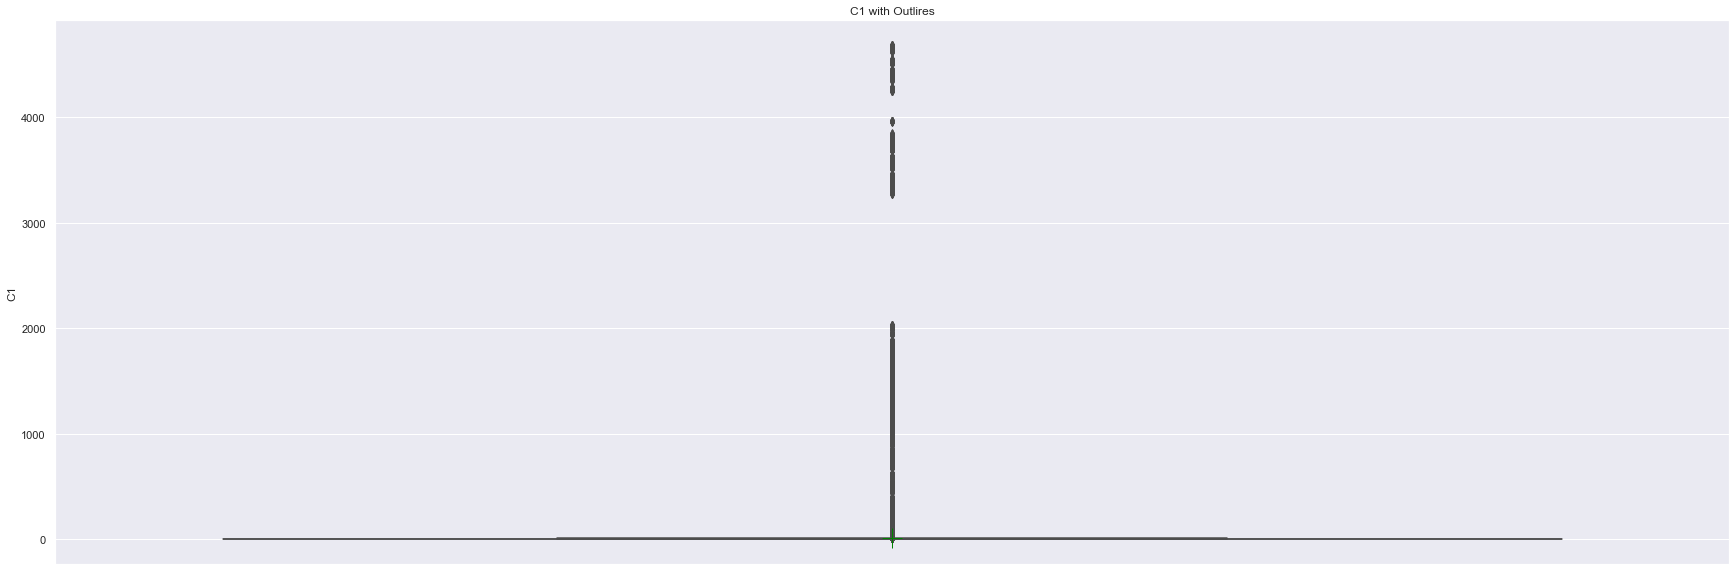

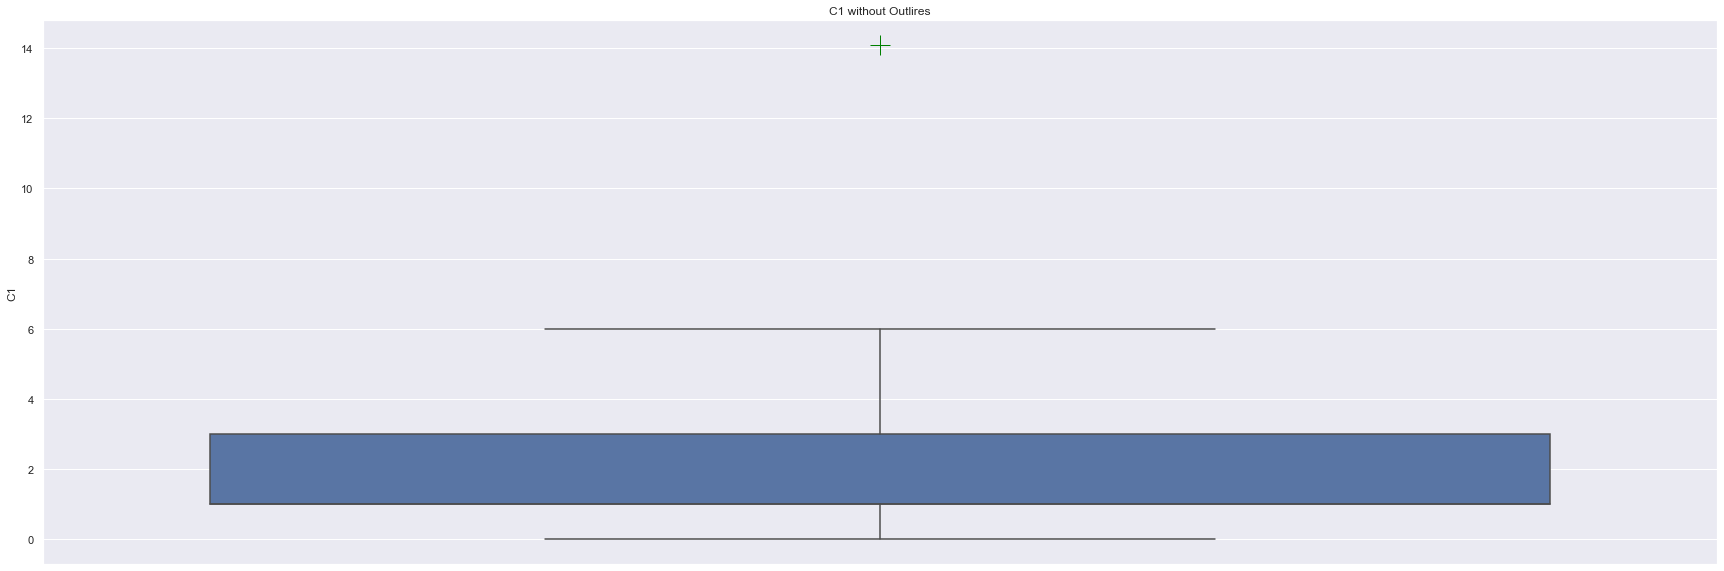

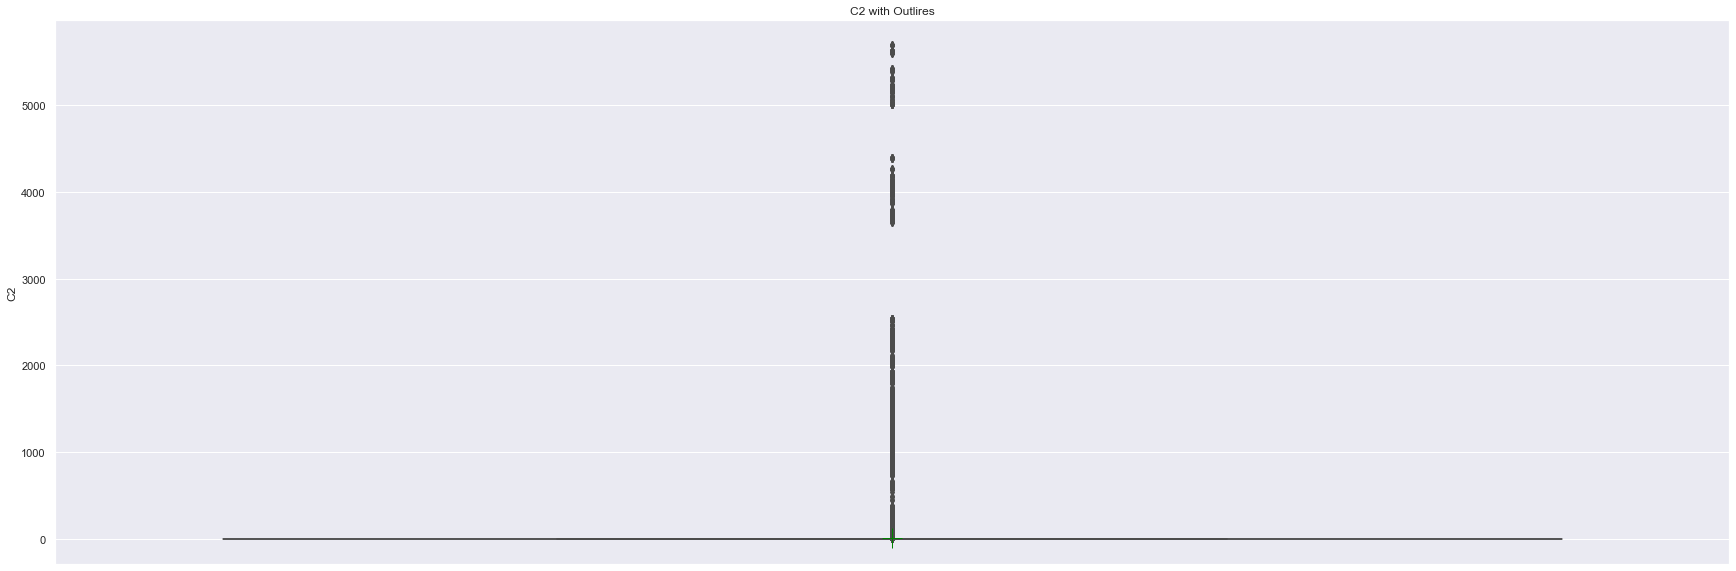

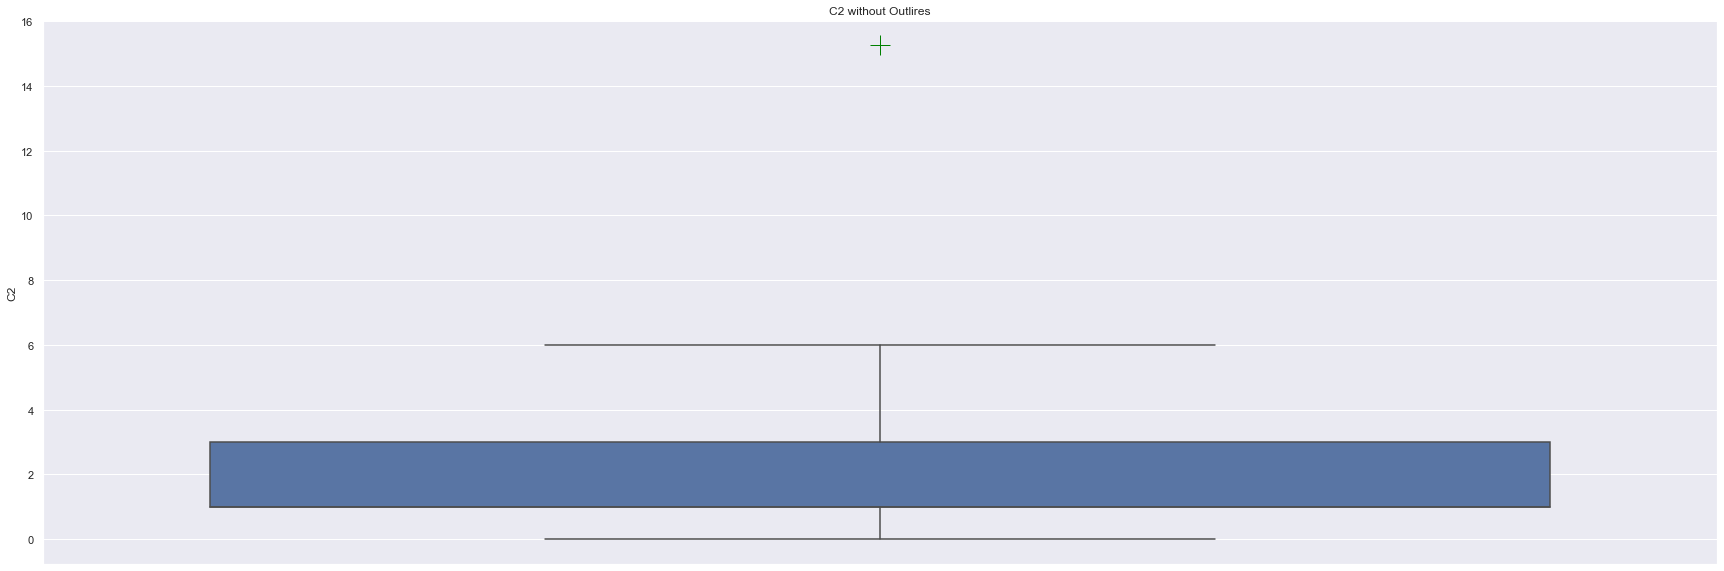

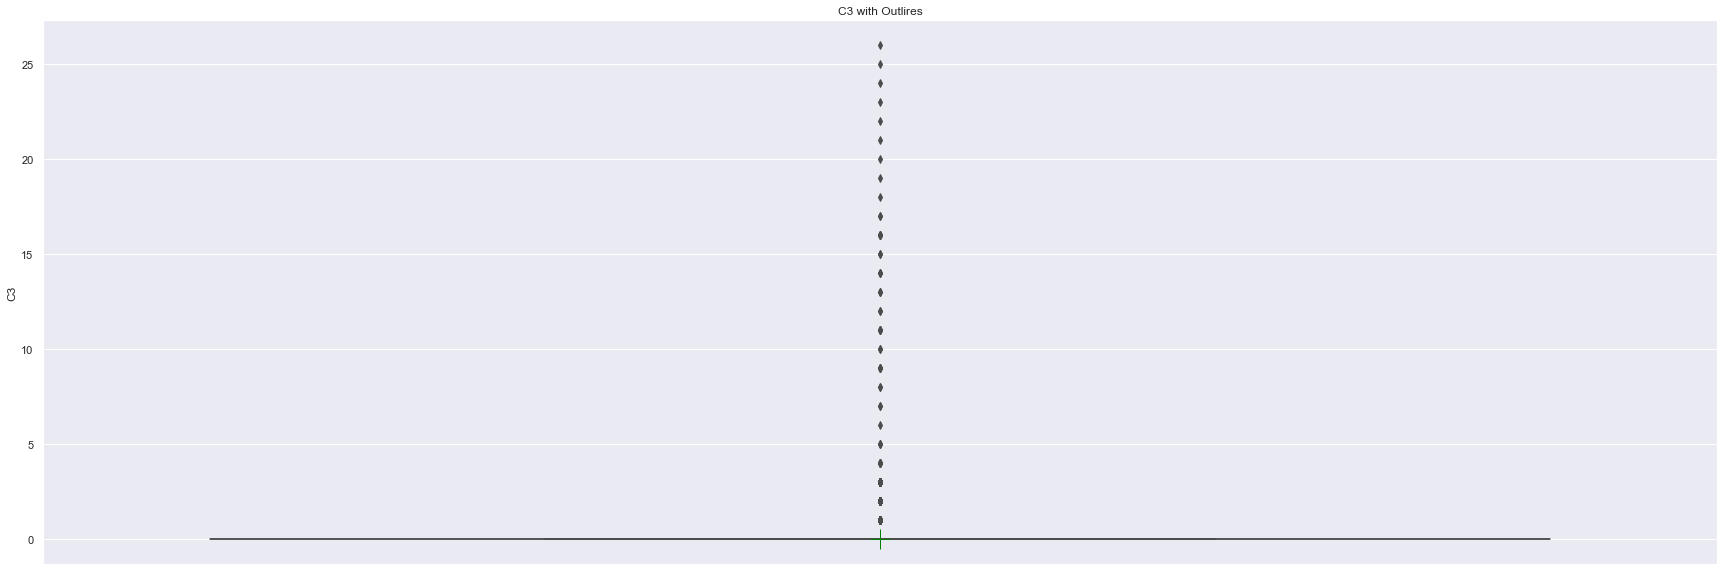

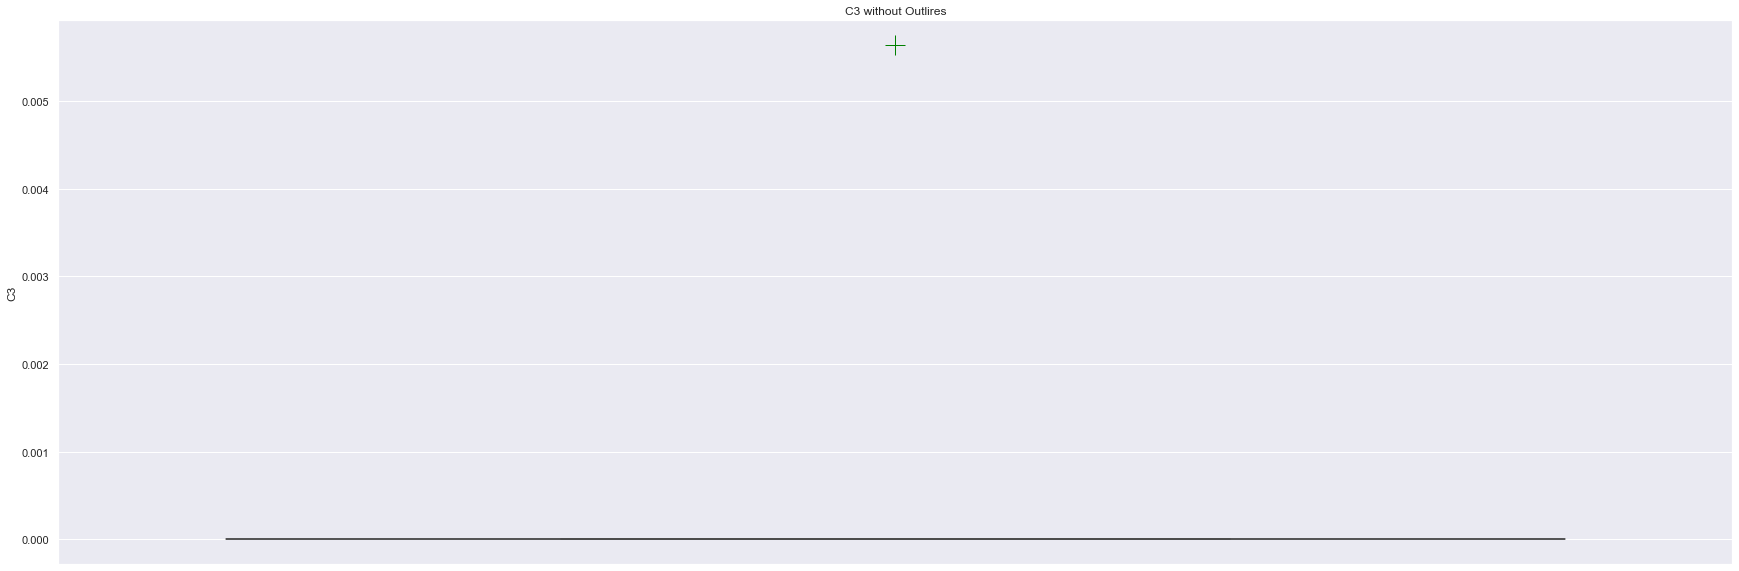

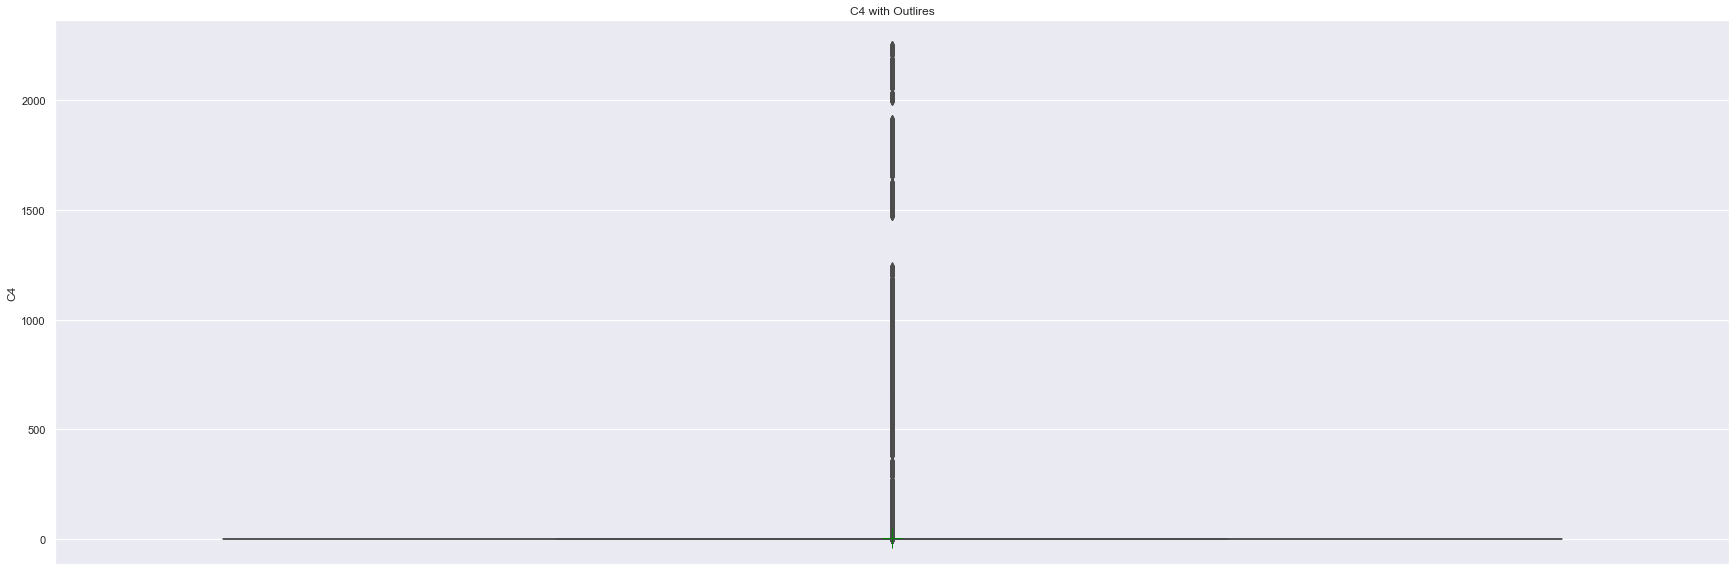

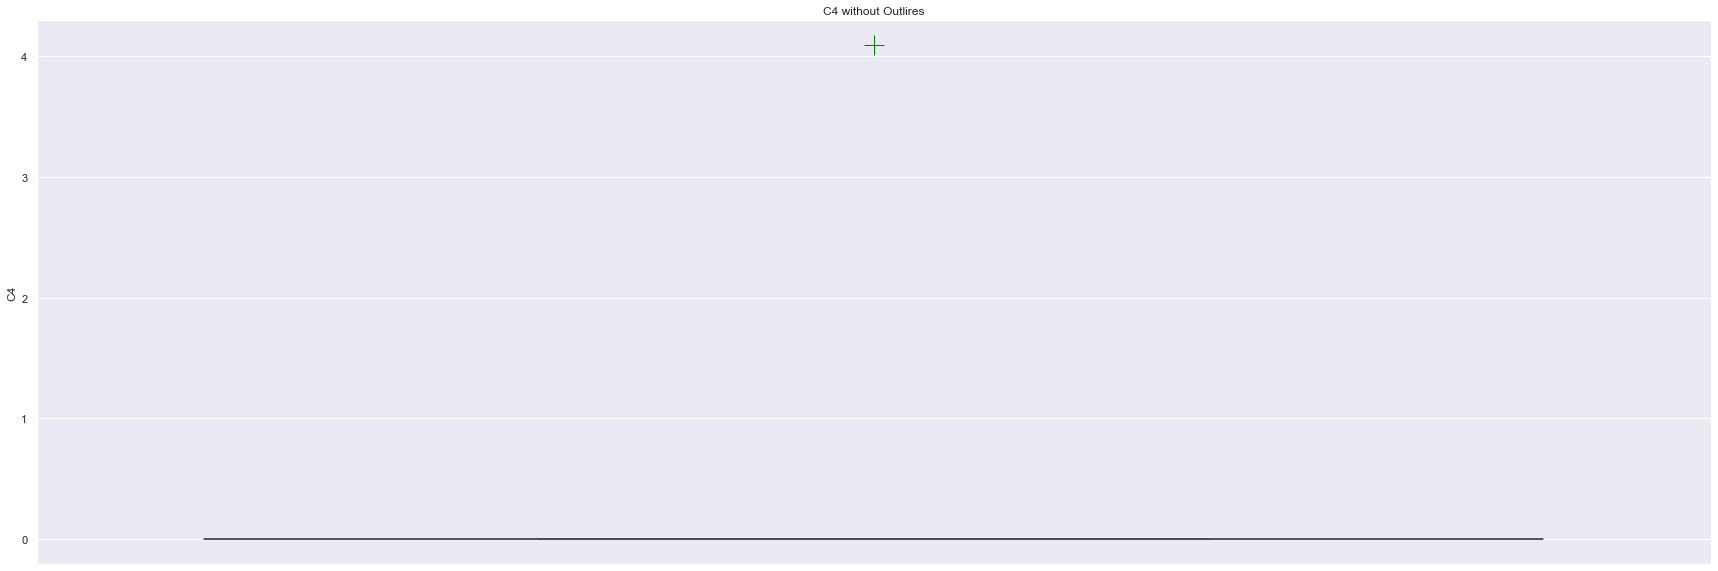

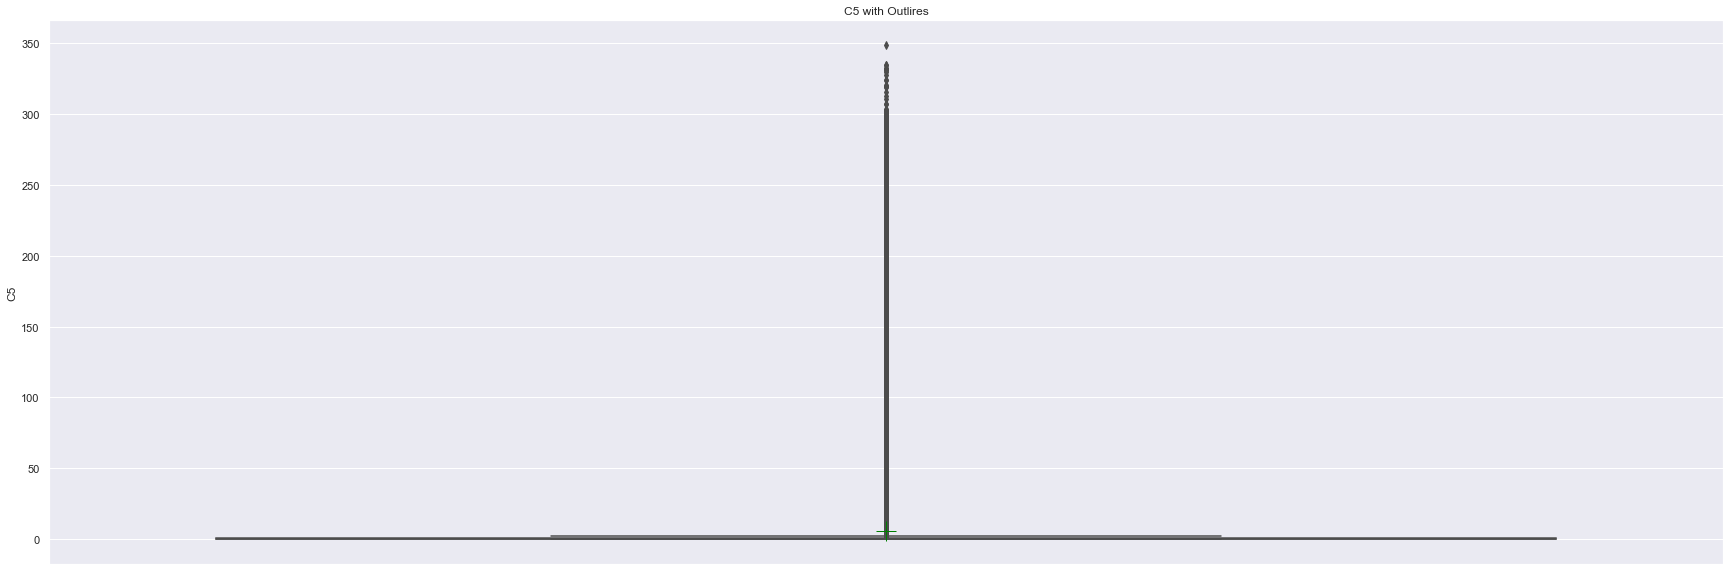

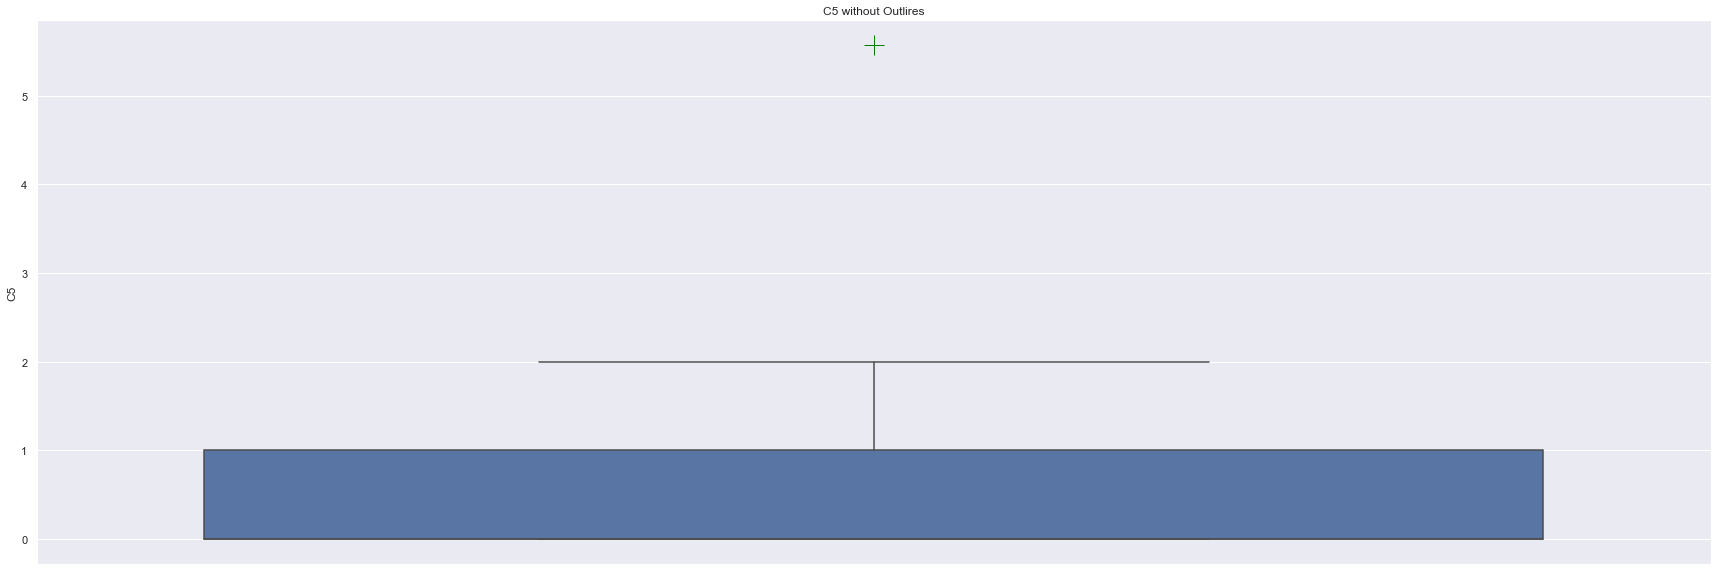

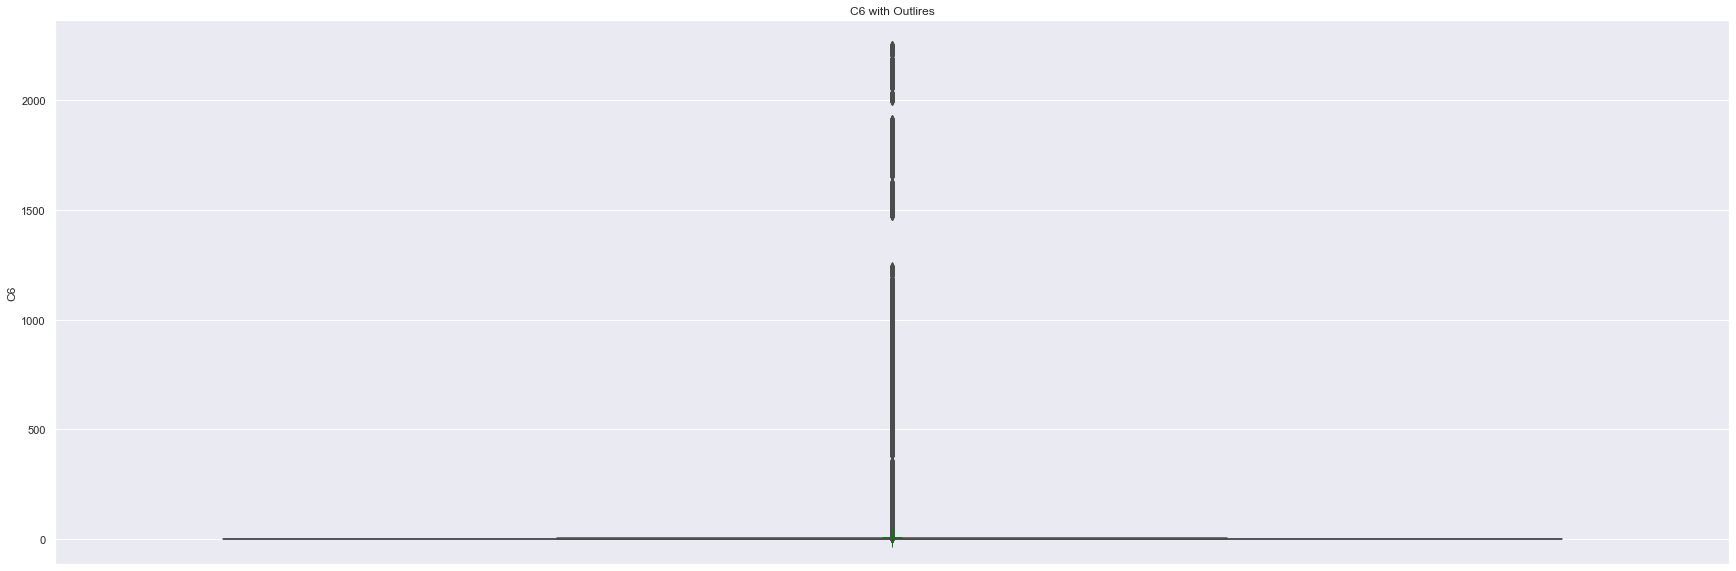

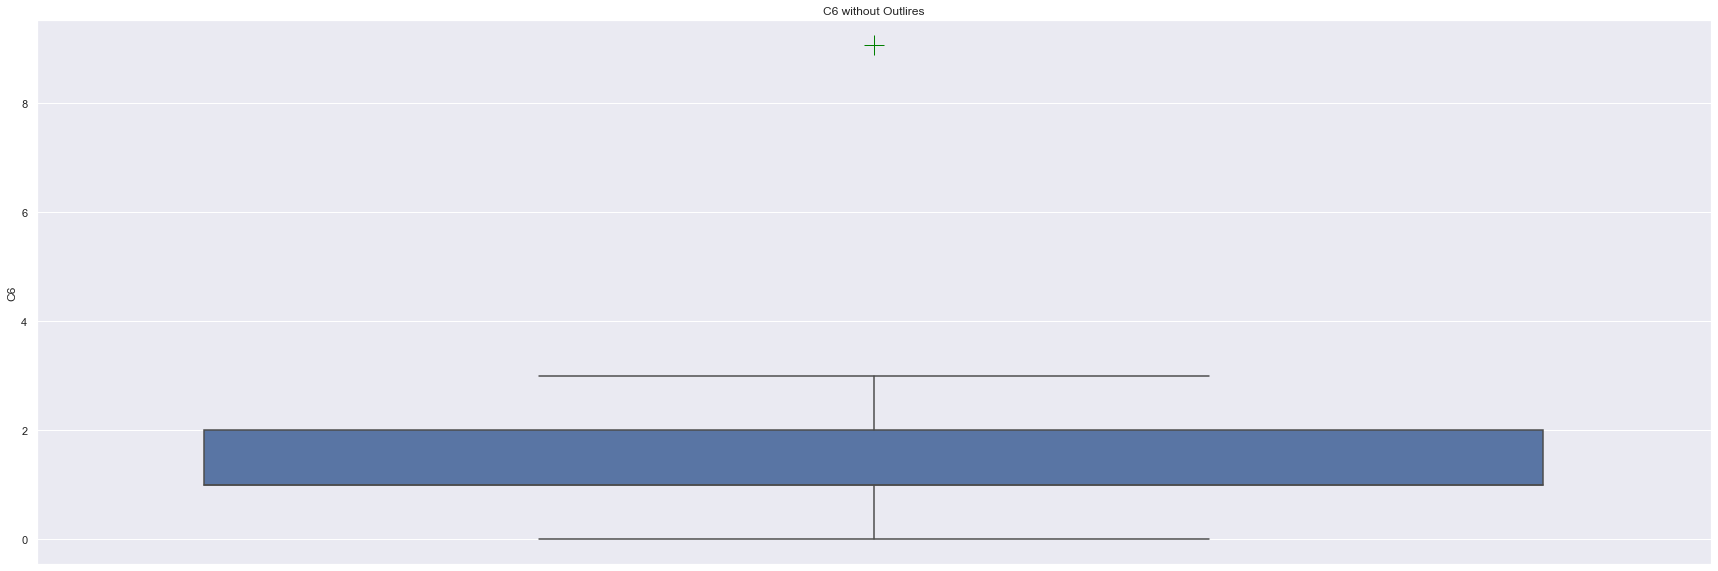

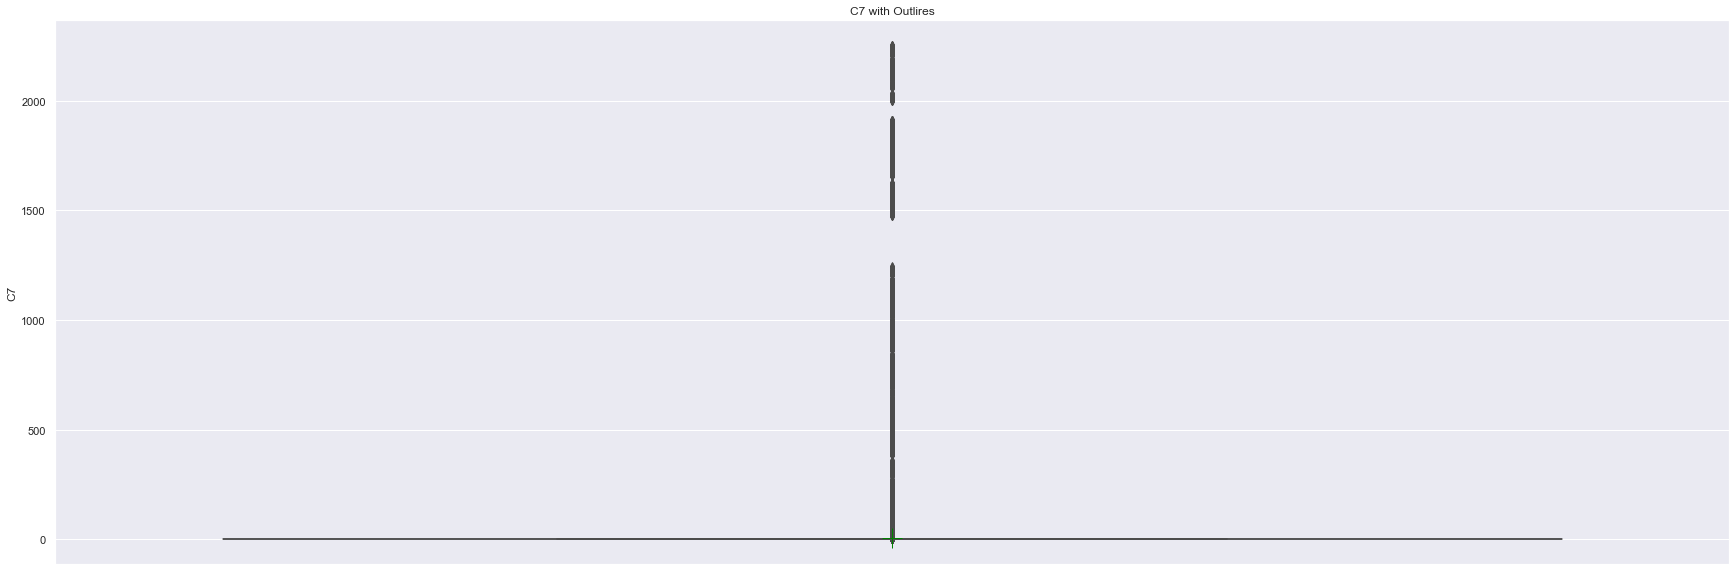

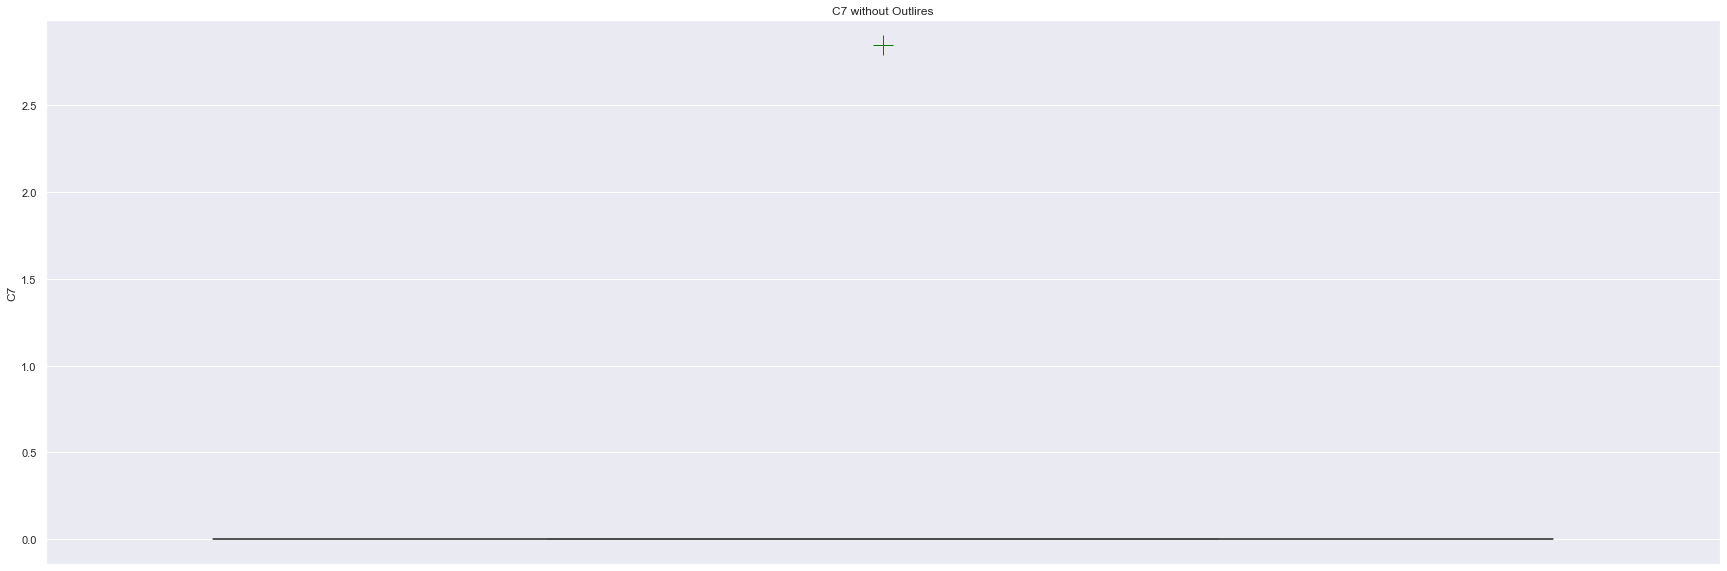

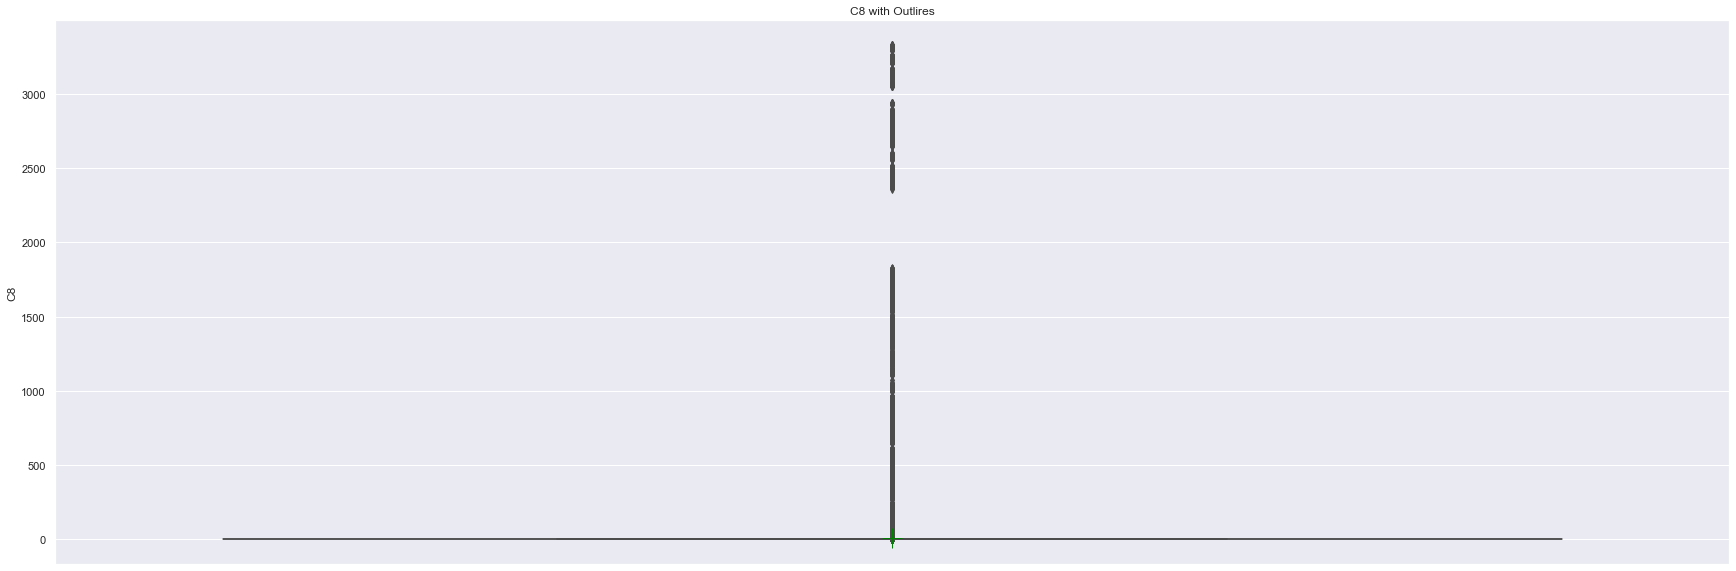

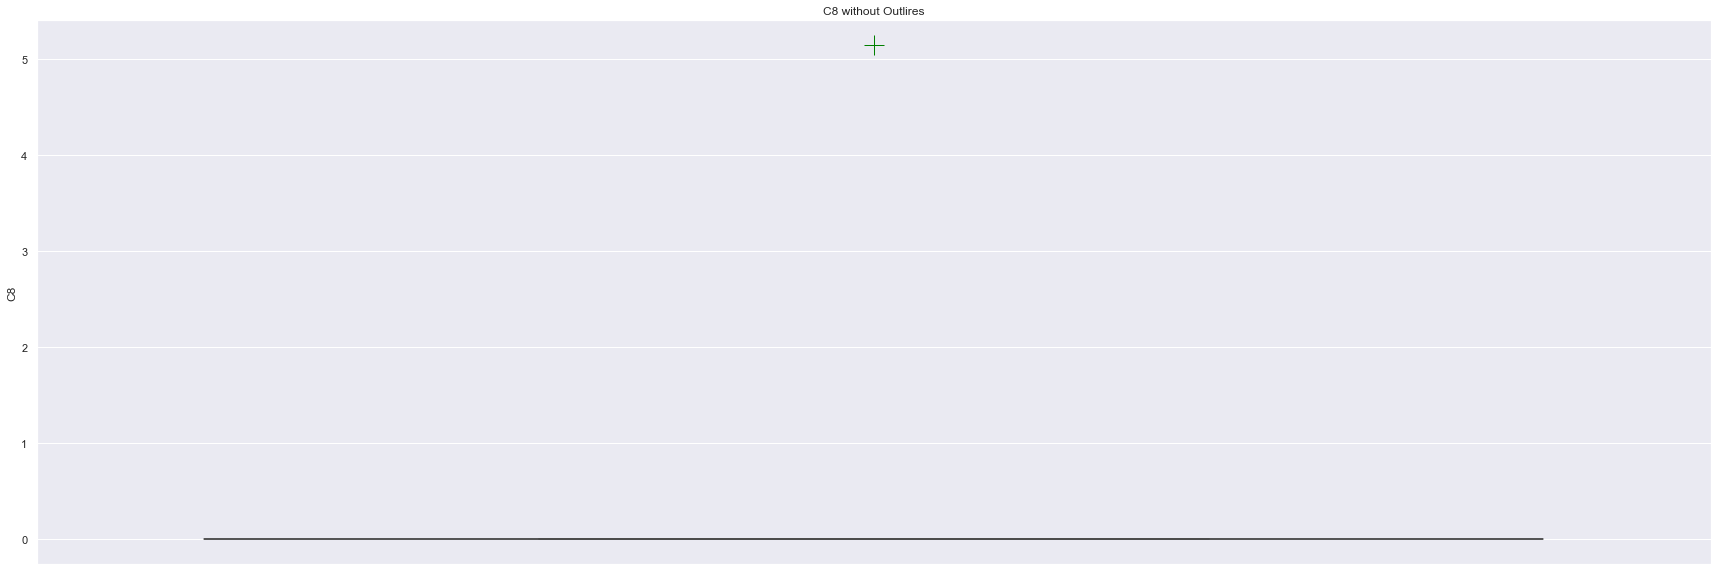

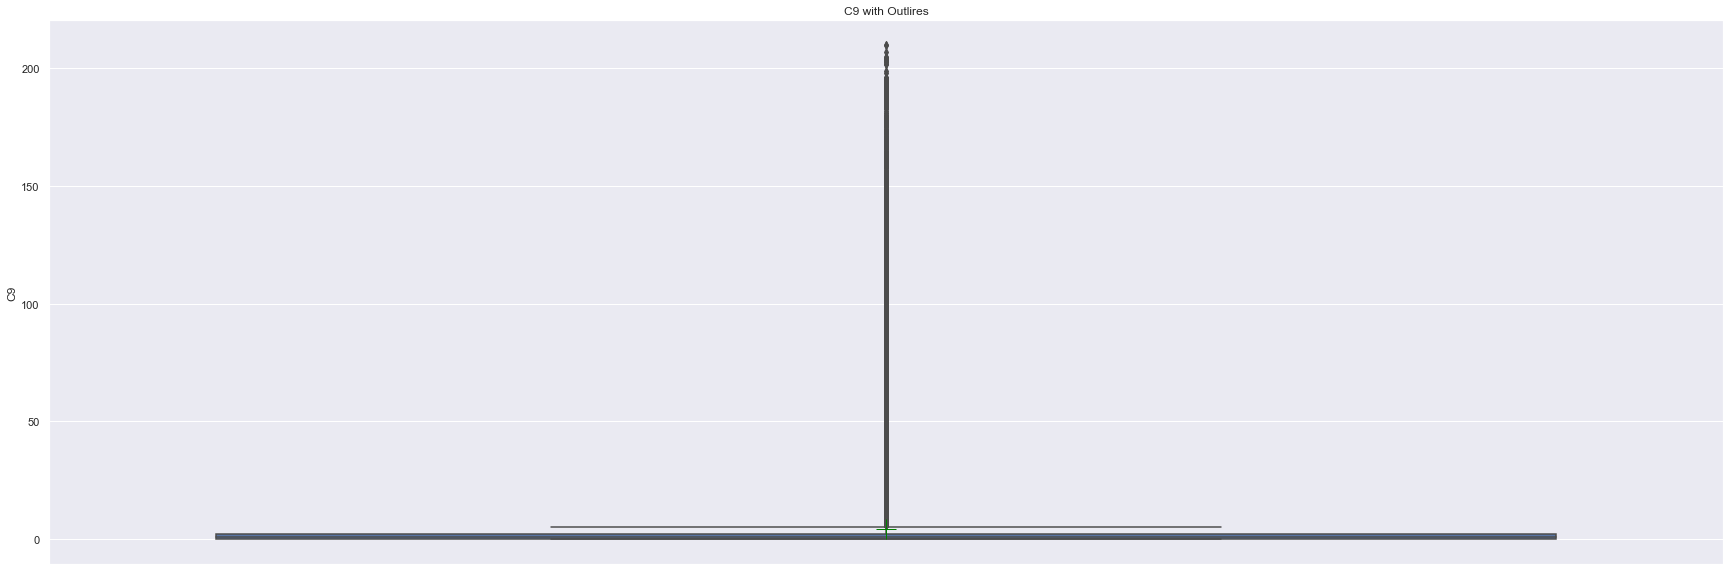

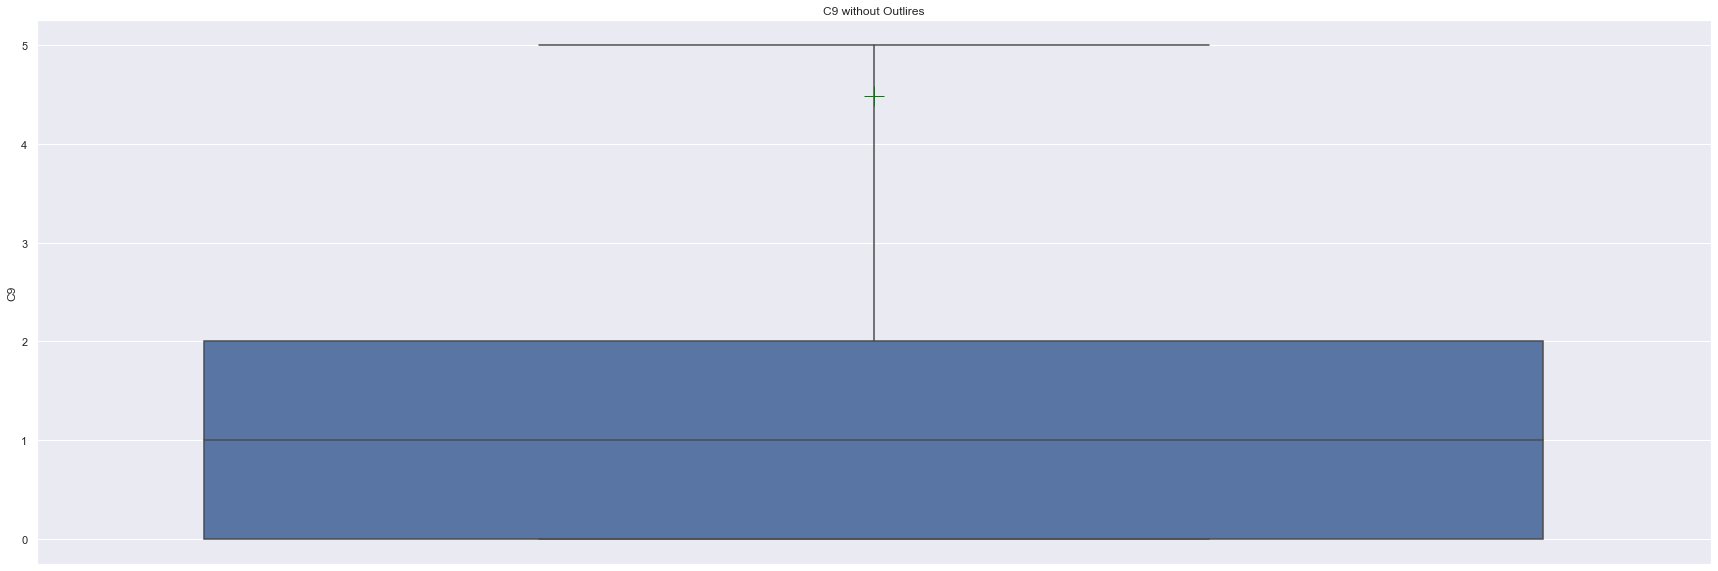

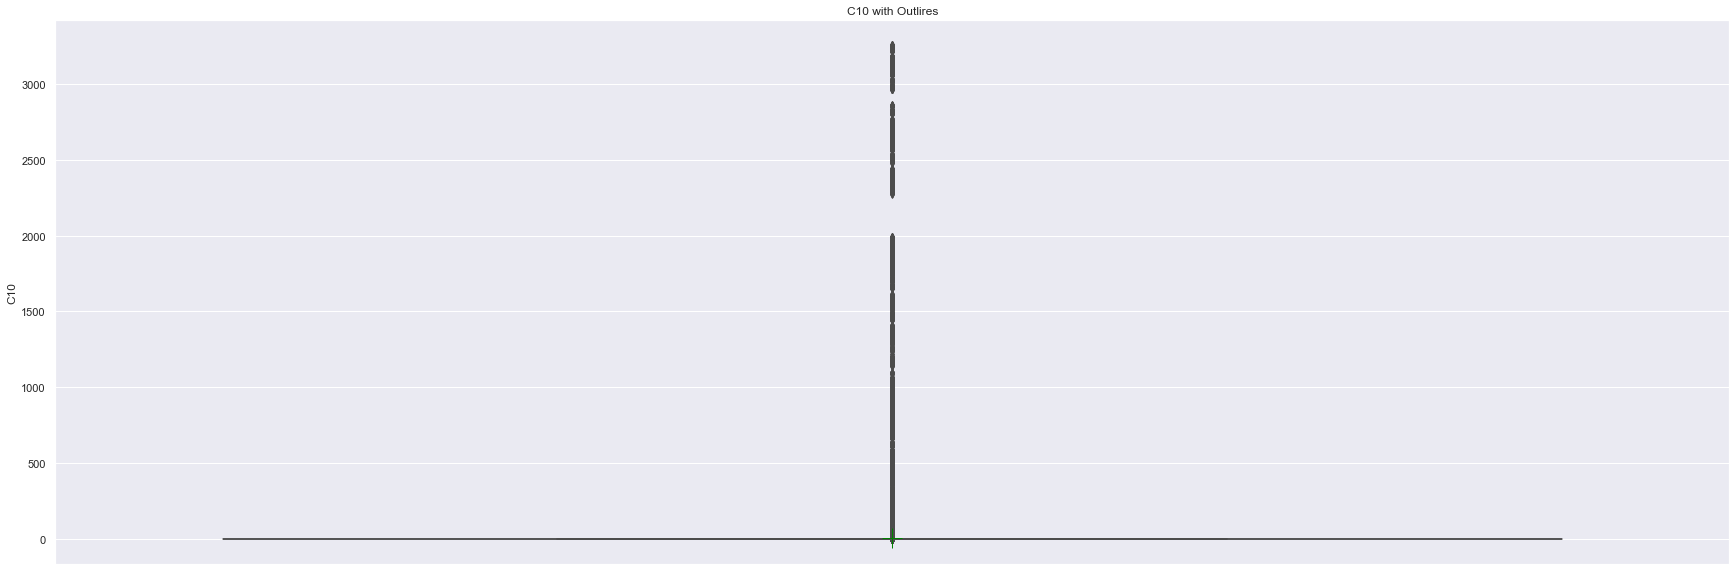

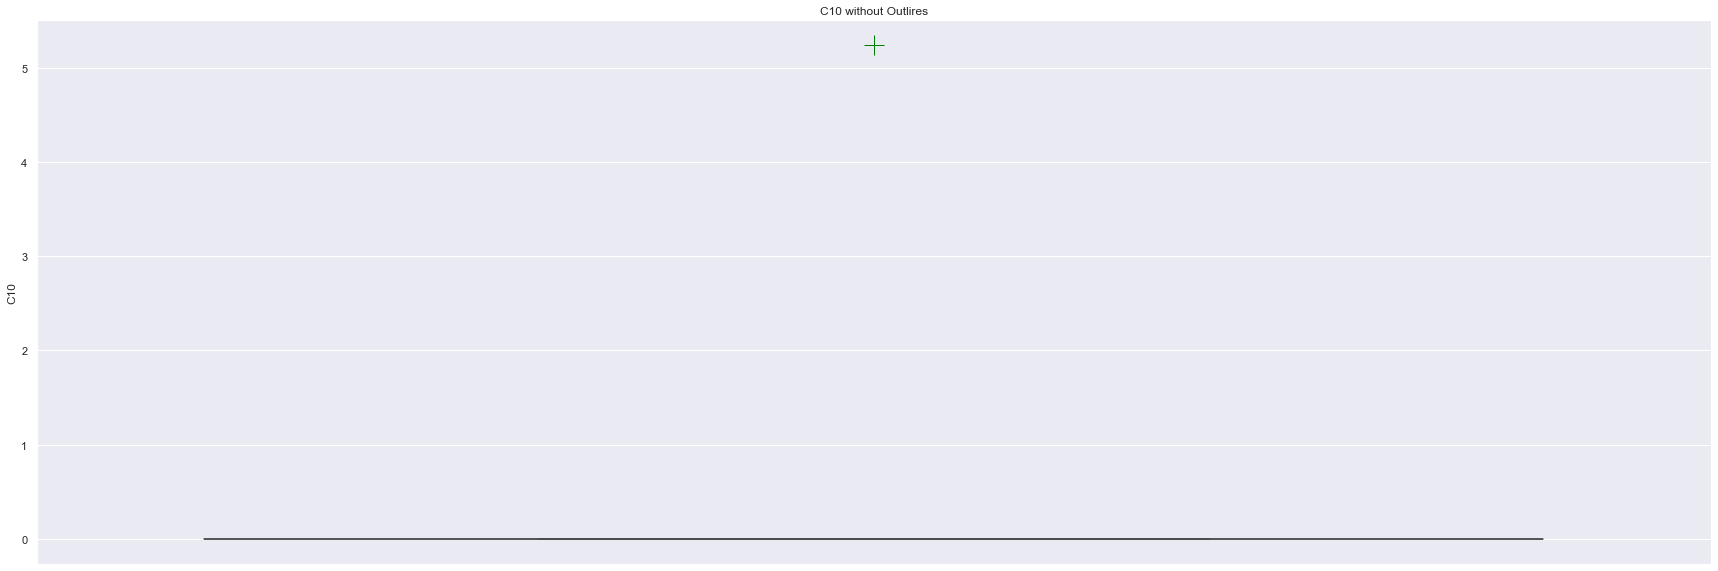

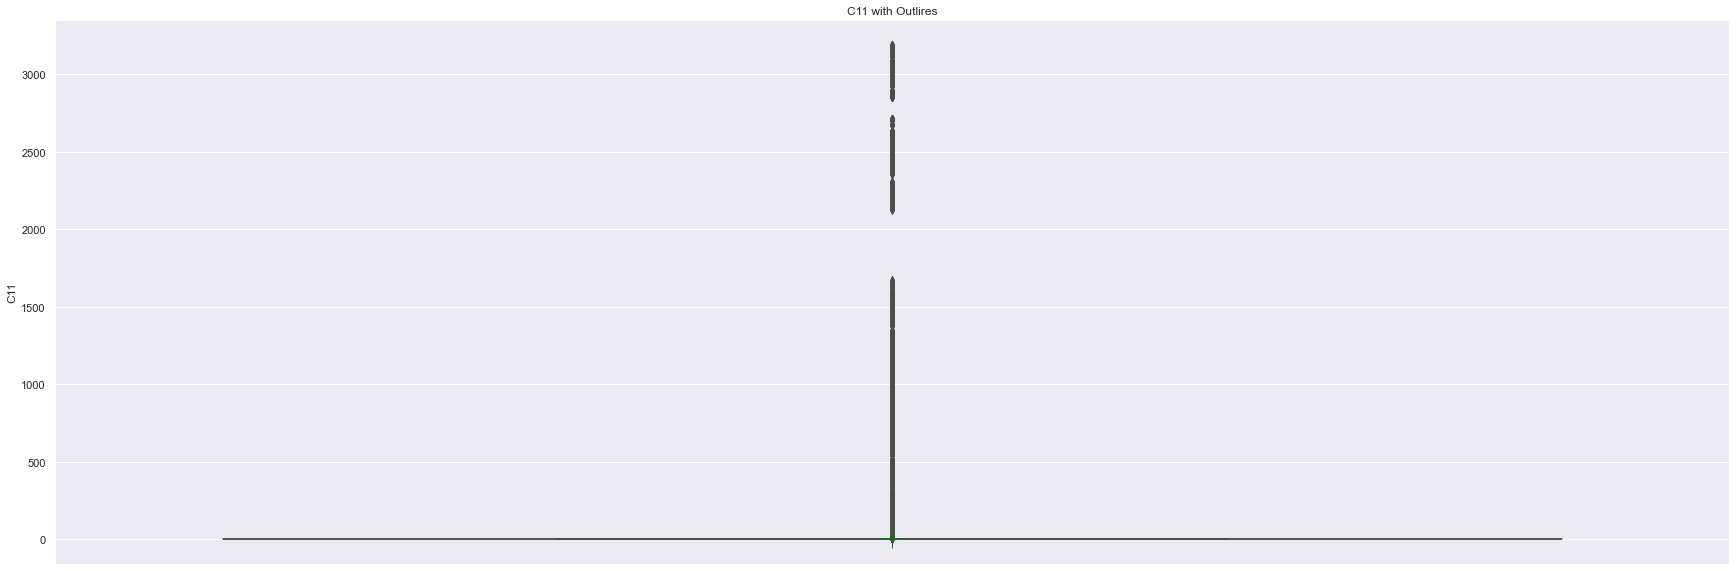

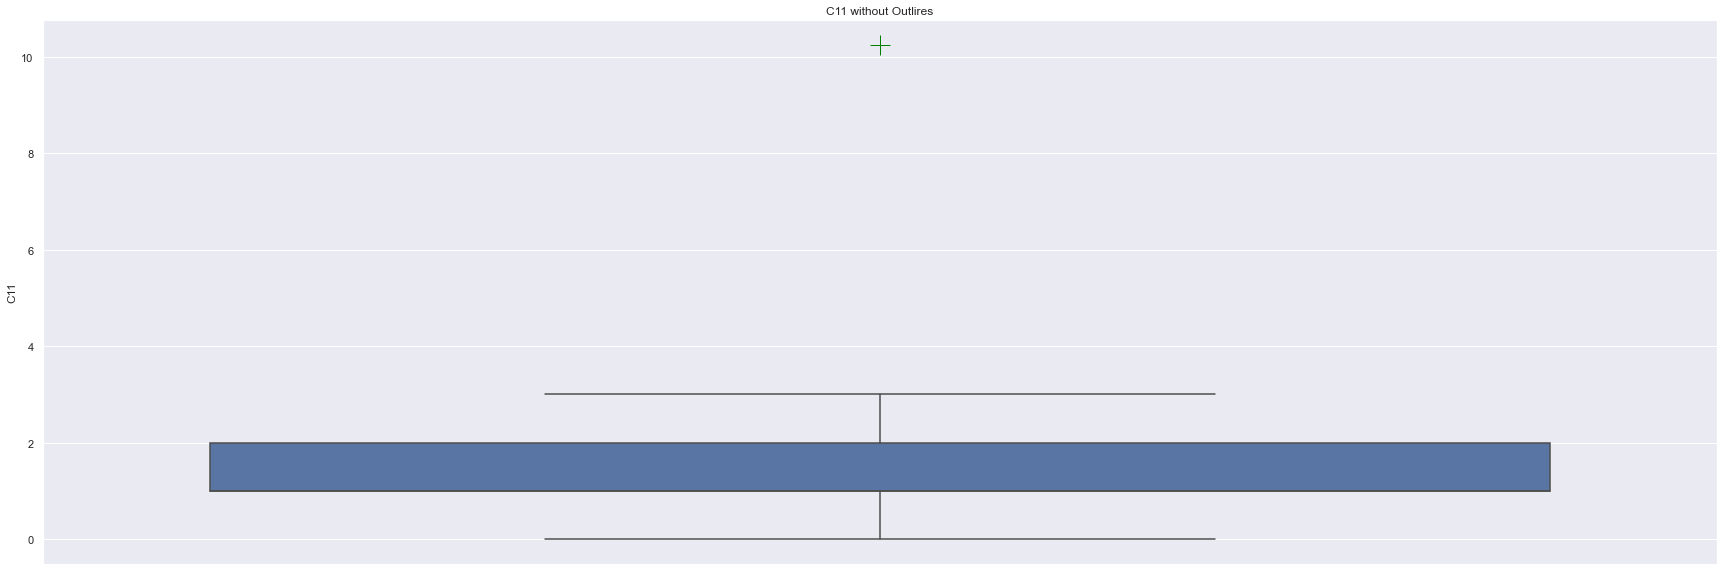

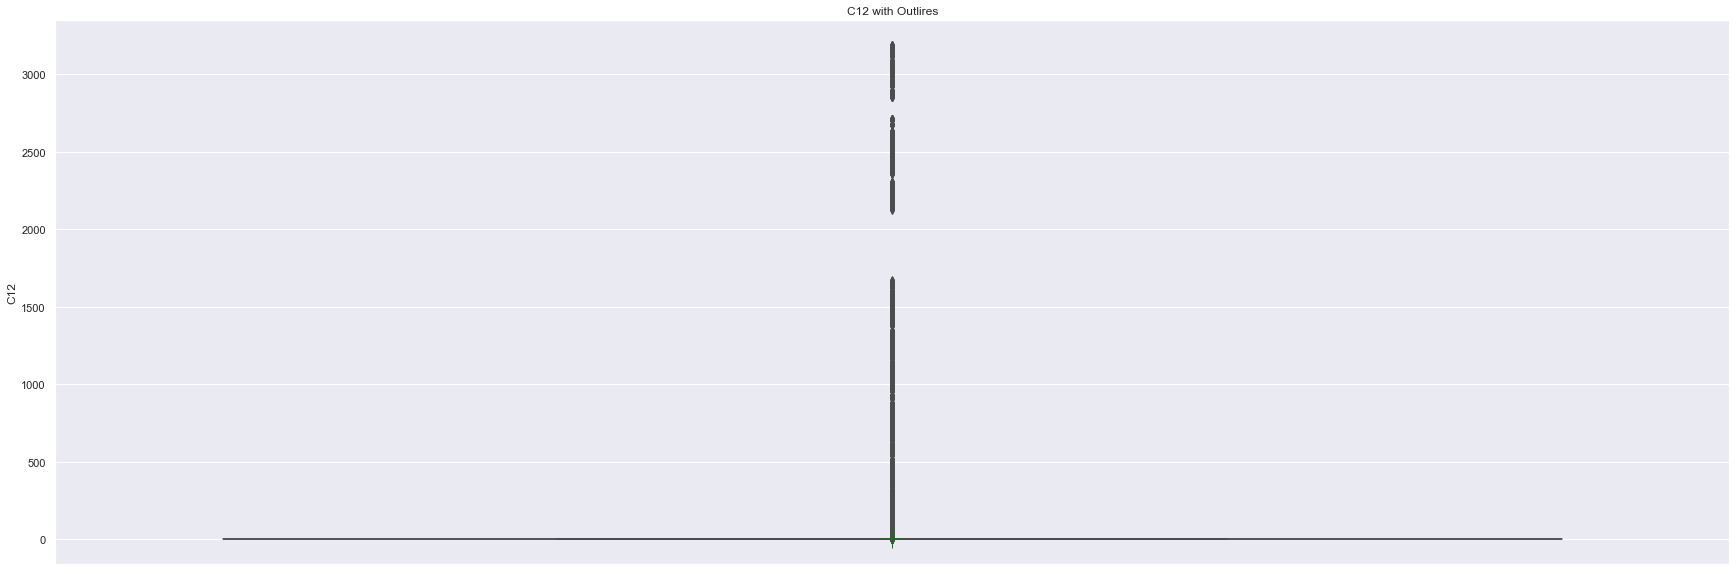

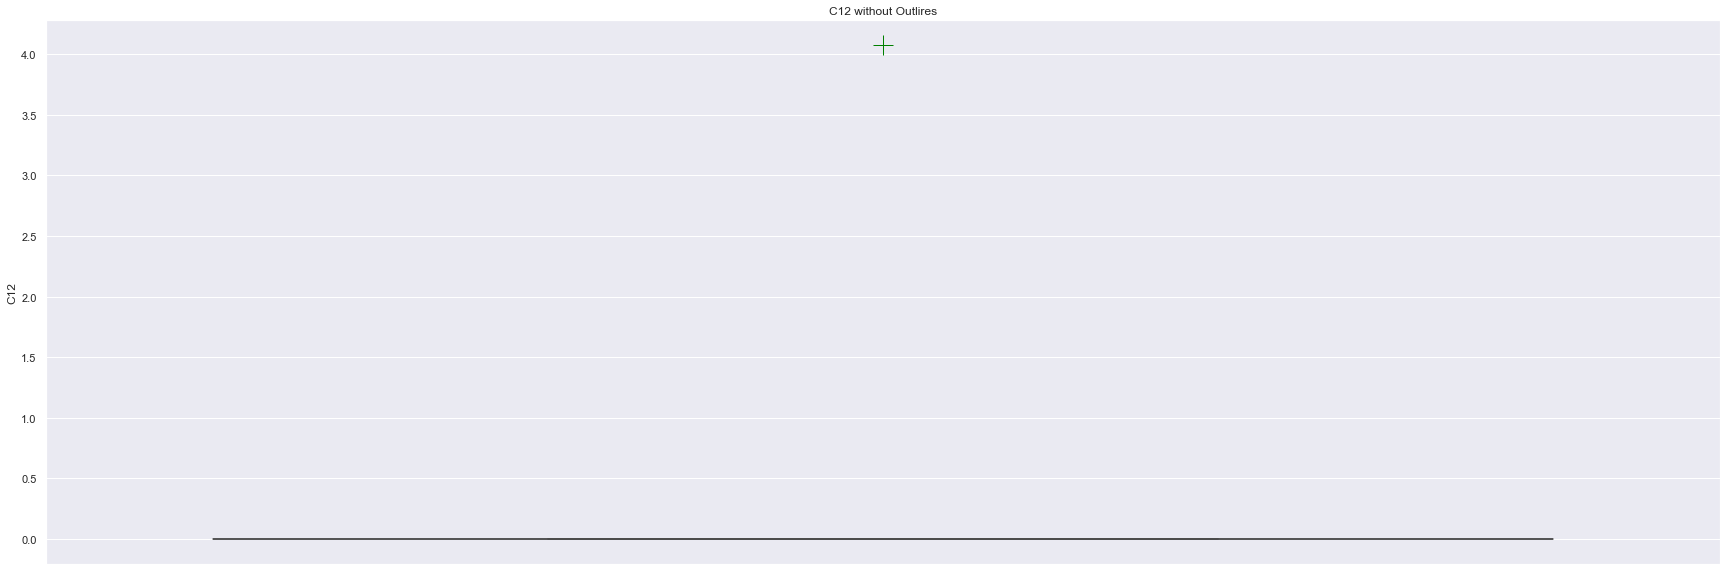

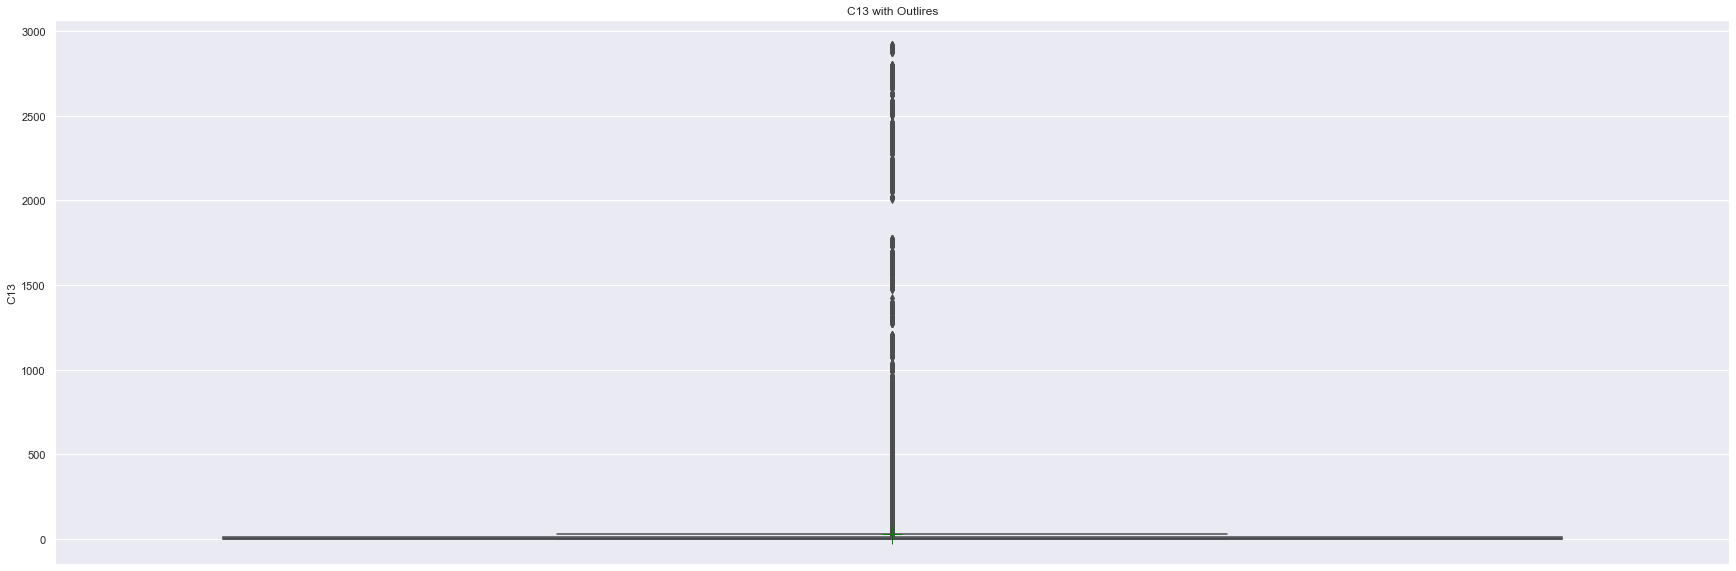

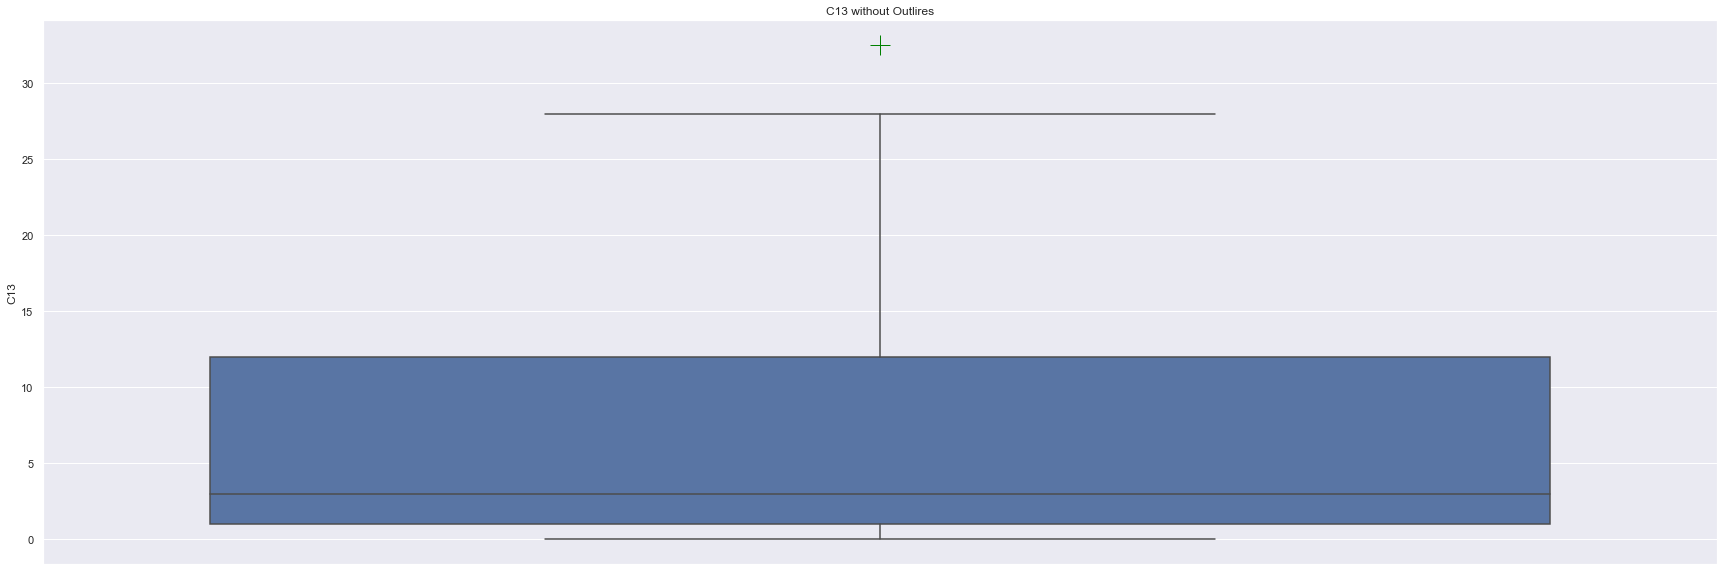

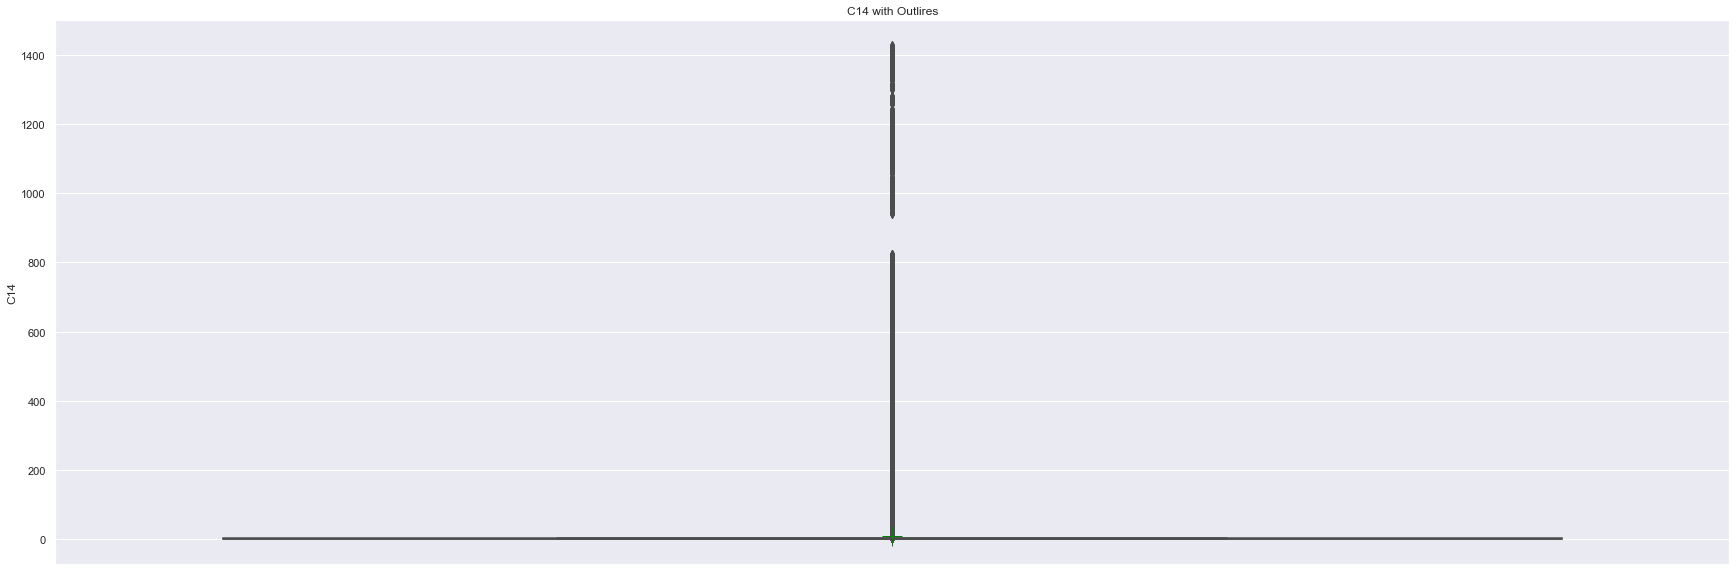

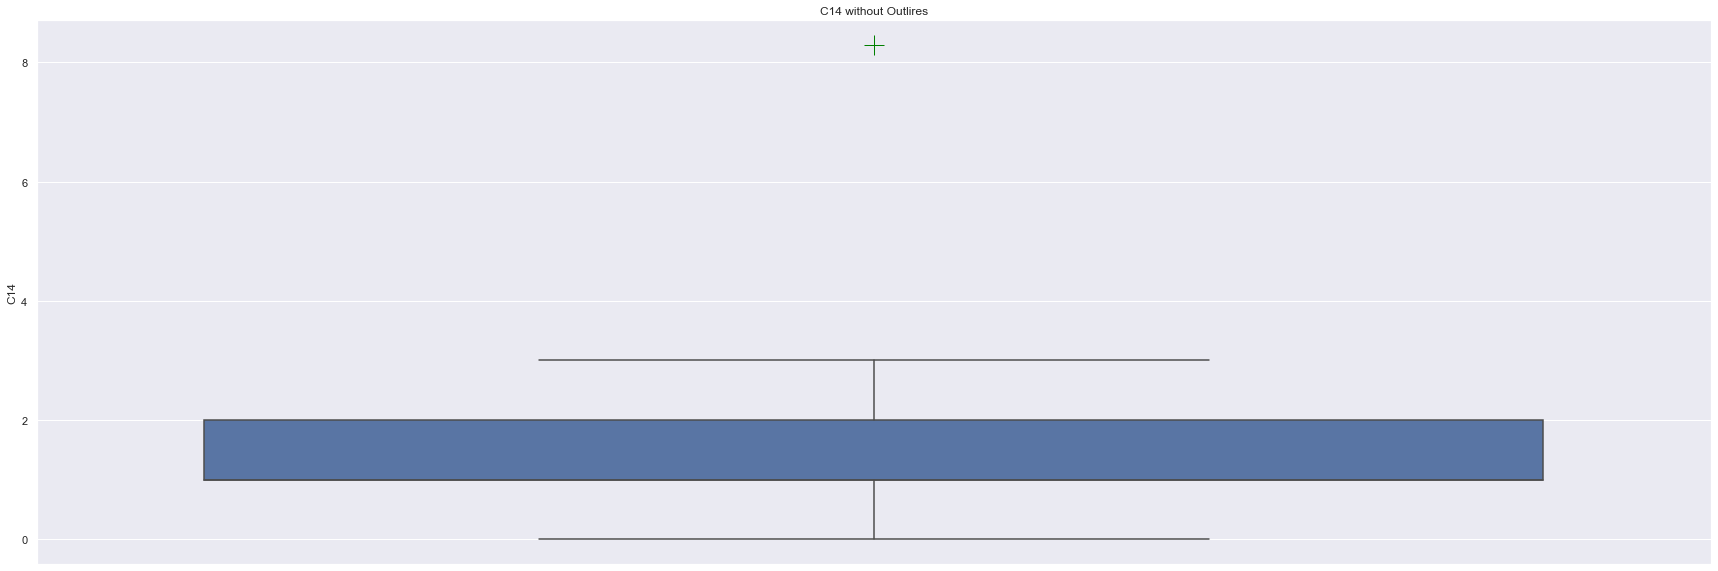

In [56]:

for i in range(1,15):
   
    sns.boxplot(y=train_num['C'+str(i)],showmeans=True,showfliers=True,meanprops={"marker": "+",
                       "markeredgecolor": "green",
                       "markersize": "20"}).set(title='C'+str(i)+' with Outlires')
    plt.show()
    
    sns.boxplot(y=train_num['C'+str(i)],showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "green",
                       "markersize": "20"},showfliers=False).set(title='C'+str(i)+' without Outlires')
    plt.show()


**Because of presence of high no. and high magnitude of outliers the mean is highly deviated from interquartile range for variables C1 to C14.**

# Boxplot of variables from D1 to D14

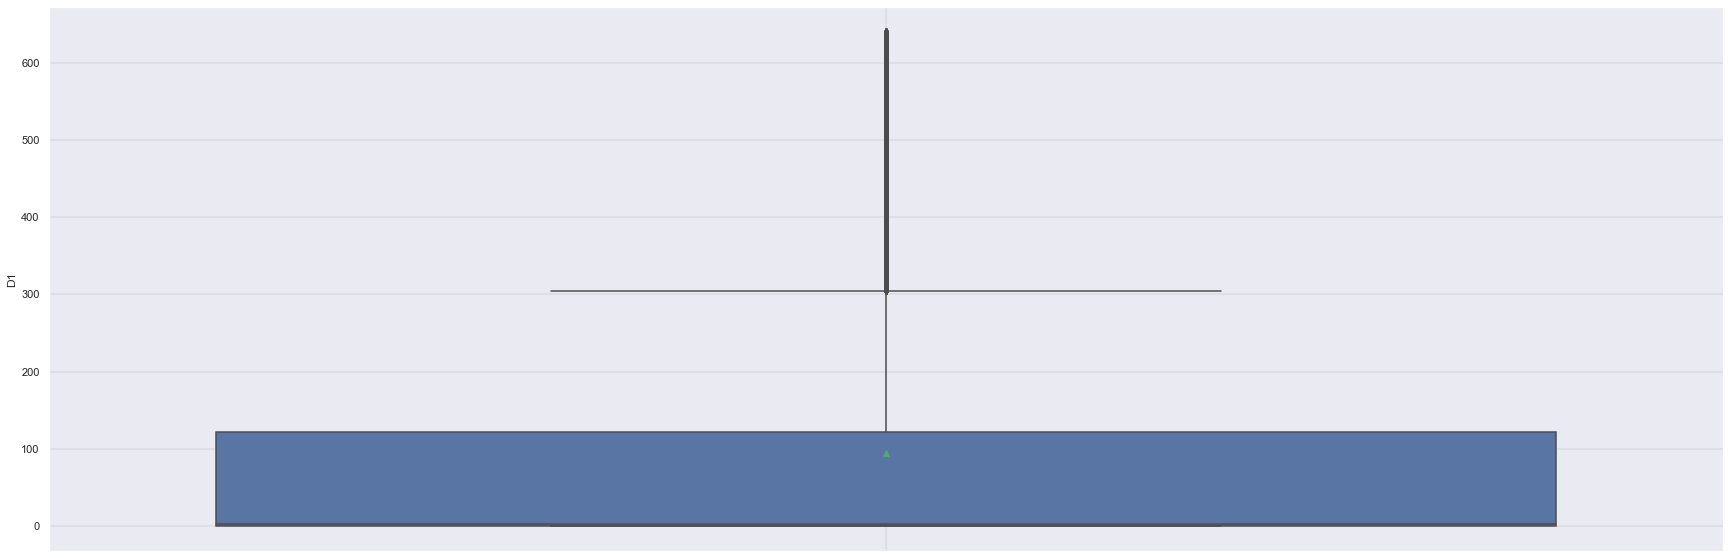

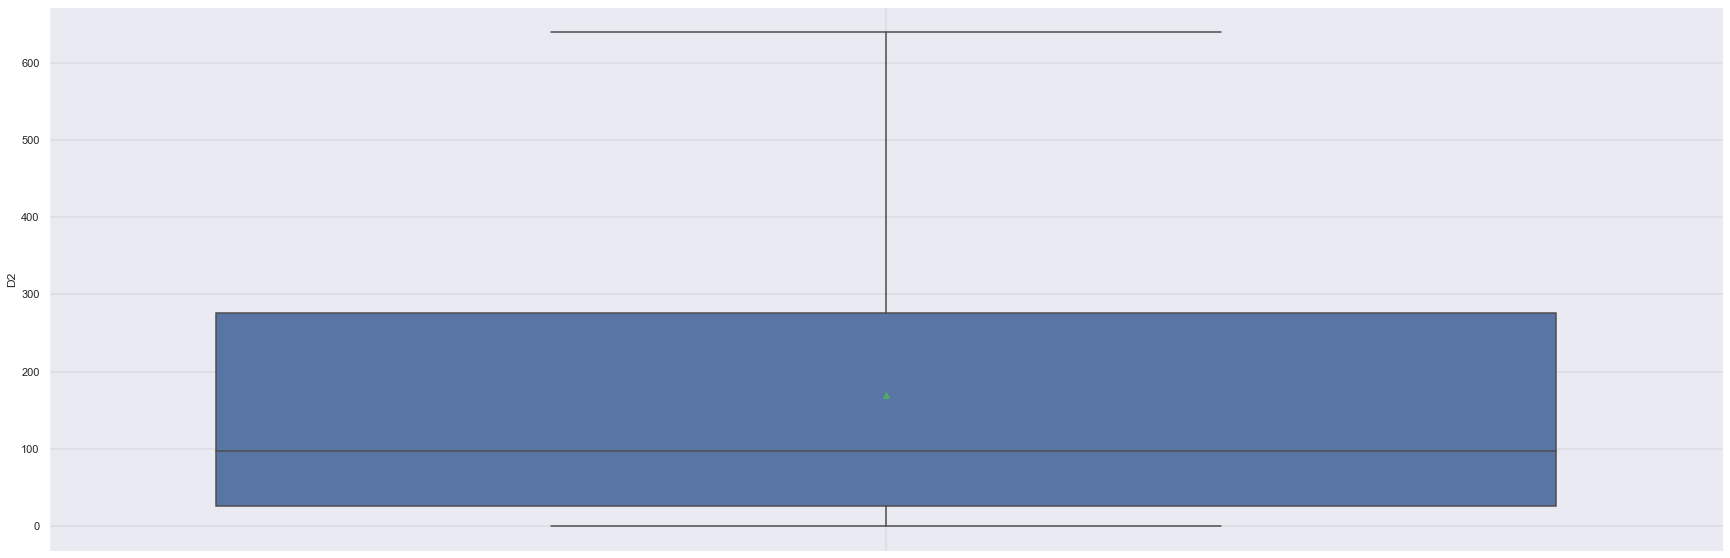

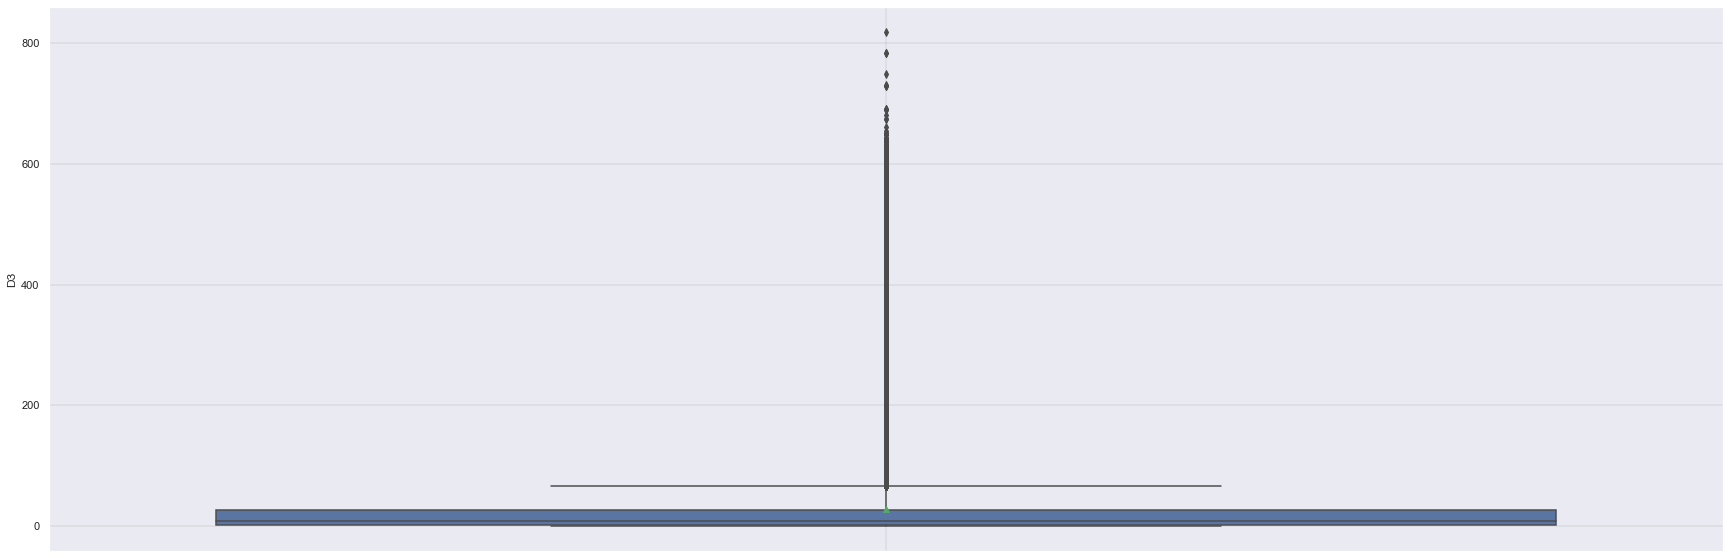

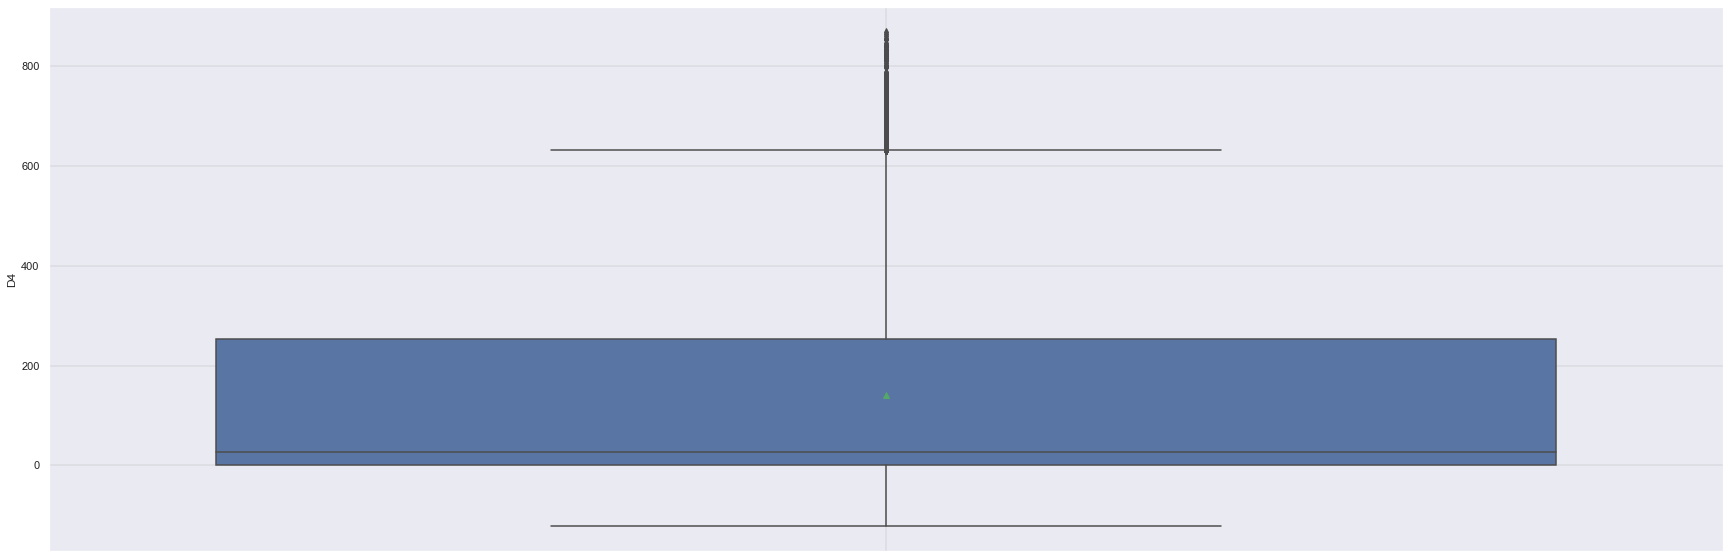

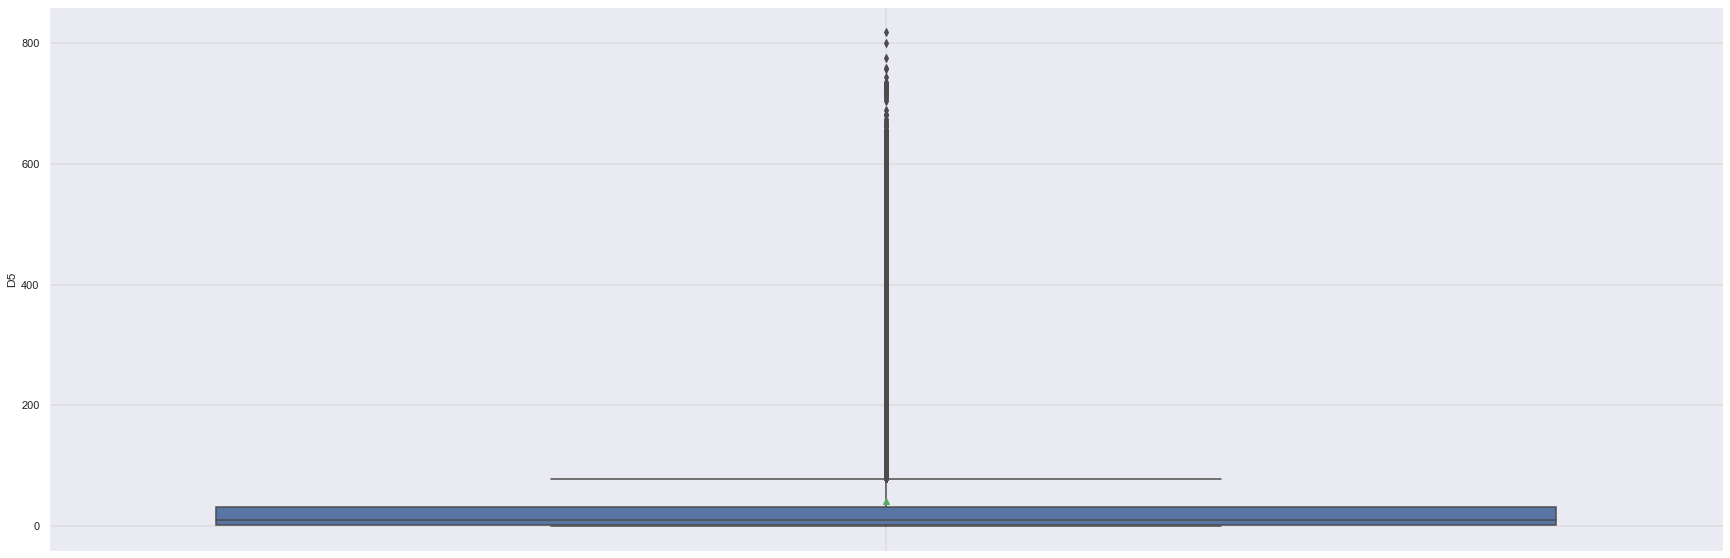

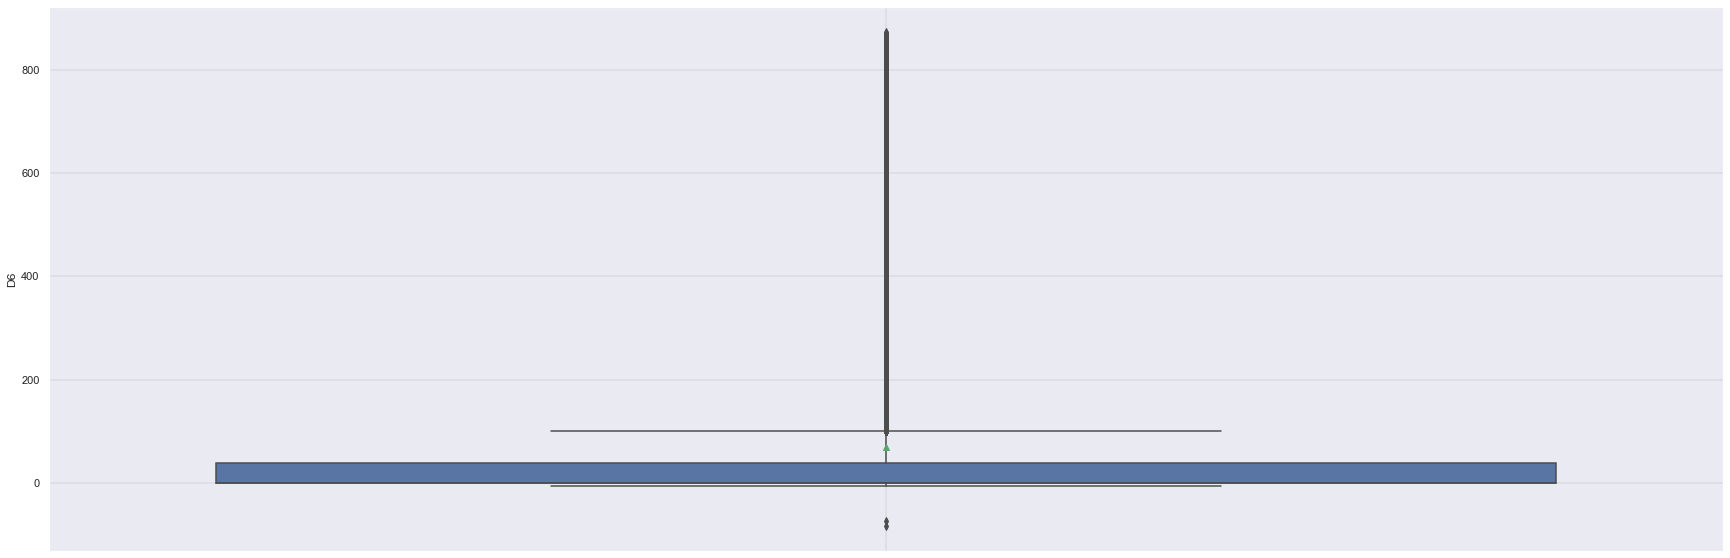

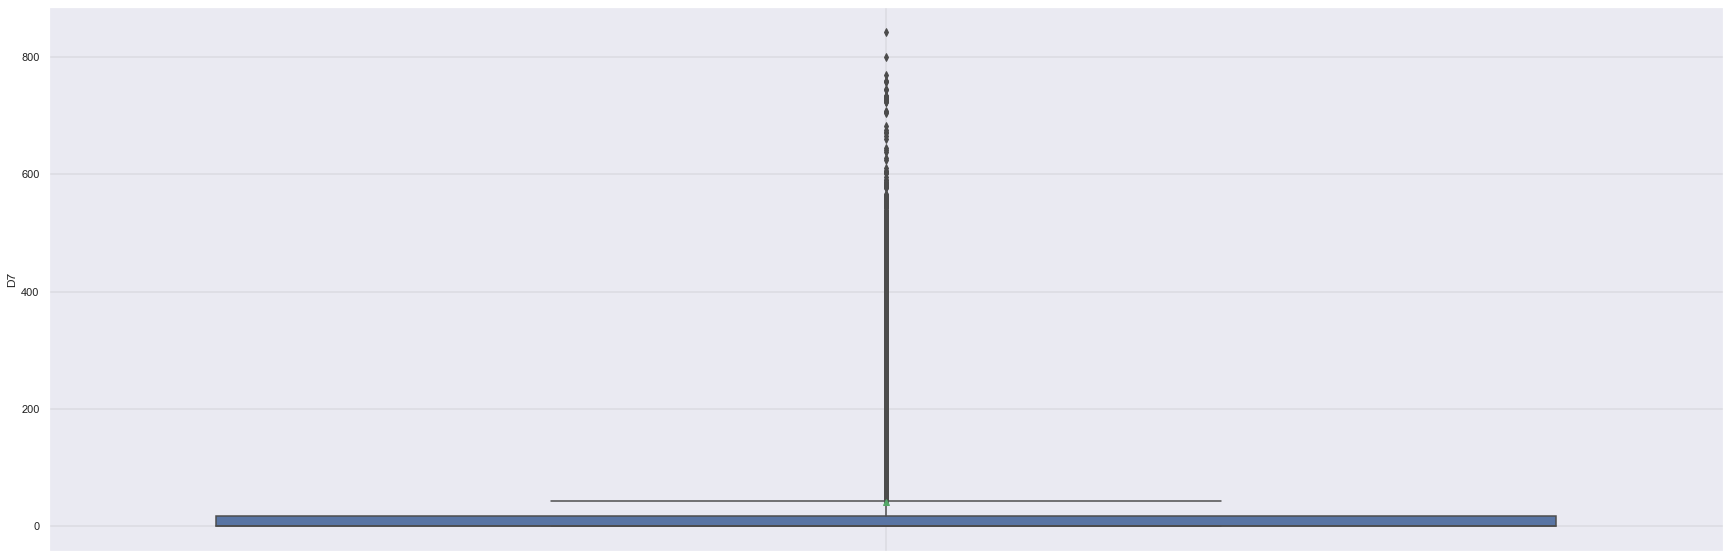

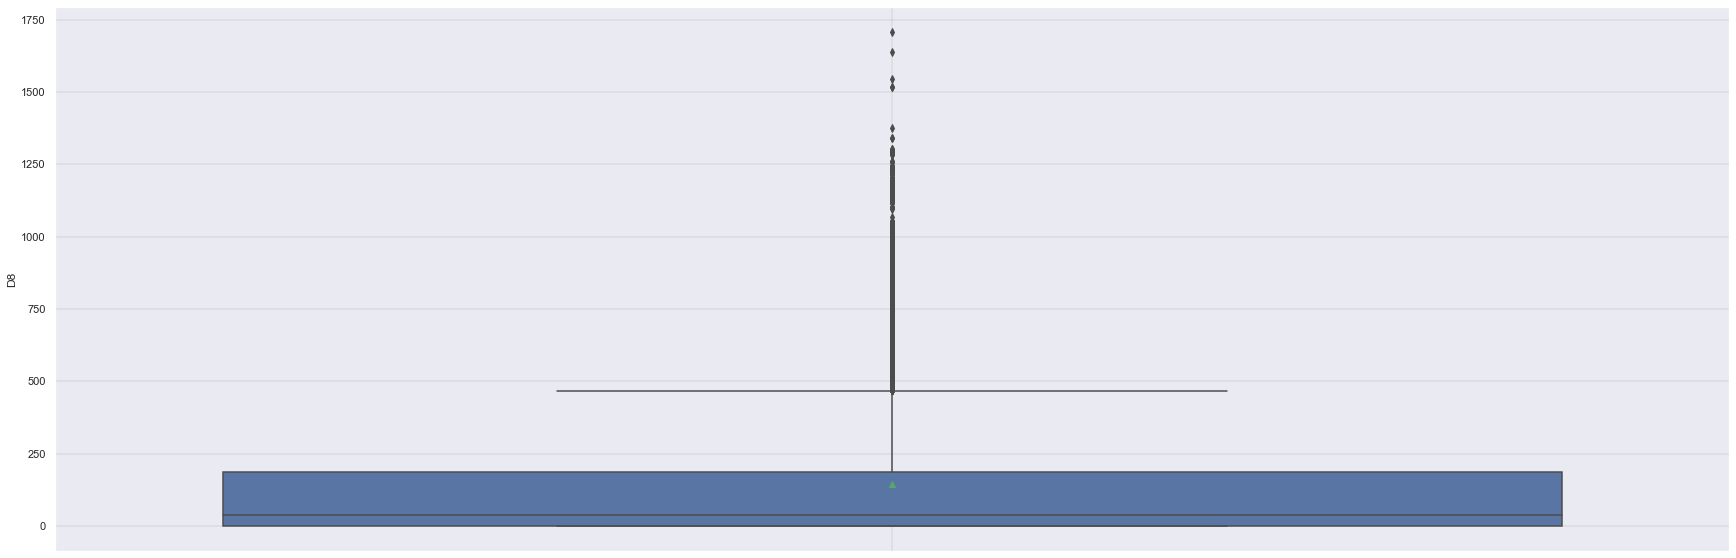

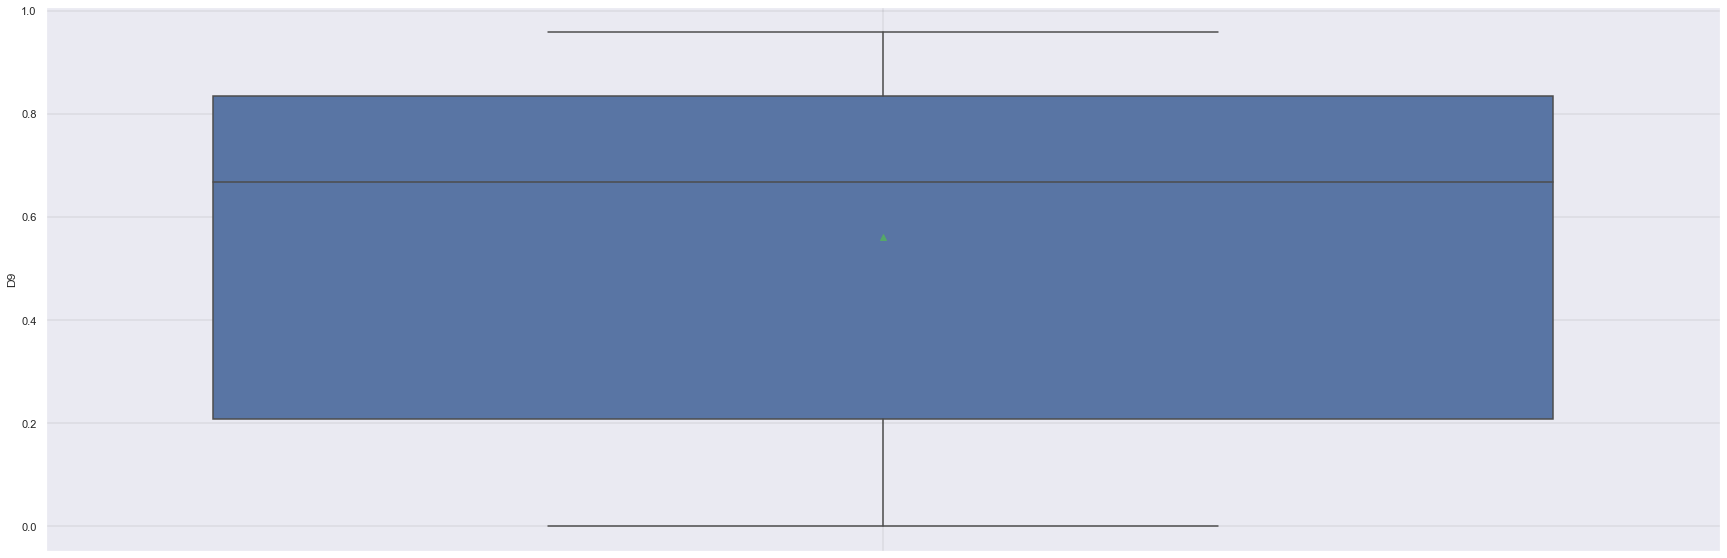

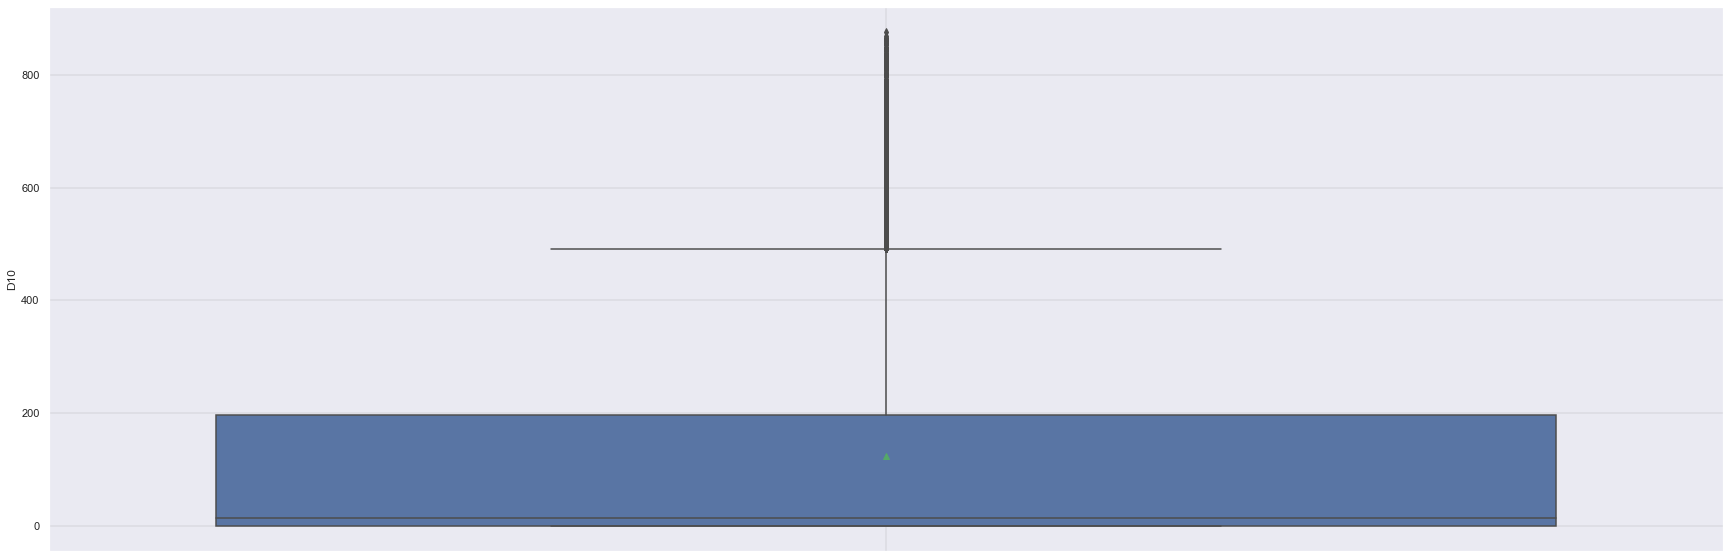

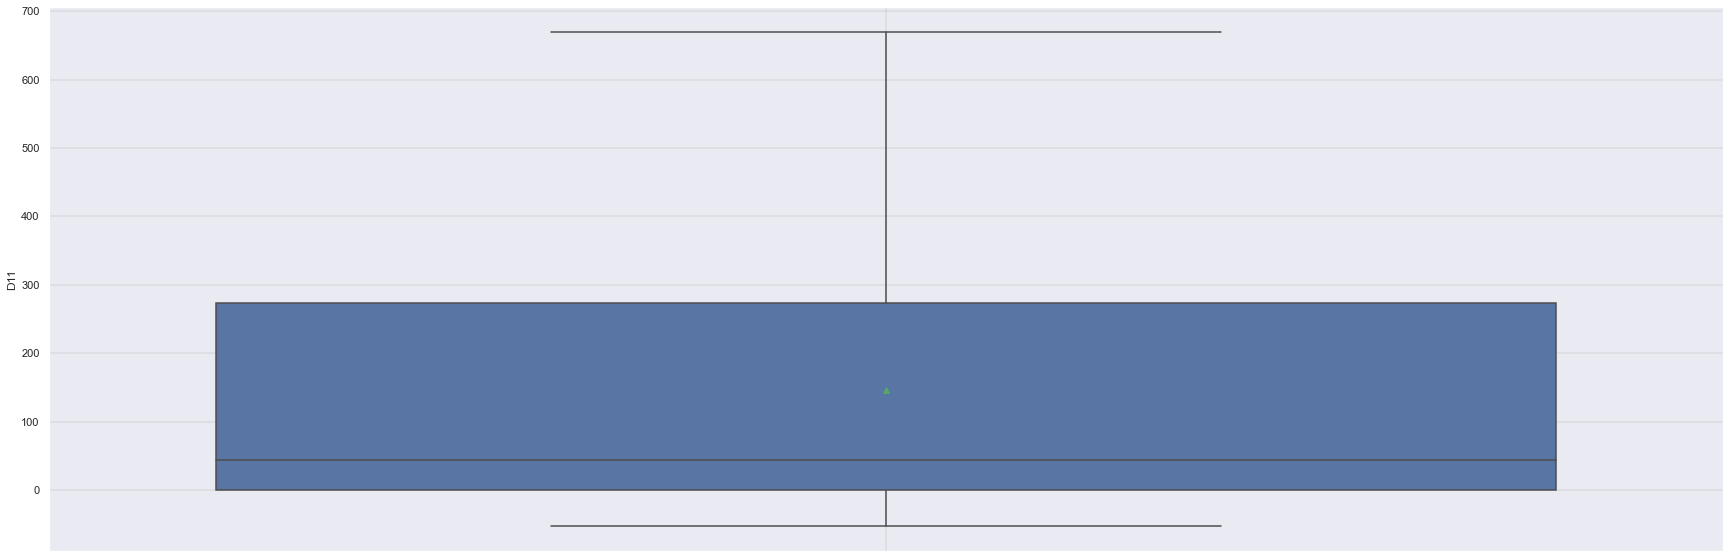

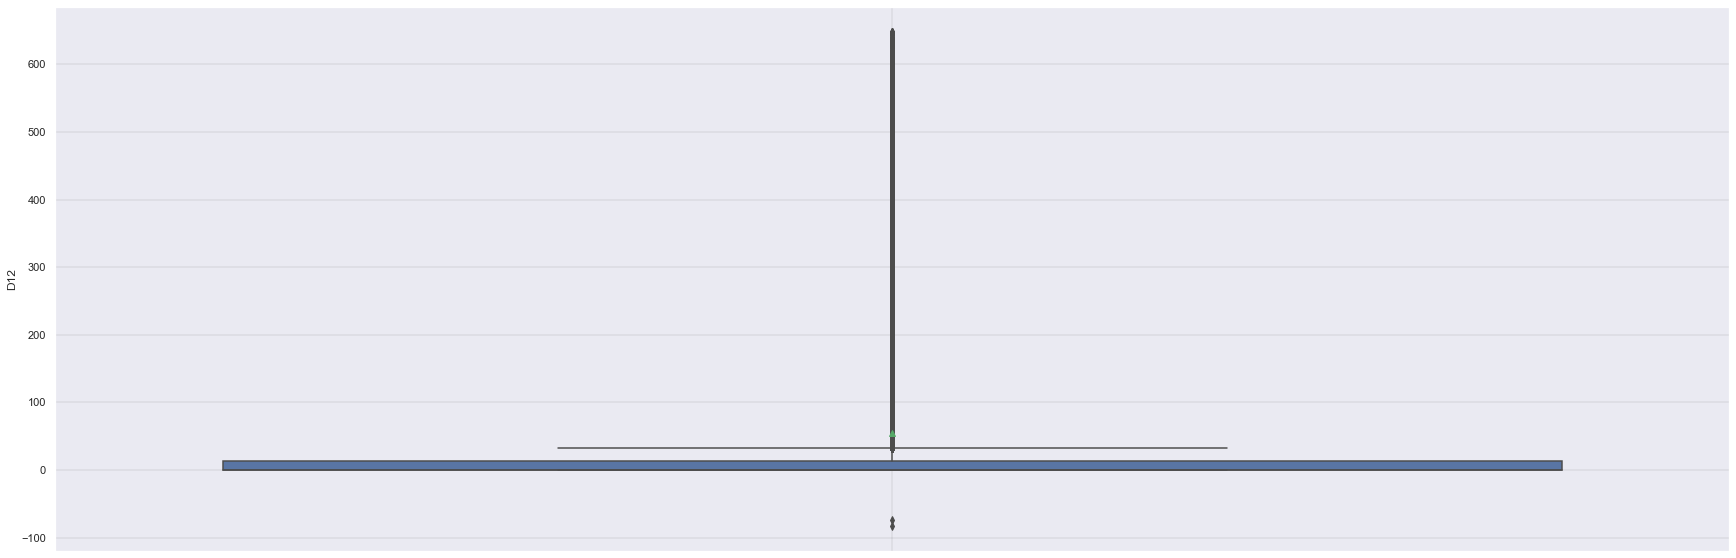

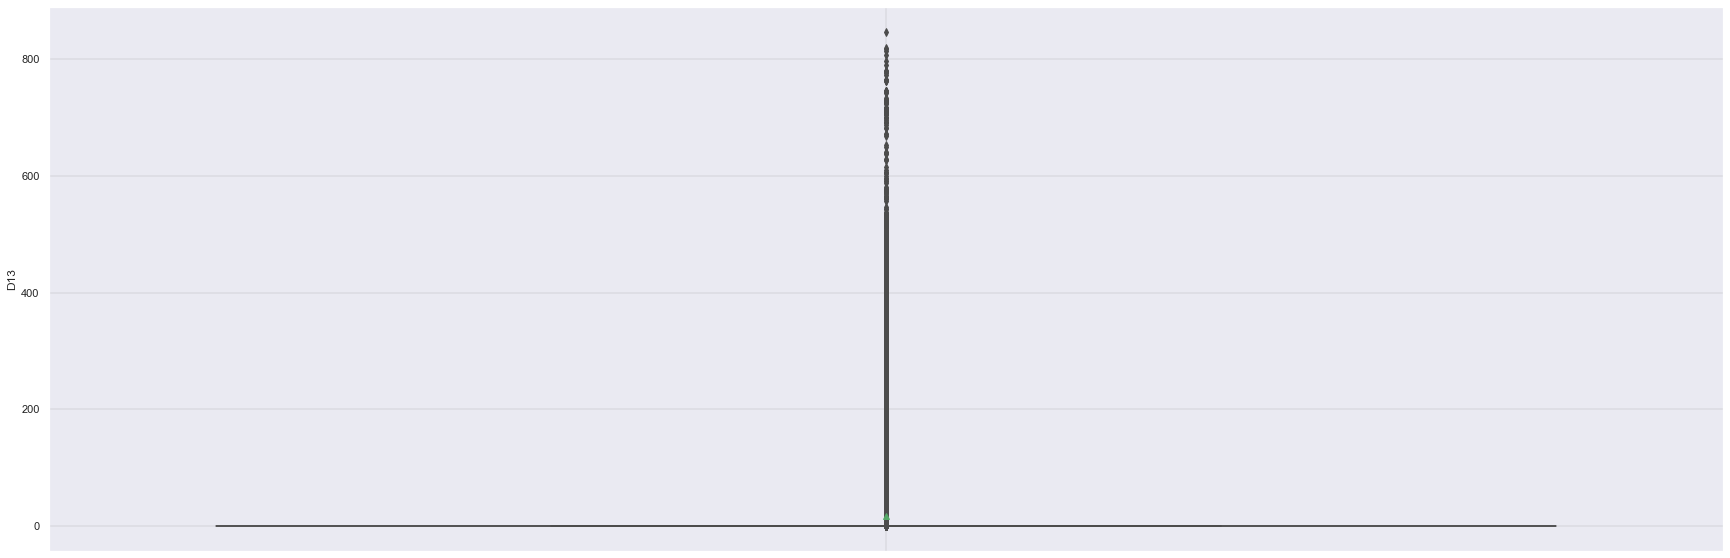

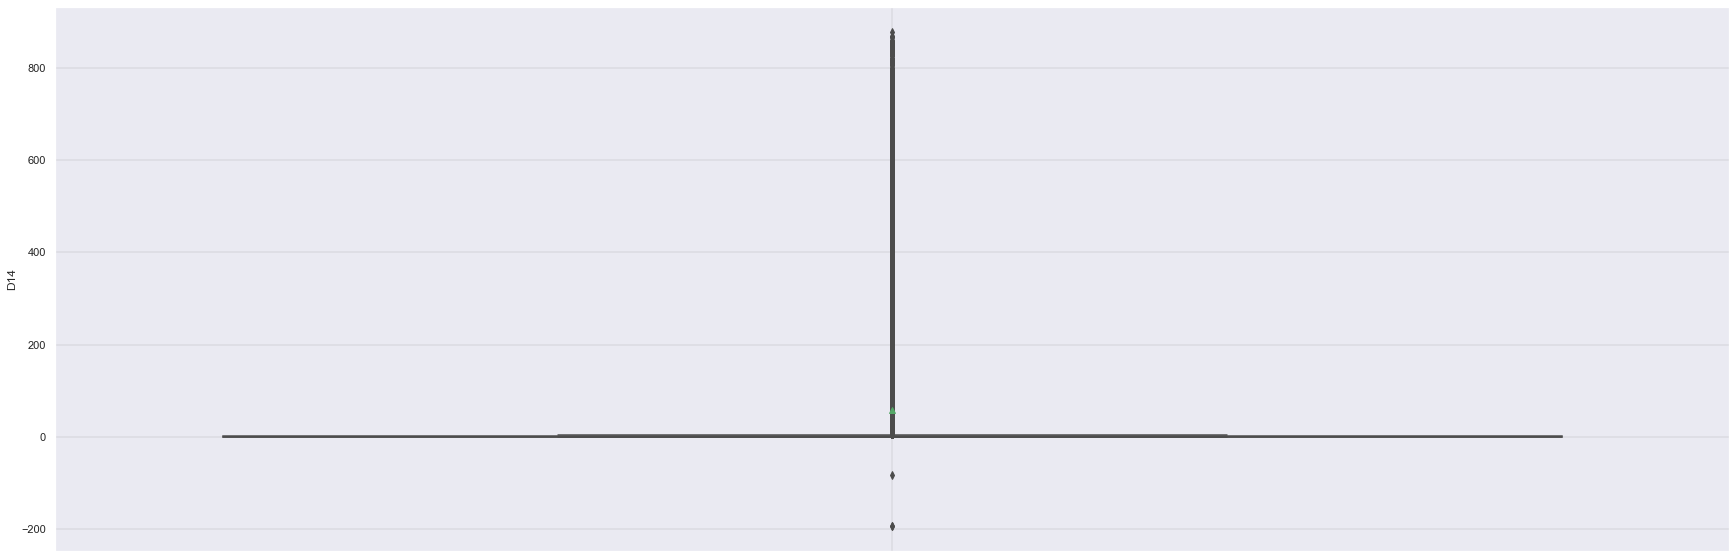

In [54]:
for i in range(1,15):
    ax=sns.boxplot(y=train_num['D'+str(i)],showfliers=True,showmeans=True,)
    ax.grid(b=True, which='major', color='black', linewidth=0.1)
    plt.show()

**For variables D1,D2,D4,D8,D9,D10 and D11 the presence of outlires is not that significant and doesn't deviate the value of mean to great extend.**

**For rest of the variables the no. and magnitude of outlires is high and it deviates the mean value.**


<b><font size=6 color='green'>Corelation Matrix for Numerical Variable :</b></font>

<b><font size=6 color='blue'>C1-C14</b></font>

**C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc.**

**The actual meaning is 0 masked.**

**All of the C features are continuous.**

In [21]:

c = pd.DataFrame()
index=0
for i in train_df.columns:
    
    if str(i)[0] =='C':
        c.insert(index,i,train_df[i],True)
        index=index+1




In [22]:
c.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


# Corelation Matrix 

           C1        C2        C3        C4        C5        C6        C7  \
C1   1.000000  0.995089 -0.003467  0.967801  0.165865  0.982239  0.926256   
C2   0.995089  1.000000 -0.003339  0.972133  0.126541  0.974845  0.938866   
C3  -0.003467 -0.003339  1.000000 -0.001720 -0.008101 -0.004711 -0.001730   
C4   0.967801  0.972133 -0.001720  1.000000 -0.012842  0.962319  0.895092   
C5   0.165865  0.126541 -0.008101 -0.012842  1.000000  0.232409 -0.009970   
C6   0.982239  0.974845 -0.004711  0.962319  0.232409  1.000000  0.858583   
C7   0.926256  0.938866 -0.001730  0.895092 -0.009970  0.858583  1.000000   
C8   0.967746  0.975862 -0.001203  0.959995 -0.011654  0.921972  0.982983   
C9   0.176002  0.133567 -0.010074 -0.015970  0.925786  0.250695 -0.012399   
C10  0.958202  0.970623 -0.001494  0.952466 -0.011846  0.914440  0.985061   
C11  0.996516  0.993898 -0.003583  0.974547  0.168861  0.991104  0.915210   
C12  0.927938  0.940257 -0.001763  0.894618 -0.009875  0.858182  0.999489   

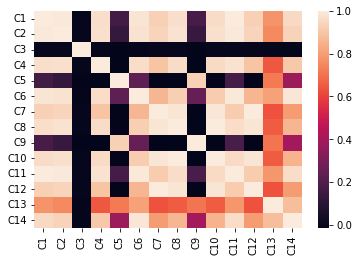

In [23]:

print(c.corr())
hm=sns.heatmap(data = c.corr())
plt.show()


**1. Variables C3,C5 and C9 have little bit away from relation with rest of the variable So, here there is No-Correlation .**

**2. Rest of the Variables have a Decent Correlation with each other.**

<b><font size=6 color='blue'>D1-D15</b></font>

**The D Columns are "time deltas" from some point in the past.**


In [24]:
d = pd.DataFrame()
index=0
for i in train_df.columns:
    
    if str(i)[0] =='D':
        d.insert(index,i,train_df[i],True)
        index=index+1

In [25]:
d.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,DeviceType,DeviceInfo
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,NaN,NaN
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,NaN,NaN
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M


           D1        D2        D3        D4        D5        D6        D7  \
D1   1.000000  0.981311  0.280423  0.585714  0.055236  0.525691  0.204924   
D2   0.981311  1.000000  0.266112  0.570017  0.238365  0.601299  0.454152   
D3   0.280423  0.266112  1.000000  0.149038  0.707425  0.304947  0.818080   
D4   0.585714  0.570017  0.149038  1.000000  0.313650  0.956966  0.574098   
D5   0.055236  0.238365  0.707425  0.313650  1.000000  0.551310  0.986496   
D6   0.525691  0.601299  0.304947  0.956966  0.551310  1.000000  0.506527   
D7   0.204924  0.454152  0.818080  0.574098  0.986496  0.506527  1.000000   
D8   0.050160  0.275296  0.194206  0.162896  0.249359  0.185527  0.223619   
D9   0.007667  0.042865  0.006984  0.041766  0.031989  0.040120  0.025509   
D10  0.562145  0.525967  0.092362  0.636928  0.116784  0.463143  0.107557   
D11  0.592629  0.563220  0.055433  0.657797  0.058496       NaN       NaN   
D12  0.521104  0.668833  0.349025  0.999999  0.565222  0.976834  0.553886   

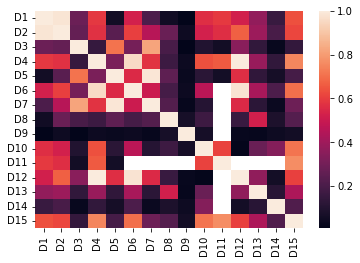

In [26]:
print(d.corr())
hm=sns.heatmap(data = d.corr())
plt.show()

**1. D9 doesn't have Correlation with any variable, but has a Linear Relationship D11.**

**2. D4 and D12 has a Linear Relationship.**

**3. Rest of the variables show little to No-Correlation**

# After Merging train dataset we get Catagorical Feature Details : 

In [52]:

def getCatFeatureDetail(df,cat_cols):
    cat_detail_dict = {} 
    for col in cat_cols:
        cat_detail_dict[col] = df[col].nunique()
    cat_detail_df = pd.DataFrame.from_dict(cat_detail_dict, orient='index', columns=['nunique'])
    print('There are ' + str(len(cat_cols)) + ' categorical columns.')
    print(cat_detail_df)
    
cat_features = ['isFraud','ProductCD','addr1', 'addr2', 'P_emaildomain','R_emaildomain','DeviceType','DeviceInfo']
all_cat_features = cat_features+ [f'card{i}' for i in range(1,7)]+ [f'M{i}' for i in range(1,10)] + [f'id_{i}' for i in range(12,39)]
    
getCatFeatureDetail(train_df, cat_features)


There are 8 categorical columns.
               nunique
isFraud              2
ProductCD            5
addr1              332
addr2               74
P_emaildomain       59
R_emaildomain       60
DeviceType           2
DeviceInfo        1786


<b><font size=6 color='green'>Correlation Function For Various Columns : </b></font>

In [27]:
# Create a function for correated columns 
# We have set a few threshold values and decided to set it 0.85 based on its effect on the model.
# There were too many variables so we eliminated less harmful variables.

def high_correlated_cols(dataframe, plot=True, corr_th=0.85):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    
    # we use here upper trangular matrix parameter
    
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    # we here drop the columns whose value is grater than threshold values 
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        
        sns.set(rc={'figure.figsize': (25,25)})
        # annot is true to get values 
        sns.heatmap(corr, cmap="RdBu_r", annot=True, fmt='.2f', square=True, linewidths=1,vmin = -1 , vmax = 1)
        plt.show()
    return drop_list


<b><font size=6 color='blue'>V features</b></font>

**Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.**

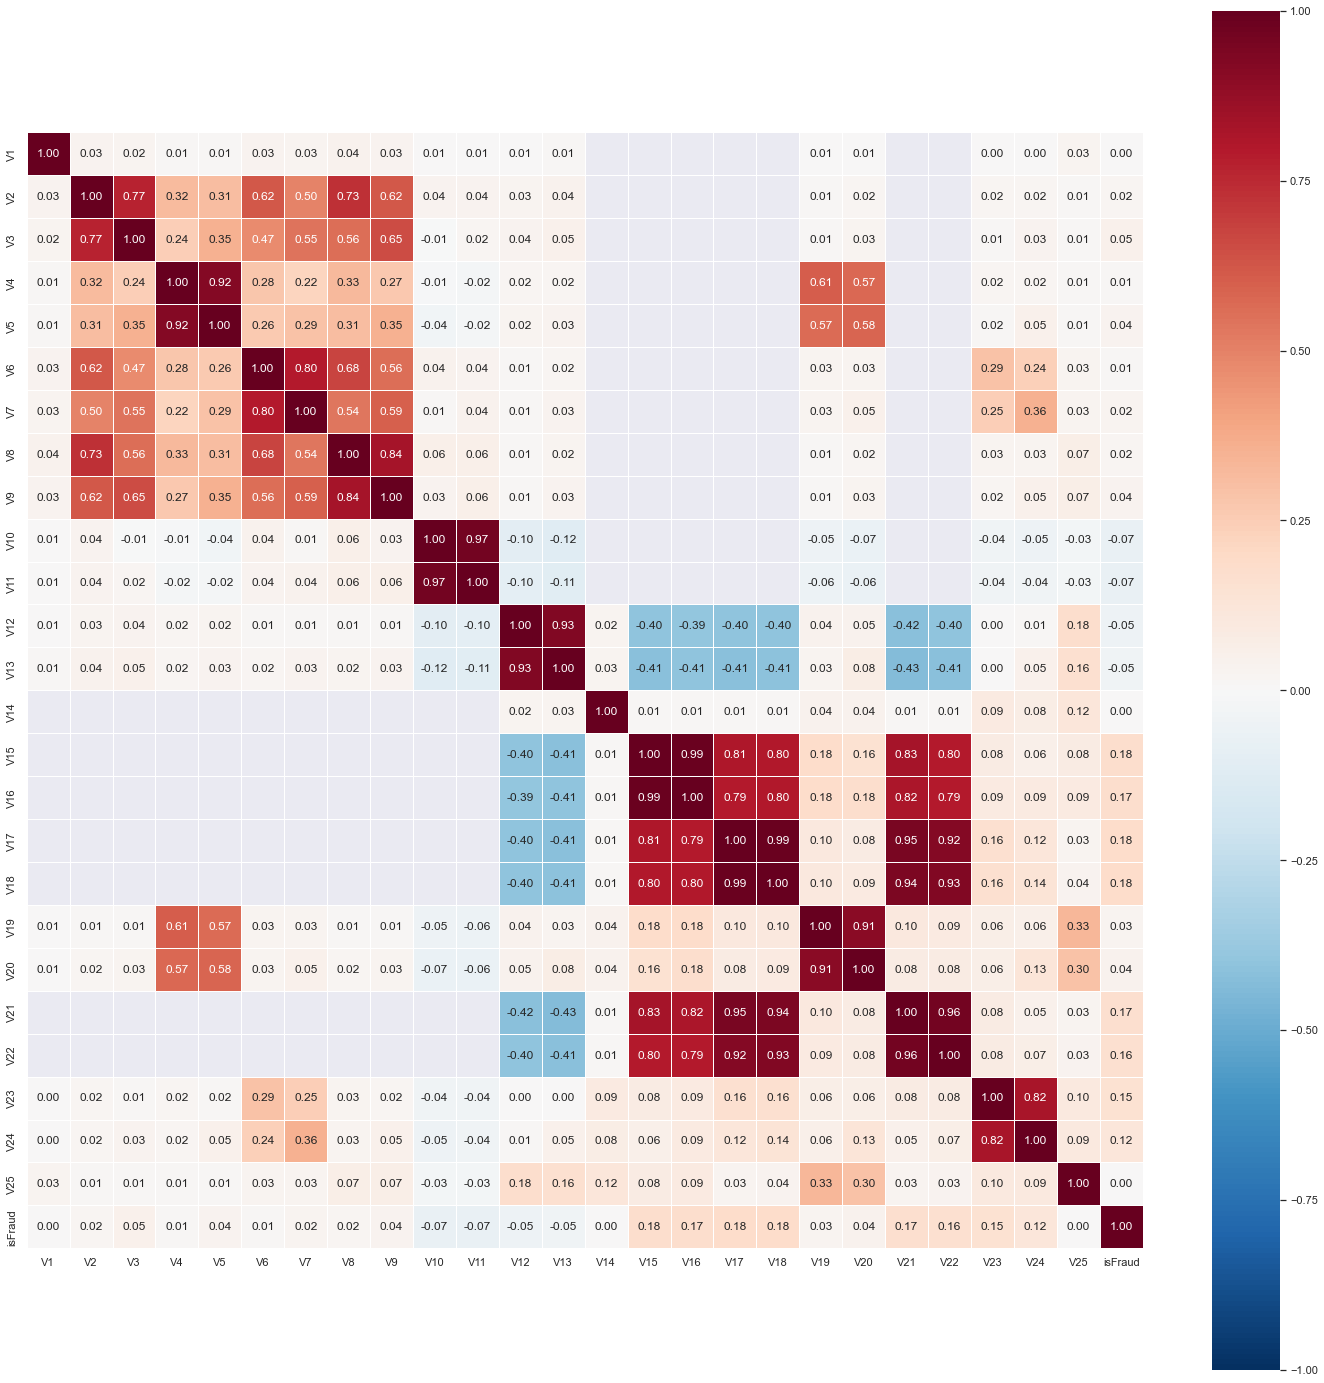

In [40]:
# correlation heatmap for v1 to v25 columns 

cols = ['V'+str(x) for x in range(1,26)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list1 = high_correlated_cols(train_df[cols], plot=False)


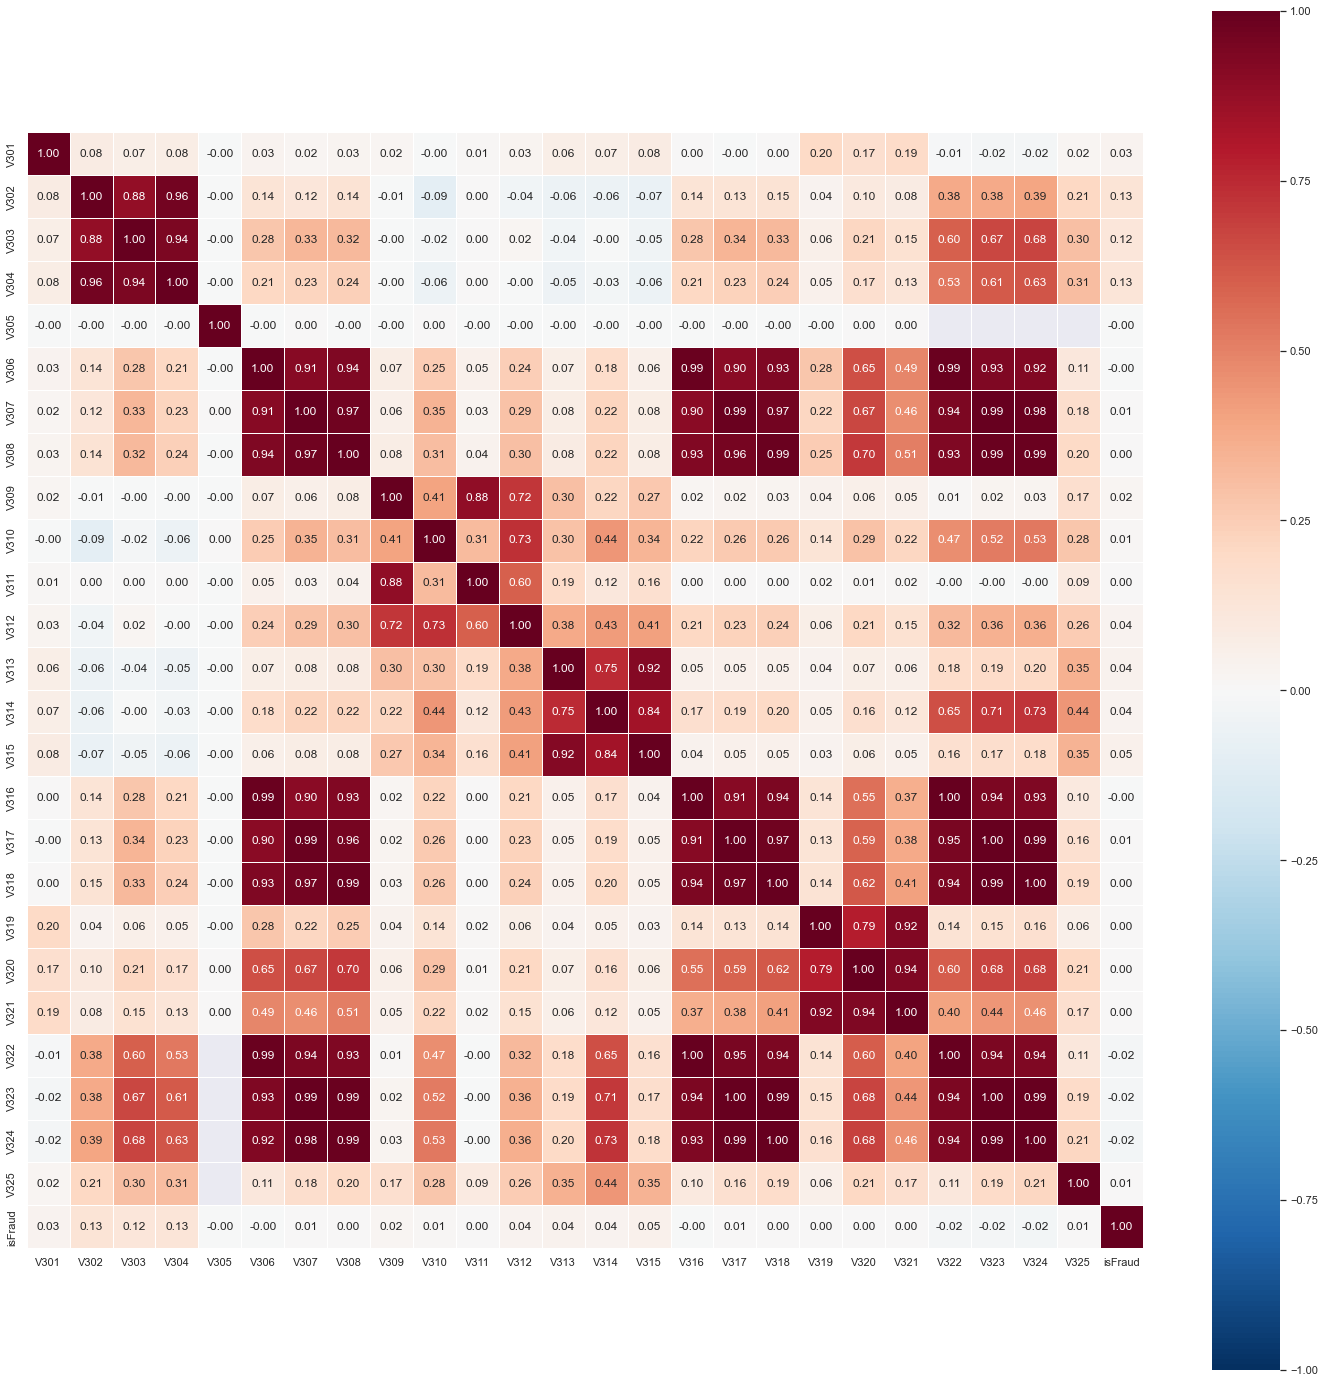

In [41]:
# correlation heatmap for v301 to v326 columns 
cols = ['V'+str(x) for x in range(301,326)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list13 = high_correlated_cols(train_df[cols], plot=False)


<b><font size=6 color='blue'>id columns</b></font>

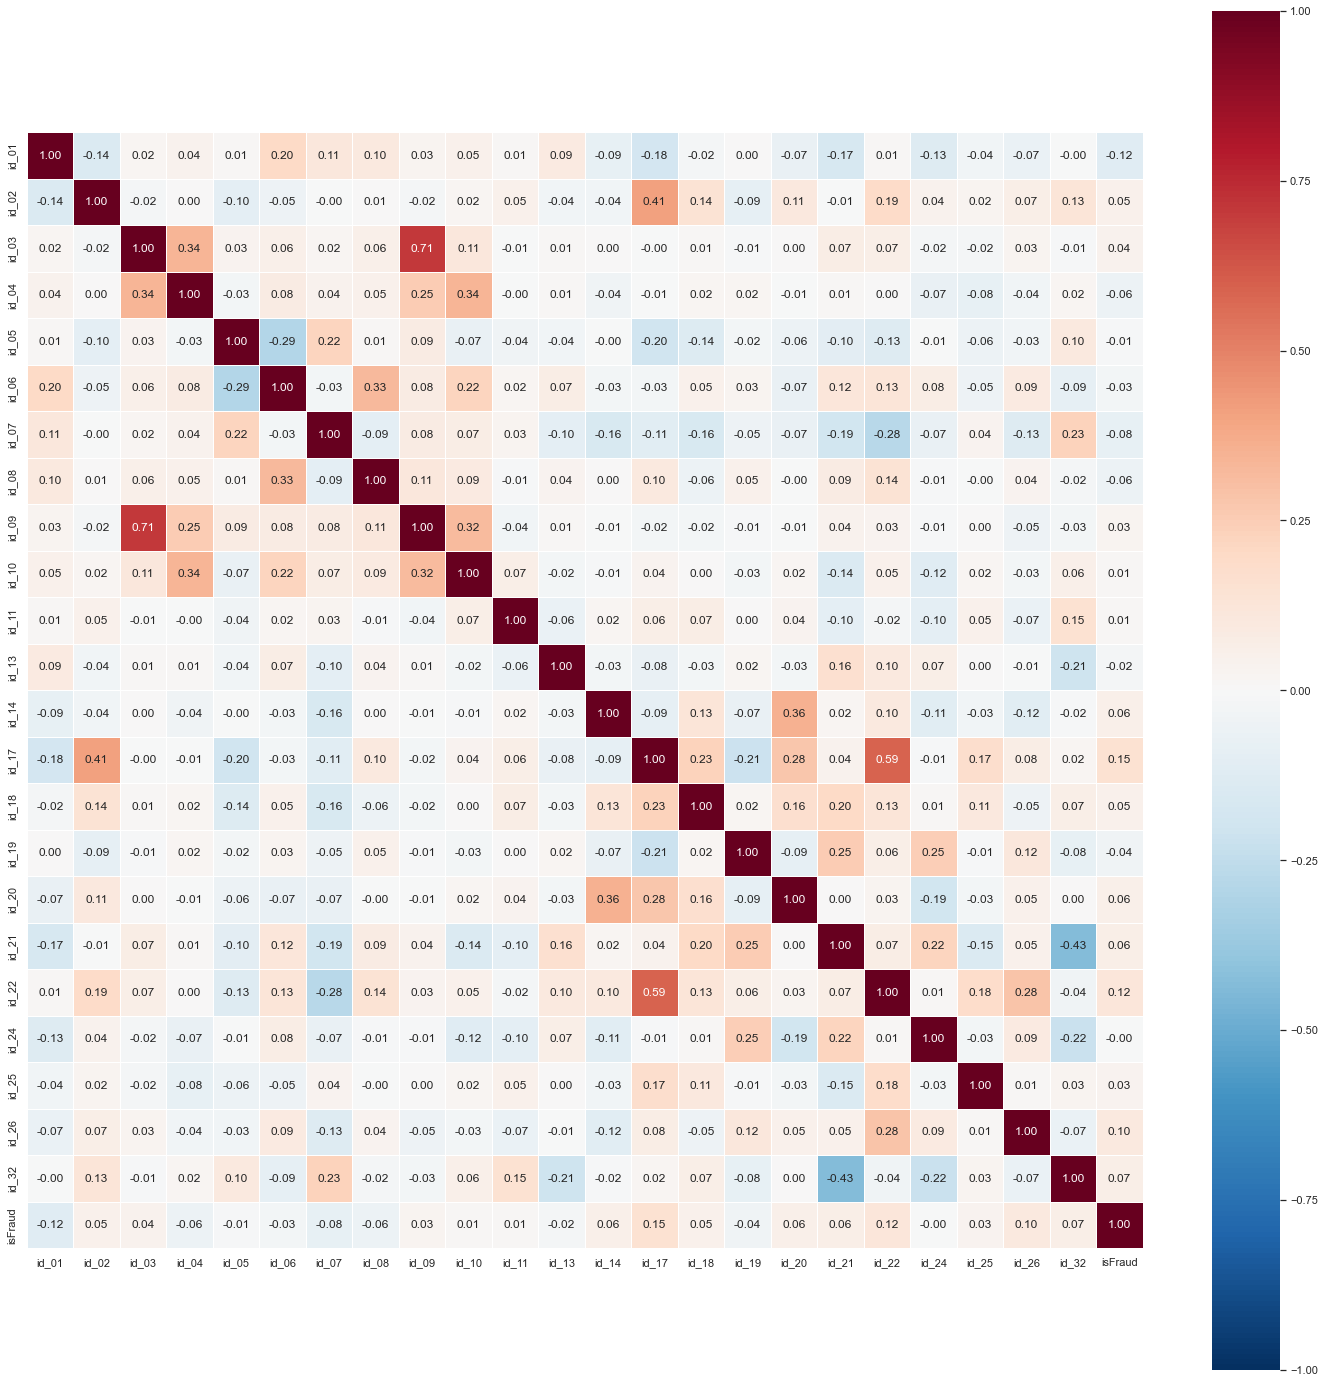

In [29]:
# use same correlated columns function for id1 to id32
id_cols = [col for col in train_df.columns if col[0]+col[1] == 'id']
id_cols = id_cols + ["isFraud"]
high_correlated_cols(train_df[id_cols], plot=True)
drop_list_id = high_correlated_cols(train_df[id_cols], plot=False)

<b><font size=6 color='green'>Function For Plotting the Counting Amount : </b></font>

In [49]:
# define function for counting productCD distribution values .

def plotting_cnt_amt(df, col, lim=2000):
    
    # A crosstab is a table showing the relationship between two or more variables.
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100   # for calculation in percentage format 
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    total = len(df)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    # plt.subplt(211) which is identical to subplot(2, 1, 1)
    plt.subplot(211)
    # subplot takes 3 arguments nrows, ncols and plot_number
    
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    
    gt = g.twinx() # Create a twin Axes sharing the xaxis
    
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    
    gt.set_ylim(0,tmp['Fraud'].max()*1.1) # to change pointplot、ylabel and tick_params color in the ploting_cnt_amt func
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15) # for one kind of difference 
    plt.show()
    
    

<b><font size=6 color='blue'>ProductCD</b></font>

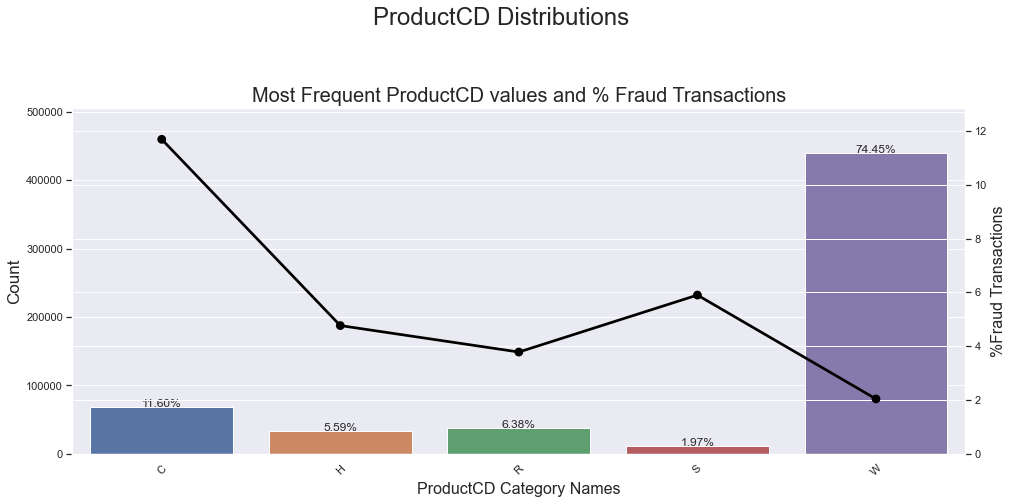

In [50]:
# ploting_cnt_amt for ProductCD
plotting_cnt_amt(train_df, 'ProductCD')

**From Above Graph :**
    
**W, C and R are the most frequent values.**

**75.45% of observations belong to product W.**

**1.97% of observations belong to product S.**

**Approximately 12% of transactions with product C are fraudulent.**

**Approximately 2% of transactions with product W are fraudulent.**

<b><font size=6 color='blue'>addr1 and addr2 </b></font>

In [55]:
# for addr1
train_df['addr1'].value_counts().head(10)

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
Name: addr1, dtype: int64

In [56]:
# for addr2
train_df['addr2'].value_counts().head(10)

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
16.0        55
31.0        47
19.0        33
26.0        25
27.0        20
Name: addr2, dtype: int64


<b><font size=6 color='blue'>P-emaildomain</b></font>

In [42]:
# p_email value count 
train_df['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
windstream.net         305
roadrunner.com         305
hotmail.es             305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

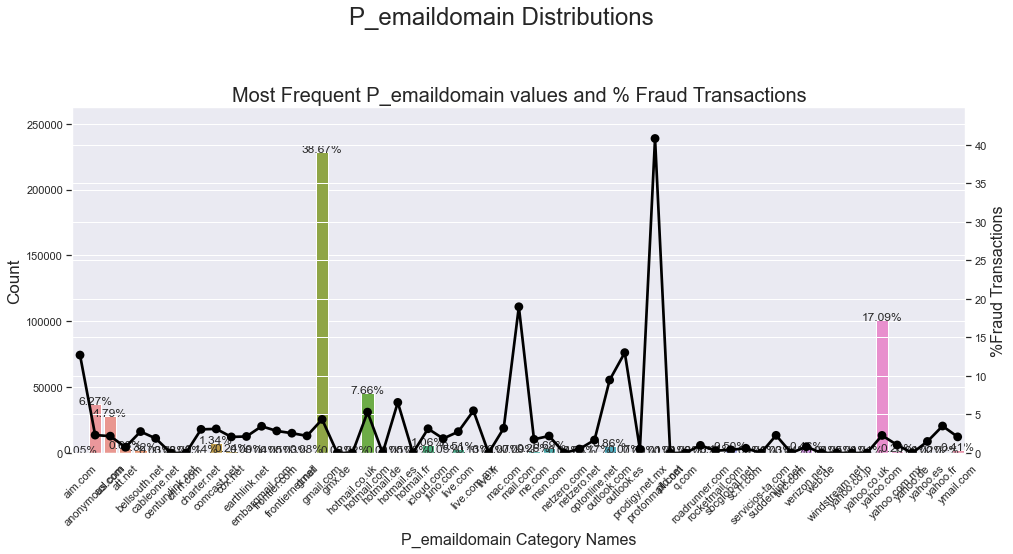

In [59]:
# Plotting count for P emails 
plotting_cnt_amt(train_df, 'P_emaildomain')

In [ ]:
# 


<b><font size=6 color='blue'>R-emaildomain</b></font>

In [63]:
# R eamil Value Count 
train_df['R_emaildomain'].value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
prodigy.net.mx        207
ymail.com             207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

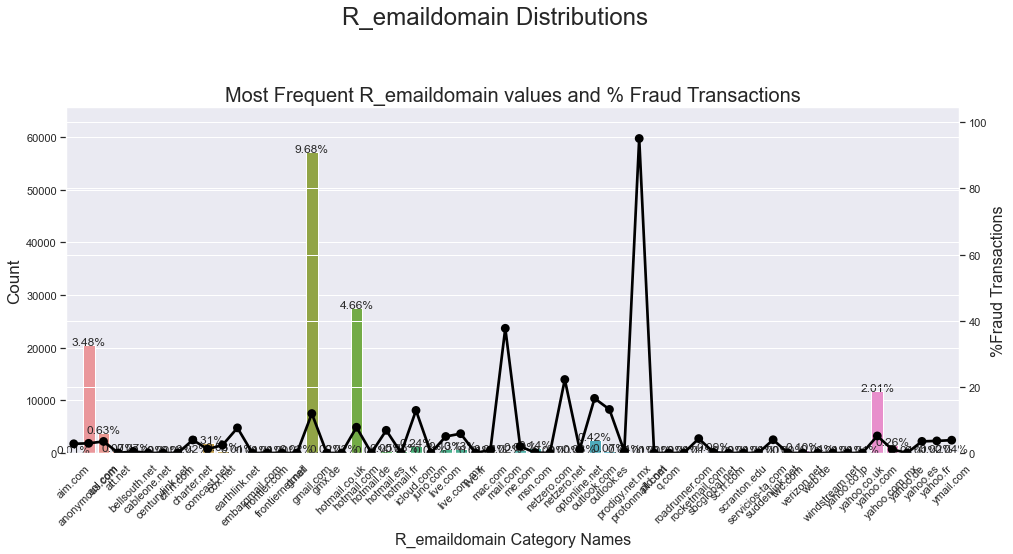

In [62]:
# Plotting count for R emails 
plotting_cnt_amt(train_df, 'R_emaildomain')

# From Above P-emaildomain and R-emaildomain graph :

**We can see a very similar distribution in both email domain features.**

**We have high values in google and hotmail.com  frauds.**


<b><font size=6 color='blue'>DeviceType</b></font>

In [66]:
# value count for Device Type 
train_df['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

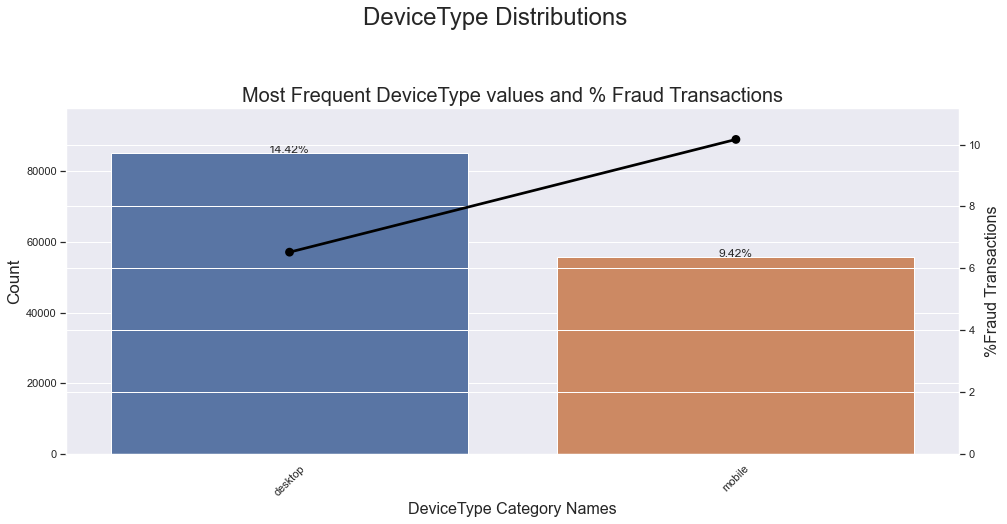

In [67]:
# Plotting count for device type 
plotting_cnt_amt(train_df, 'DeviceType')

**Most of the fraudulent transactions were done by the desktop device.**

<b><font size=6 color='blue'>DeviceInfo</b></font>

In [70]:
# count the value of device info 
train_df['DeviceInfo'].value_counts()

Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0                                          256
SAMSUNG                                       

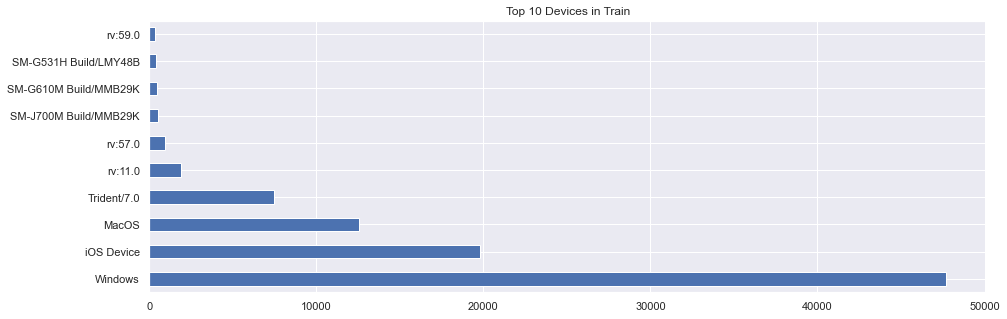

In [73]:
# Bar graph for top 10 device info which are involve in fraud 
train_df['DeviceInfo'].value_counts().head(10).plot(kind='barh', figsize=(15, 5), title='Top 10 Devices in Train')
plt.show()

**Windows are used mostly in fraud**



<b><font size=6 color='blue'>card1-card6</b></font>

# card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.


In [75]:
# to read col C1 to C6

card_cols = [c for c in train_df.columns if 'card' in c]
train_df[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [76]:
# to check weather there is any null values 
train_df[card_cols].isnull().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

In [77]:
# to check the unique values 

for col in card_cols:
    print(col+'  :' + str(train_df[col].nunique()))

card1  :13553
card2  :500
card3  :114
card4  :4
card5  :119
card6  :4


In [78]:
# to check weather there is any missing values in cards

for col in ['card2','card3','card4','card5','card6']:
    
    # used here groupby and lambda expression and also used mode for to fill most common values 
    train_df[col] = train_df.groupby(['card1'])[col].transform(lambda x: x.mode(dropna=False).iat[0])
    
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    
    print(col+' has : '+str(train_df[col].isnull().sum())+' missing values')

card2 has : 0 missing values
card3 has : 0 missing values
card4 has : 0 missing values
card5 has : 0 missing values
card6 has : 0 missing values


<b><font size=6 color='blue'>card4</b></font>

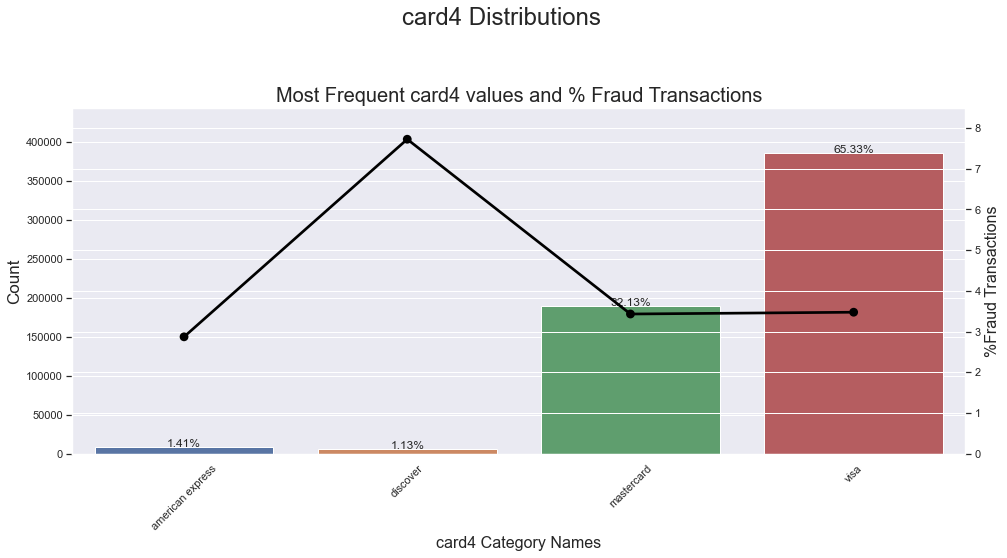

In [79]:
# plotting count for card4 values 
plotting_cnt_amt(train_df, 'card4')

**We get Visa card has the highest percentage of fraud transaction on card4.**

<b><font size=6 color='blue'>card6</b></font>

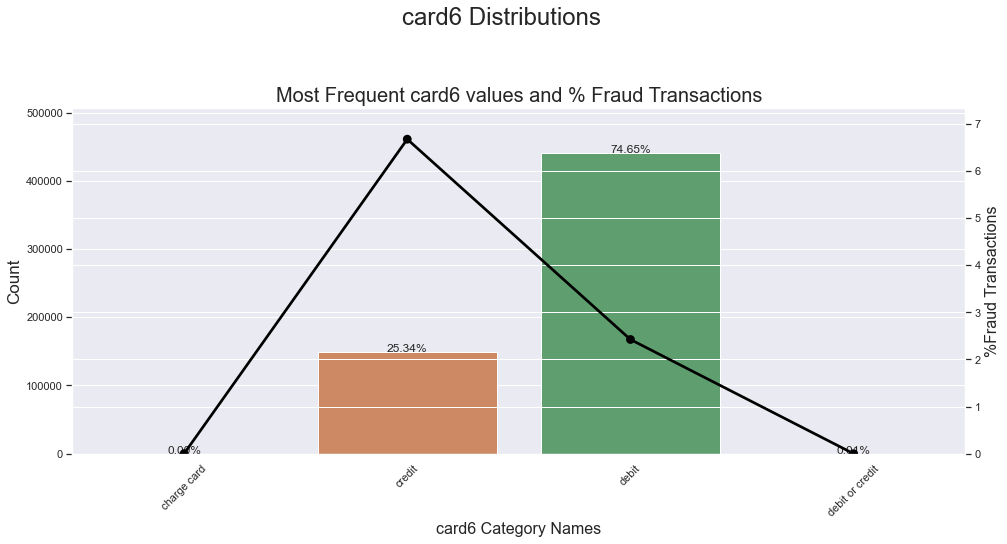

In [82]:
# ploing count for card6 values
plotting_cnt_amt(train_df, 'card6')

**We get debit card has the highest percentage of fraud transaction on card6.**

<b><font size=6 color='red'>Loading test transaction  and test identity dataset:</b></font>

In [85]:
%%time
# Loading test data
test_transaction = pd.read_csv(r'C:\Users\KK\Desktop\PROJECT\IEEE-CIS Fraud Detection\test_transaction.csv')
print(test_transaction.shape)


(506691, 393)
Wall time: 30 s


In [86]:
%%time
# Use Reduce Size function for test dataset
test_transaction = reduce_mem_usage(test_transaction)




Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 425.24 MB
Decreased by 72.0%
Wall time: 1min 52s


In [87]:
%%time
# Loading test_identity dataset 
test_identity = pd.read_csv(r'C:\Users\KK\Desktop\PROJECT\IEEE-CIS Fraud Detection\test_identity.csv')
print(test_identity.shape)




(141907, 41)
Wall time: 587 ms


In [88]:
%%time
# Use Reduce Size function for test_identity dataset
test_identity = reduce_mem_usage(test_identity)




Memory usage of dataframe is 44.39 MB
Memory usage after optimization is: 9.84 MB
Decreased by 77.8%
Wall time: 453 ms


# **test_transaction dataset**

Memory usage of dataframe is **1519.24 MB**

Memory usage after optimization is: **425.24 MB**

Decreased by **72.0%**

# **test_identity dataset**

Memory usage of dataframe is **44.39 MB**

Memory usage after optimization is: **9.84 MB**

Decreased by **77.8%**




In [89]:
# Merge these two dataset by left join 

test_df = pd.merge(test_transaction, test_identity, how='left')



In [90]:
# Drop the columns where we get "Fraud" in test_transaction dataset

test_df.columns = train_df.drop('isFraud', axis=1).columns
print(test_df.shape)




(506691, 433)


In [91]:
# The del keyword is used to delete objects
del test_transaction, test_identity  
test_df.head()



,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.0000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0000,47.950001,0.0000,0.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226

<b><font size=6 color='green'>To Check Duplicates in train and test data set:</b></font>

duplicated () function is used for find the duplicate rows of the dataframe

In [92]:
train_df.duplicated().sum()

0

In [93]:
test_df.duplicated().sum()

0


<b><font size=6 color='red'>Creating a submission file:</b></font>

In [94]:
# In submission file we frist put test_transaction ID

submission = pd.DataFrame({'TransactionID':test_df.TransactionID})
print(submission.shape)




(506691, 1)


# **What we Understood till now**


*So, we have total **434** columns including the dependent variable as **'isFraud'**. The **training data** consists of **5,90,540** samples and **test data** has **5,06,691** records. We also checked that there are **no duplicate** records.*

# **Now We want to investigate distribution of the dependent variable.**


 <b><font size=6 color='green'>Class imbalance check :</b></font>

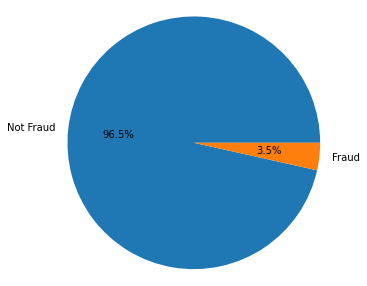

In [42]:
# We want to use here ( from matplotlib import pyplot as plt ) library for pie chart 
# Count the isFraud Values and give them labes as Not Fraud and  Fraud

plt.pie(train_df.isFraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%0.1f%%')

plt.axis('equal')  # axis ('equal') changes limits of x or y axis so that equal increments of x and y have the same length.
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.rcParams['font.size'] =9.0
plt.show()

*From the above Diagram it shown that , this is a class **imbalance** problem. We will apply **SMOTE** (Synthetic Minority Over-sampling Technique) to deal with class imbalance.*

**From total data  3.5 % contains fraud train**

**From total data  96.5 % contains legit train**


<b><font size=6 color='green'>Missing values graph :</b></font>

In [29]:
# we wiil check here isnull() values 
null_variables = train_df.isnull().sum()/len(train_df) * 100
null_variables = null_variables.drop(null_variables[null_variables == 0].index).sort_values(ascending=False)[:500]
null_variables




id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
id_26            99.125715
id_27            99.124699
id_23            99.124699
id_22            99.124699
dist2            93.628374
D7               93.409930
id_18            92.360721
D13              89.509263
D14              89.469469
D12              89.041047
id_03            88.768923
id_04            88.768923
D6               87.606767
id_33            87.589494
id_10            87.312290
id_09            87.312290
D8               87.312290
D9               87.312290
id_30            86.865411
id_32            86.861855
id_34            86.824771
id_14            86.445626
V155             86.123717
V138             86.123717
V156             86.123717
V157             86.123717
V158             86.123717
V154             86.123717
V153             86.123717
V161             86.123717
V162             86.123717
V139             86.123717
V

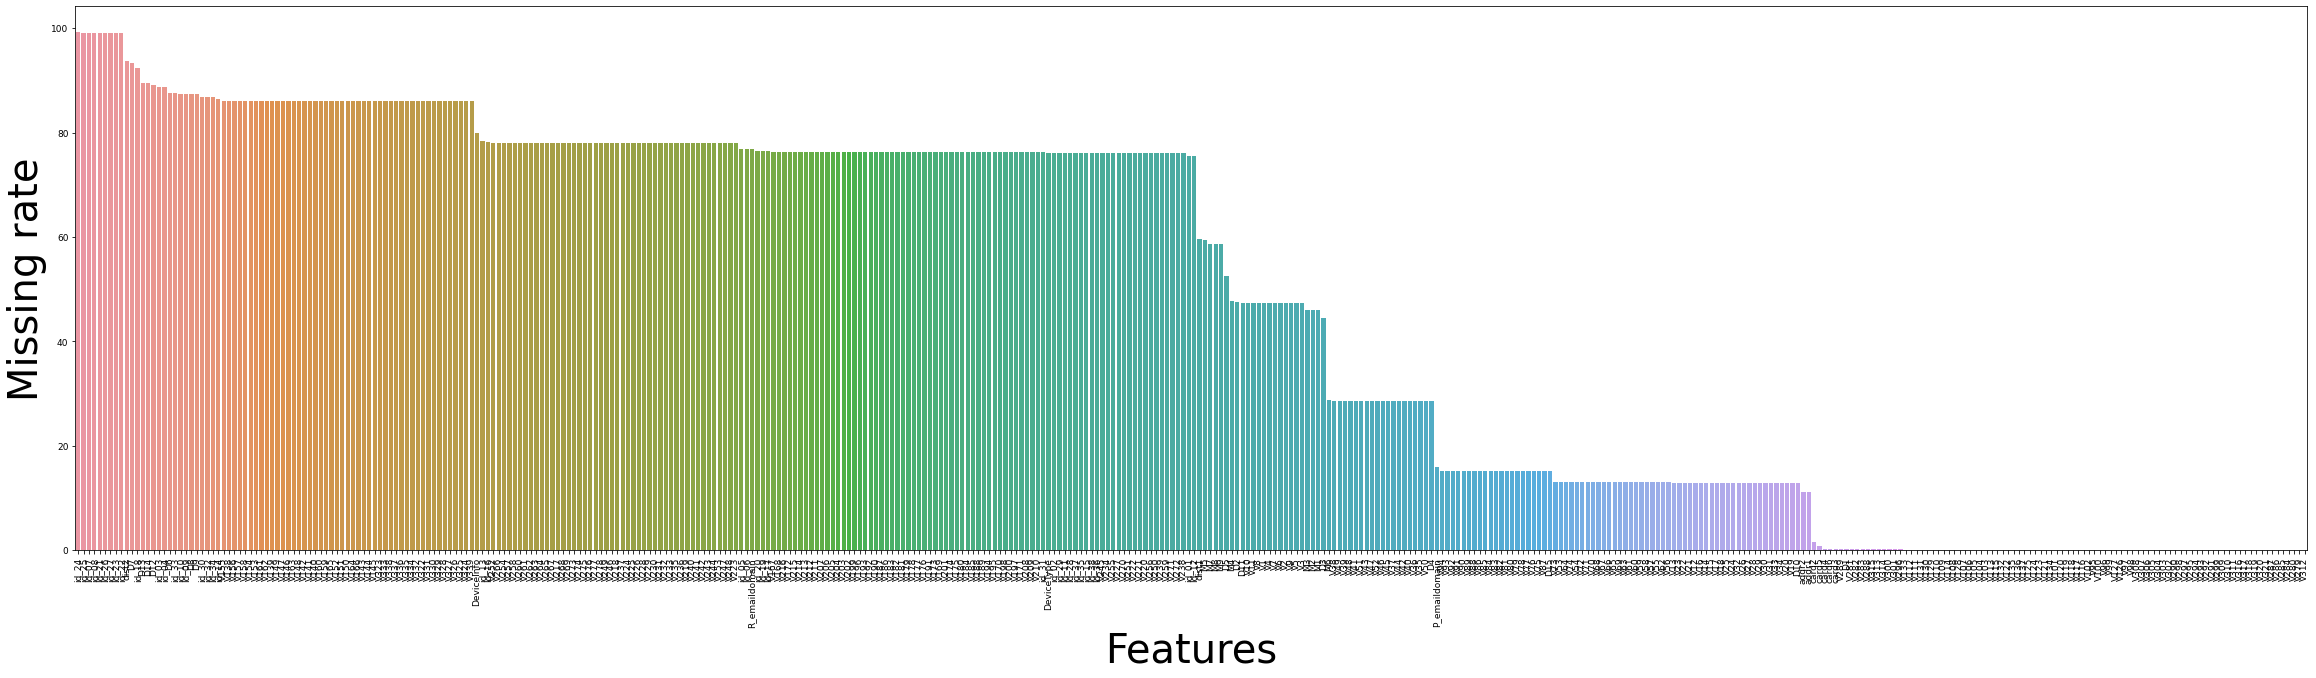

In [44]:
plt.subplots(figsize=(40,10))
plt.xticks(rotation='90')
sns.barplot(null_variables.index, null_variables)
plt.xlabel('Features', fontsize=40)
plt.ylabel('Missing rate', fontsize=40);
# plt.xticks(rotatation=90, font_size=12)


<b><font size=6 color='green'>Distribution of the timestamp column:</b></font>

The  **TIMESTAMP**  data type allows you to store date and time data including year, month, day, hour, minute and second. In addition, it stores the **fractional seconds**, **which is not stored by the DATE data type.**

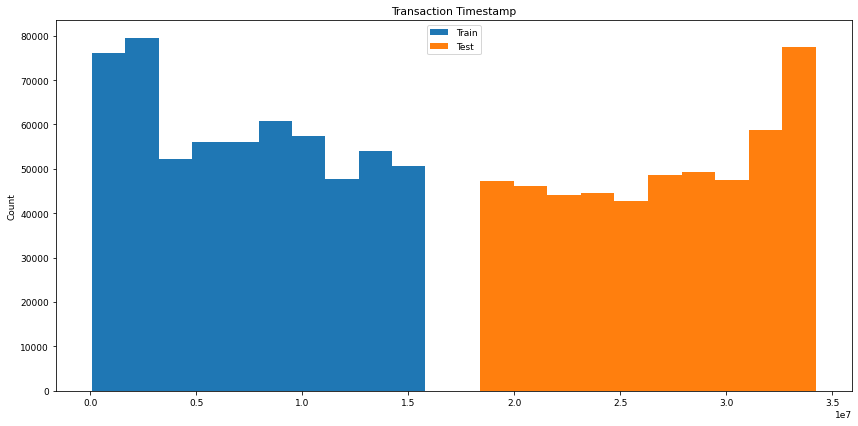

In [45]:
# Timestamp of train and test data

plt.figure(figsize=(12, 6))  # set fig size 

# Here we use Histogram for timestamp 

plt.hist(train_df['TransactionDT'], label='Train')
plt.hist(test_df['TransactionDT'], label='Test')
plt.ylabel('Count')
plt.title('Transaction Timestamp')

plt.legend()  # is used to Place a legend on the axes example like fontsize, facecolor, shadow etc 

plt.tight_layout() # The tight_layout () function in pyplot module of matplotlib library is used to automatically adjust subplot parameters to give specified padding.

plt.show()



*From above histogram We can notice that the timestamp of the **test** data is **ahead** of the timestamp of the train data. Therefore, while training machine learning model, we need to **perform time-based splitting** to create training and validation sets.*


<b><font size=6 color='green'>Missing values check :</b></font>

*Now we want to check the missing values where We'll use only those columns that has at least 80% data which leaves **20% to the missing values** that can be fillied.*

In [95]:
# To check Missing value we first need to combined ( use concat() ) the two dataset i.e test and train

combined_df = pd.concat([train_df.drop(columns=['isFraud', 'TransactionID']), test_df.drop(columns='TransactionID')])

print(combined_df.shape)




(1097231, 432)


In [96]:
# To check Dependent variable shape on train_df where to find isFraud

y = train_df['isFraud']
print(y.shape)


(590540,)



<b><font size=6 color='red'>Dropping columns with more than 20% missing values:</b></font>

In [97]:
# To check wheather combined dataframe has how many percentage of  NaN value. 
# calculate there percentage by dividing them by total length of combined dataframe .
# mv : missing values  
mv = combined_df.isnull().sum()/len(combined_df)
print("Total Percentages of NaN Values")
print(mv)





Total Percentages of NaN Values
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
card2             0.016029
card3             0.004162
card4             0.004250
card5             0.008026
card6             0.004172
addr1             0.119679
addr2             0.119679
dist1             0.586465
dist2             0.932500
P_emaildomain     0.149146
R_emaildomain     0.751045
C1                0.000003
C2                0.000003
C3                0.000003
C4                0.000003
C5                0.000003
C6                0.000003
C7                0.000003
C8                0.000003
C9                0.000003
C10               0.000003
C11               0.000003
C12               0.000003
C13               0.004327
C14               0.000003
D1                0.006653
D2                0.469879
D3                0.424724
D4                0.223994
D5                0.486877
D6                0.819573
D7                0.909

In [98]:

# Dropping columns with more than 20% missing values.

combined_mv_df = combined_df.drop(columns=mv[mv>0.2].index)
del combined_df, train_df, test_df

print("Shape of columns with more than 20% missing values : ",combined_mv_df.shape)




Shape of columns with more than 20% missing values :  (1097231, 180)



 <b><font size=6 color='green'>What we get after removing columns with more than 20% missing values :</b></font>
 
 
 We are left with 180 columns out of 432 after removing features with more than 20% missing values.We also have removed 'TransactionID' column as it does not hold any importance in the prediction. Let us now fill all the missing values. For numerical columns, we will use median value and for categorical column, we will use the most frequent category to fill the missing values.


 <b><font size=6 color='blue'>1. Filtering numerical data :</b></font>

In [99]:

num_mv_df = combined_mv_df.select_dtypes(include=np.number)
print(num_mv_df.shape)


(1097231, 176)



 <b><font size=6 color='blue'>2. Filtering categorical data :</b></font>

In [100]:

cat_mv_df = combined_mv_df.select_dtypes(exclude=np.number)
print(cat_mv_df.shape)
del combined_mv_df




(1097231, 4)



 <b><font size=6 color='blue'>3. Filling missing values by median for numerical columns :</b></font>
 
Library is used here is  **from sklearn.impute import SimpleImputer**

There are two columns / features **(one numerical - marks, and another categorical - gender)** which are having missing values and need to be imputed. In the code below, an instance of SimpleImputer is created with strategy as "mean". The missing value is represented using NaN.

**1. sklearn.impute package is used for importing SimpleImputer class.**

**2. SimpleImputer takes two argument such as missing_values and strategy.**

**3. fit_transform method is invoked on the instance of SimpleImputer to impute the missing values.**

In [101]:

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num_df = pd.DataFrame(imp_median.fit_transform(num_mv_df), columns=num_mv_df.columns)
del num_mv_df
print(num_df.shape)




(1097231, 176)



 <b><font size=6 color='blue'>4. Filling missing values by most frequent value for categorical columns:</b></font>

In [102]:

imp_max = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_df = pd.DataFrame(imp_max.fit_transform(cat_mv_df), columns=cat_mv_df.columns)
del cat_mv_df
print(cat_df.shape)



(1097231, 4)



 <b><font size=6 color='blue'> 5.  Concatinating numerical and categorical data:</b></font>

In [103]:

combined_df_cleaned = pd.concat([num_df, cat_df], axis=1)
del num_df, cat_df






 <b><font size=6 color='blue'>6. Verifying missing values:</b></font>

In [104]:

print(f'Total missing values: {combined_df_cleaned.isnull().sum().sum()}')
print(combined_df_cleaned.shape)
combined_df_cleaned.head()



Total missing values: 0
(1097231, 180)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,P_emaildomain
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,W,discover,credit,gmail.com
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W,mastercard,credit,gmail.com
2,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W,visa,debit,outlook.com
3,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,W,mastercard,debit,yahoo.com
4,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


<b><font size=6 color='red'>DATA PREPROCESSING :</b></font>

Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models. In simple words, data preprocessing in Machine Learning is a data mining technique that transforms raw data into an understandable and readable format. 


<b><font size=6 color='green'>One-Hot Encoding :</b></font>

OneHotEncoder class of sklearn.preprocessing module which can be used for one-hot encoding.This is a technique which is used to convert or transform a categorical feature having string labels into K numerical features in such a manner that the value of one out of K (one-of-K) features is 1 and the value of rest (K-1) features is 0. It is also called as dummy encoding as the features created as part of these techniques are dummy features which don’t represent any real world features.

In [105]:

combined_df_encoded = pd.get_dummies(combined_df_cleaned, drop_first=True)
print(combined_df_encoded.shape)
del combined_df_cleaned
combined_df_encoded.head()

(1097231, 245)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_scranton.edu,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<b><font size=6 color='green'>Separating train and test data:</b></font>

In [106]:
# iloc :  iloc () function enables us to select a particular cell of the dataset, that is,
# it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

X = combined_df_encoded.iloc[:len_train_df]
print(X.shape)
test = combined_df_encoded.iloc[len_train_df:]
print(test.shape)
del combined_df_encoded


(590540, 245)
(506691, 245)



<b><font size=6 color='green'>Train Test Split Manually : </b></font>




**Train set**: The training dataset is a set of data that was **utilized to fit the model**. The dataset on which the model is trained. This data is seen and learned by the model.

**Test set**: The test dataset is a **subset of the training dataset** that is utilized to give an accurate evaluation of a final model fit.

**validation set**:  A validation dataset is a **sample of data from your model’s training set that is used to estimate model performance while tuning the model’s hyperparameters.**


In [107]:
# Time-based train validation splitting with 20% data in validation set

train = pd.concat([X, y], axis=1)
train.sort_values('TransactionDT', inplace=True)
X = train.drop(['isFraud'], axis=1)
y = train['isFraud']
splitting_index = int(0.8*len(X))
X_train = X.iloc[:splitting_index].values
X_val = X.iloc[splitting_index:].values
y_train = y.iloc[:splitting_index].values
y_val = y.iloc[splitting_index:].values
test = test.values
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
del y, train

(472432, 245) (118108, 245) (472432,) (118108,)



<b><font size=6 color='green'>Standardization :</b></font>

**from sklearn.preprocessing import StandardScaler**

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the **mean** of the attribute becomes **zero** and the resultant distribution has a **unit standard deviation**.(The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively.)

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test)
del X_train, X_val, test



<b><font size=6 color='orange'>Class Imbalance :</b></font>

In machine learning class imbalance is the issue of target class distribution.If the target classes are **not equally distributed or not in an equal ratio**, we call the data having an imbalance data issue.

**Class Imbalance dataset:-**

1. Email spam or ham dataset


<b><font size=5 color='voilet'>  2.Credit card fraud detection:</b></font>

3. Machine components failure detections

4. Network failure detections

In [109]:
# Class imbalance check
pd.value_counts(y_train)

0    455833
1     16599
dtype: int64


<b><font size=6 color='green'>Synthetic Minority Oversampling Technique (SMOTE):</b></font>

For example, let’s say that we are having a binary classification problem to predict the gender of a person. Then, the gender should be either male or female.

In Order to get a fine-tuned model, we have to get the records of both female and male in an almost equal proposition. But what if our training data contains 90% males and 10% females?

Any model that fits this data will have a low accuracy due to this uneven separation of class. For making this data balanced data, we have 2 options-

**Decrease the proportion of male class (undersampling)**

**Increase the proportion of female class (oversampling)**

If we go with under-sampling, a considerable amount of data will be lost. So, this is not recommended most of the time.

In oversampling, we can duplicate the minority class so that the proportion of majority and minority class becomes approximately equal but this is will result in a huge duplication process.

**SMOTE or Synthetic Minority Oversampling Technique is a method used instead of this naive oversampling.**

It creates synthetic samples which means **duplicate samples but has all the characteristics of the original sample with respect to minority class and increases its proportion.**

**It creates an imaginary connection between 2 existing data points and creates new synthetic data points in this connection.**


In [110]:
# Applying SMOTE to deal with the class imbalance by oversampling

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(X_train_smote.shape, y_train_smote.shape)
del X_train_scaled, y_train
pd.value_counts(y_train_smote)


(911666, 245) (911666,)


0    455833
1    455833
dtype: int64

# Before SMOTE

0      455833

1      **16599**

dtype: int64

There is huge difference in value count in **0 and 1 its Imbalance class.** 

# After SMOTE

0      **455833**

1      **455833**

dtype: int64

Here we get equal distribution of values with the help of **Oversampling .**


<b><font size=6 color='red'>MACHINE LEARNING MODELING  :</b></font>

**A machine learning model is defined as a mathematical representation of the output of the training process.**

Machine learning is the study of different algorithms that can improve automatically through experience & old data and build the model.The learning algorithm discovers patterns within the training data, and it outputs an ML model which captures these patterns and makes predictions on new data.


<b><font size=6 color='orange'>RandomForestClassifier:</b></font>

**from sklearn.ensemble import RandomForestClassifier**

**"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."** 

**The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.**

**Why use Random Forest?**

1. It takes **less training time** as compared to other algorithms.

2. It predicts output with high accuracy, **even for the large dataset it runs efficiently.**

3. It can also maintain accuracy when a **large proportion of data is missing.**


<b><font size=6 color='blue'>from sklearn.metrics import roc_auc_score</b></font>

**This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.**

In [106]:
%%time
# Random Forest Classifier
rfc = RandomForestClassifier(criterion='entropy', max_features='sqrt', max_samples=0.5, min_samples_split=80)
rfc.fit(X_train_smote, y_train_smote)
y_pred = rfc.predict(X_val_scaled)
y_prob = rfc.predict_proba(X_val_scaled)[:, 1]
print(classification_report(y_val, y_pred))
print(f'Validation AUC= {roc_auc_score(y_val, y_prob)}')


              precision    recall  f1-score   support

           0       0.98      0.99      0.98    114044
           1       0.52      0.43      0.47      4064

    accuracy                           0.97    118108
   macro avg       0.75      0.71      0.73    118108
weighted avg       0.96      0.97      0.97    118108

Validation AUC= 0.887456250697341
Wall time: 5min 52s



<b><font size=5 color='blue'> From RandomForestClassifier we get a Best Validation AUC Score
    is 0.887456250697341</b></font>


# Feature importances with a RandomForestClassifier

**This shows the use of a forest of trees to evaluate the importance of features on an artificial classification task. The blue bars are the feature importances of the forest, along with their inter-trees variability represented by the error bars.**


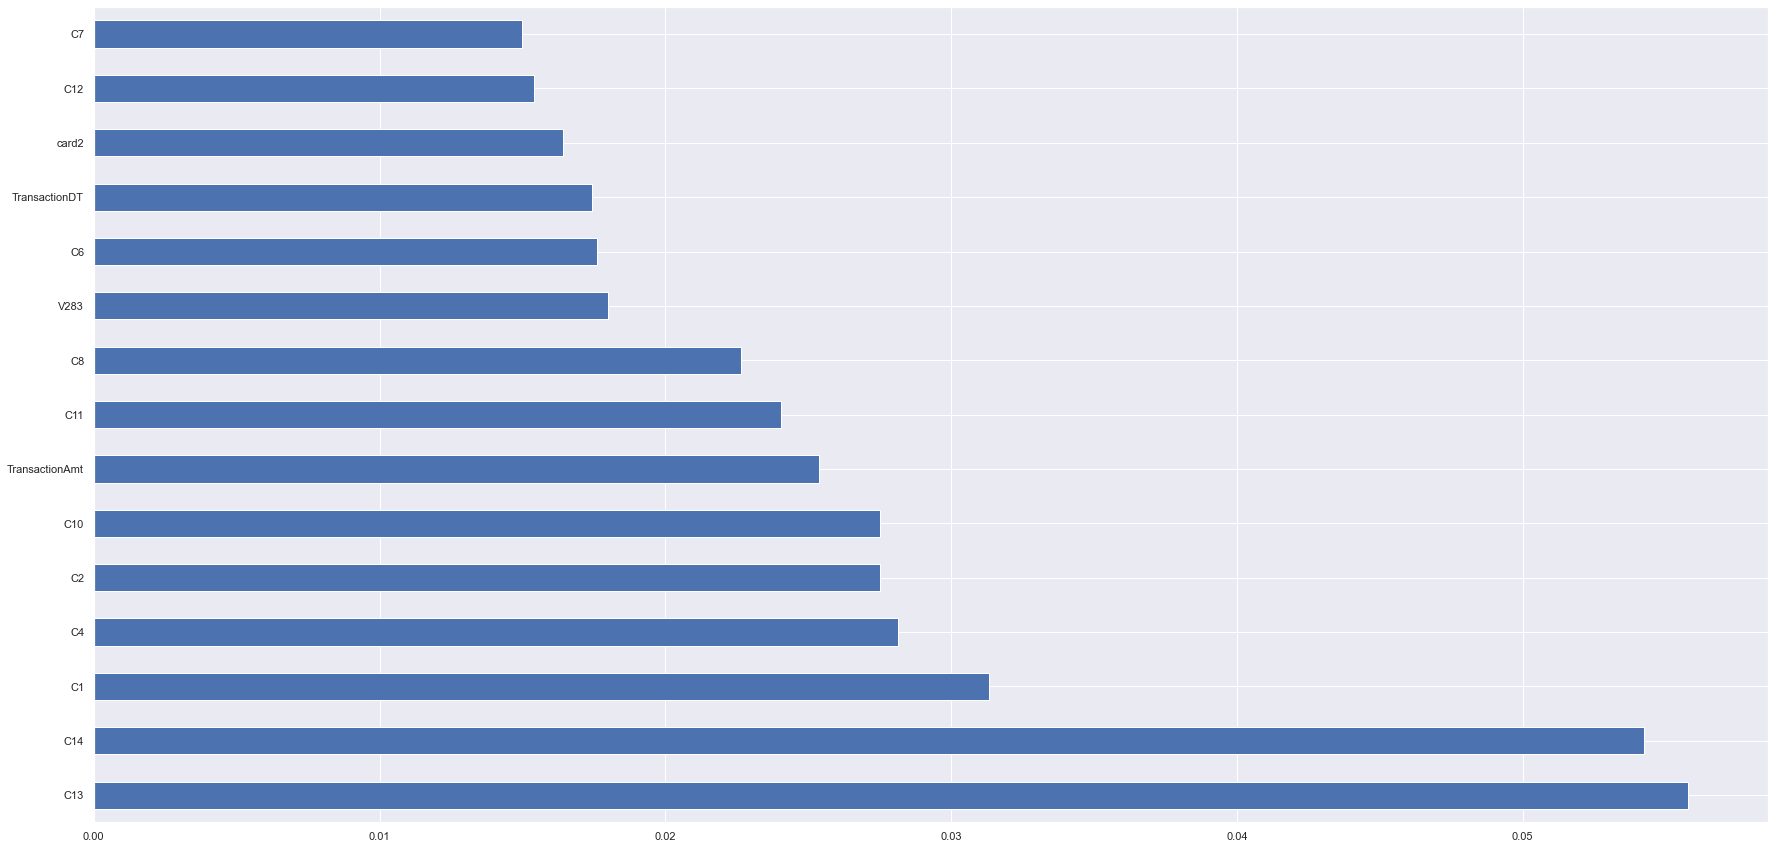

In [107]:
# Feature importances
pd.Series(rfc.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh')
plt.show()





# Predicting for the test data

In [108]:
# Predicting for the test data 
predictions = rfc.predict_proba(test_scaled)
submission['isFraud'] = predictions[:, 1]
print(submission.shape)
submission.head()

(506691, 2)


,TransactionID,isFraud
0,3663549,0.050314
1,3663550,0.020821
2,3663551,0.224705
3,3663552,0.040110
4,3663553,0.161792


# Saving submission file RandomForestClassifier

In [109]:
filename = 'Fraud Detection base model RandomForestClassifier.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)



Saved file: Fraud Detection base model RandomForestClassifier.csv



<b><font size=6 color='orange'> BOOSTING</b></font>

**The boosting ensemble also combines different same type of classifier.** Boosting is one of the sequential ensemble methods in which each model or classifier run based on features that will utilize by the next model.

Now imagine after taking advice from your friends, you invest in 10 stocks. Initially 2 of them succeed and give you a profit while the other 8 have a downtrend. Do you just take your money and quit?

No. You reinvest it back into the stock market with your new knowledge and experience.

You keep on doing that and becoming better and better. First only 3 of your stocks return a profit, then 5, then 7 and so on.

This is the logic behind boosting. You train multiple weak learners sequentially and after each iteration the new model tries to compensate for the weakness of its predecessor. In this way at the end of the sequence we will have a strong learner which we can use to make more accurate predictions.

Due to its popularity there are a lot of different boosting algorithms like:

**Xgboost.**

**Adaboost.**

**LightGBM.**

**Catboost.**




<b><font size=6 color='orange'> XGBClassifier :</b></font>

**from xgboost import XGBClassifier**

XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting.


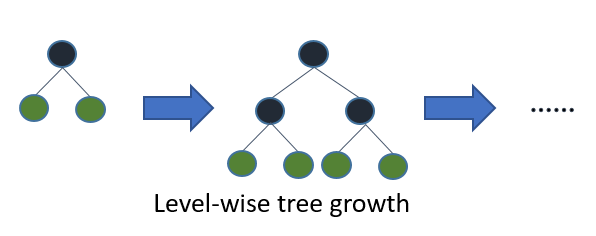








In [125]:
%%time
# XGBClassifier
xgbc = XGBClassifier(learning_rate=0.02,n_estimators=100, random_state=2022)
xgbc.fit(X_train_smote, y_train_smote)
y_pred = xgbc.predict(X_val_scaled)
y_prob = xgbc.predict_proba(X_val_scaled)[:, 1]
print(classification_report(y_val, y_pred))
print(f'Validation AUC= {roc_auc_score(y_val, y_prob)}')

              precision    recall  f1-score   support

           0       0.98      0.93      0.96    114044
           1       0.23      0.55      0.32      4064

    accuracy                           0.92    118108
   macro avg       0.60      0.74      0.64    118108
weighted avg       0.96      0.92      0.94    118108

Validation AUC= 0.8600004827446762
Wall time: 7min 13s




<b><font size=5 color='blue'>From XGBClassifier we get a Best Validation AUC Score is 
0.8600004827446762</b></font>

# Feature Importances with a XGBClassifier

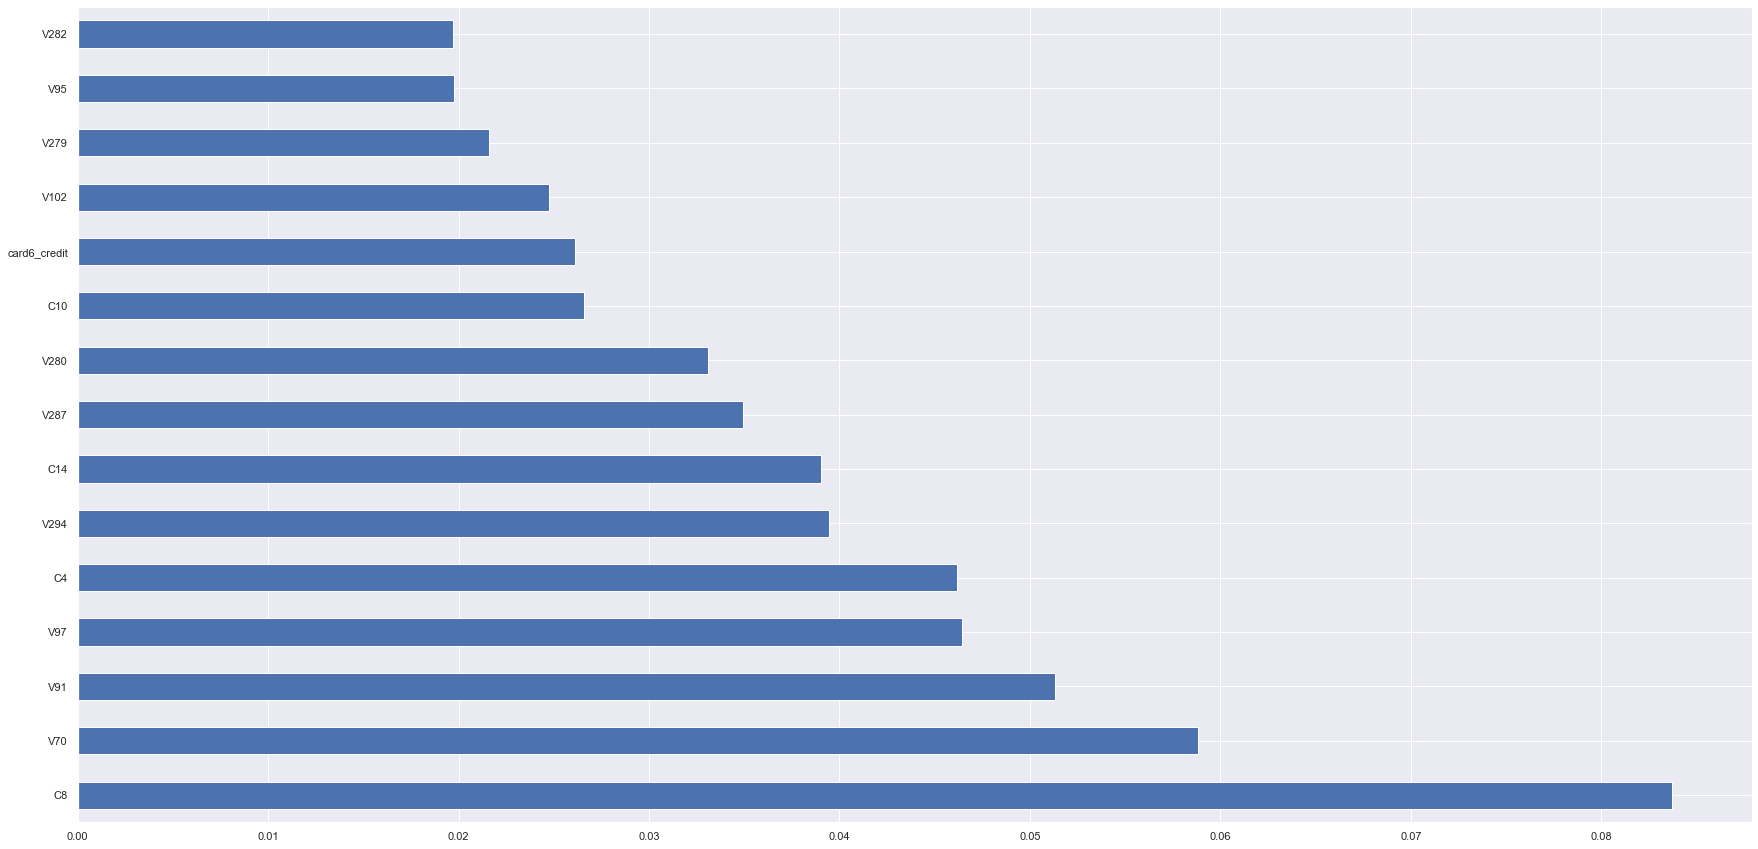

In [126]:
# Feature importances
pd.Series(xgbc.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh')
plt.show()

# Predicting for the test data

In [127]:
# Predicting for the test data 
predictions = xgbc.predict_proba(test_scaled)
submission['isFraud'] = predictions[:, 1]
print(submission.shape)
submission.head()

(506691, 2)


,TransactionID,isFraud
0,3663549,0.184176
1,3663550,0.225845
2,3663551,0.237912
3,3663552,0.216425
4,3663553,0.265710


# Saving submission file XGBClassifier

In [113]:
filename = 'Fraud Detection base model XGBClassifier.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: Fraud Detection base model XGBClassifier.csv



<b><font size=6 color='orange'> CatBoostClassifier:</b></font>

**from catboost import CatBoostClassifier**

**Training and applying models for the classification problems. Provides compatibility with the scikit-learn tools.**

**CatBoost is a high-performance open source library for gradient boosting on decision trees.**

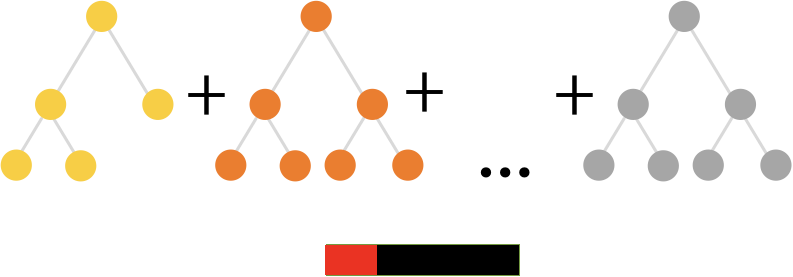

**The main reason I use CatBoost is that it is easy to use, efficient, and works especially well with categorical variables.**

**It is quicker to use than, say, XGBoost, because it does not require the use of pre-processing your data.**

In [112]:
CatBoostClassifier()

In [137]:
%%time
# CatBoostClassifier
cbc = CatBoostClassifier(iterations=50,
                               logging_level='Silent',
                               allow_writing_files=False)
cbc.fit(X_train_smote, y_train_smote)
y_pred = cbc.predict(X_val_scaled)
y_prob = cbc.predict_proba(X_val_scaled)[:, 1]
print(classification_report(y_val, y_pred))
print(f'Validation AUC= {roc_auc_score(y_val, y_prob)}')


              precision    recall  f1-score   support

           0       0.98      0.99      0.98    114044
           1       0.56      0.36      0.44      4064

    accuracy                           0.97    118108
   macro avg       0.77      0.67      0.71    118108
weighted avg       0.96      0.97      0.96    118108

Validation AUC= 0.8497273690055255
Wall time: 1min 9s






<b><font size=5 color='blue'>From CatBoostClassifier we get a Best Validation AUC Score is 
0.8497273690055255</b></font>

# Feature Importances with a CatBoostClassifier

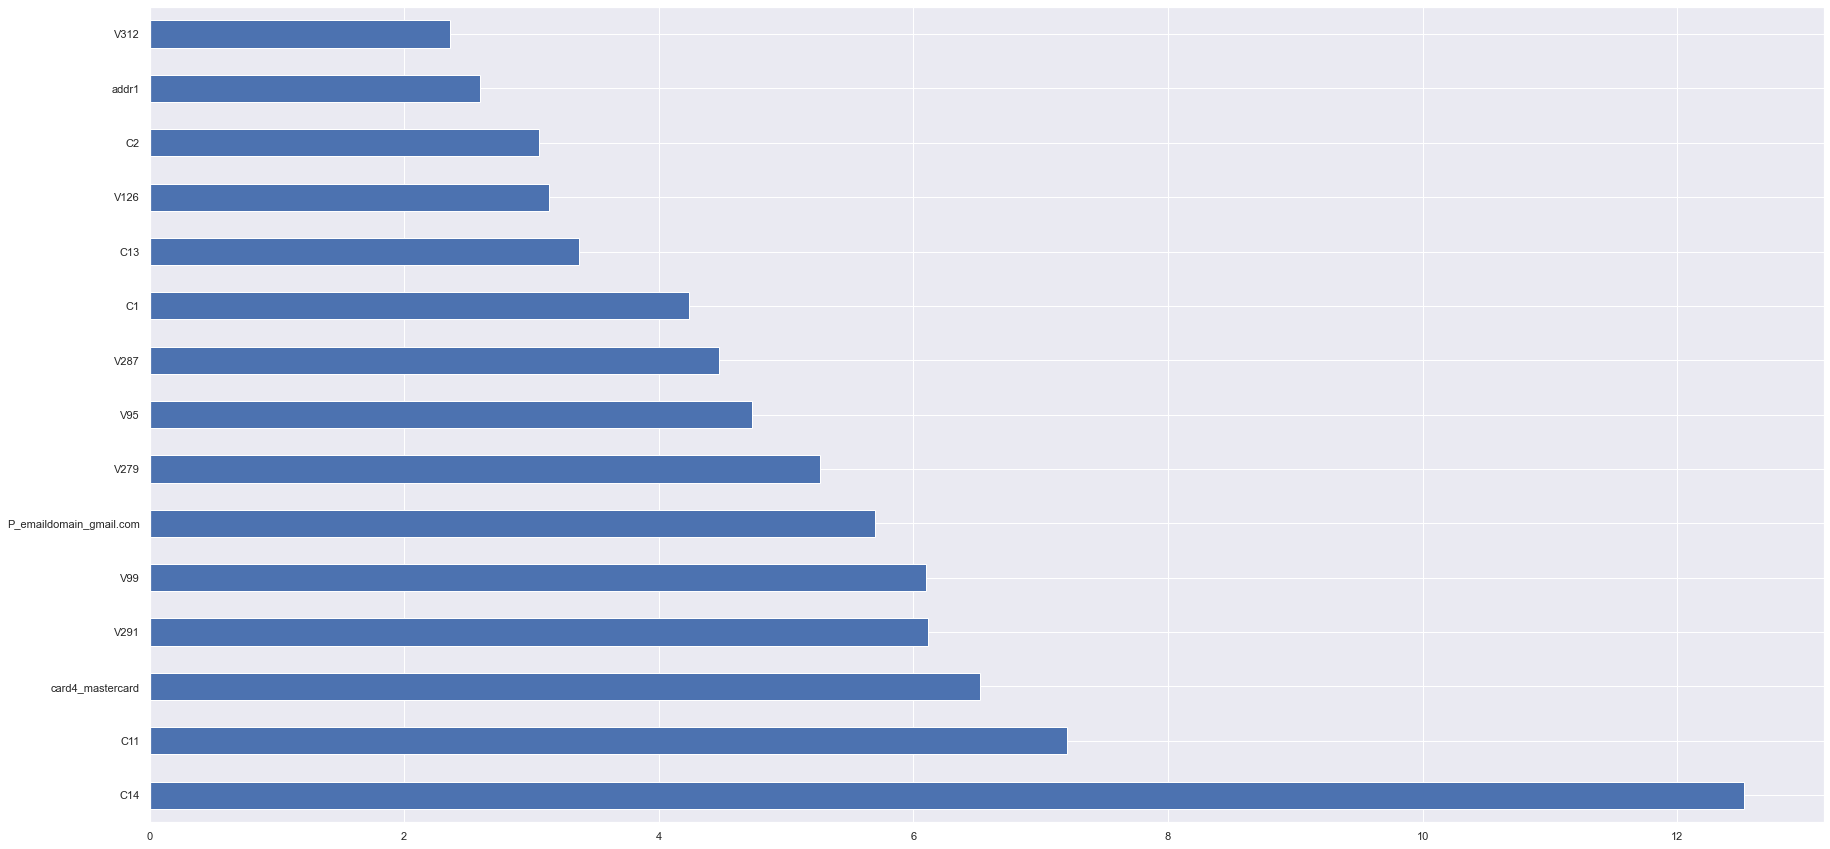

In [138]:
# Feature importances
pd.Series(cbc.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh')
plt.show()

# Predicting for the test data

In [139]:

# Predicting for the test data 
predictions = cbc.predict_proba(test_scaled)
submission['isFraud'] = predictions[:, 1]
print(submission.shape)
submission.head()





(506691, 2)


,TransactionID,isFraud
0,3663549,0.003579
1,3663550,0.040629
2,3663551,0.023191
3,3663552,0.017925
4,3663553,0.024659


# Saving submission file CatBoostClassifier

In [140]:
filename = 'Fraud Detection base model CatBoostClassifier.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)





Saved file: Fraud Detection base model CatBoostClassifier.csv



<b><font size=6 color='red'>Machine Learning Model AUC Results High to Low  :</b></font>


   # 1. RandomForestClassifier      : Validation AUC = 0.887456250697341
   
   # 2. XGBClassifier                           : Validation AUC = 0.860000482744676
   
   # 3. CatBoostClassifier                    : Validation AUC = 0.8497273690055255
 
 


<b><font size=4 color='green'>#################################################################################################################</b></font>

<b><font size=6 color='red'>From Above Machine Learning Model We get Best AUC Score:</b></font>
        
<b><font size=5 color='orange'> RandomForestClassifier:Validation Score is = 0.887456250697341</b></font>
     
<b><font size=4 color='green'>#################################################################################################################</b></font>